In [1]:
#coding: utf-8

"""
Lista de pacotes que precisamos para iniciar este estudo.
Numpy, Seaborn, Matplot e pandas

Numpy
.....
    Nos dará a facilidade de criar os bins.

Seaborn
.......
    Apresentará os dados.
    
Matplot
.......
    É uma necessidade do Seaborn.
    
Pandas
......
    Análises entre os dados.

"""
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy.ma as ma
from scipy.stats import mstats, kendalltau

In [ ]:
                                            """
                                            #..............................
                                            #
                                            # 1 - ANÁLISE DAS QUANTIDADES
                                            #
                                            #..............................
                                            """

In [2]:
"""
#..............................
#
# 1.1 - GRANULARIDADE DE ANO
#
#..............................
"""
#path = '/Users/zegildo/Documents/workspace/'
path = '/home/zegildo/workspace/'


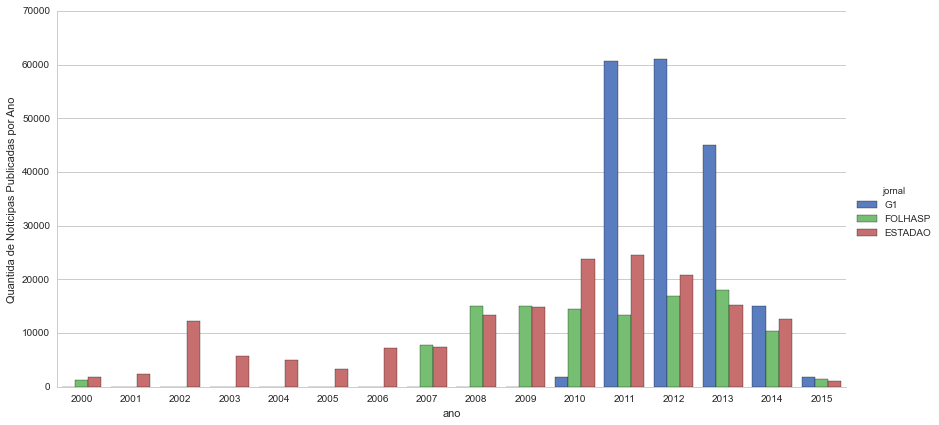

In [5]:
"""
Apresenta um resumo da quantidade de notícias coletadas 
entre os anos 2000 e 2015 para cada um dos jornais de domínio público
de interesse: Folha de São Paulo, Estadão e G1.

"""
#Define a cor de background da imagem
sns.set(style="whitegrid")

#Ler o arquivo contendo as informações de jornais e suas respectivas quantidades
volNewsYear = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticias-Ano.csv')

#Constrói o gráfico baseado em:
# x: coluna que irá compor o eixo X.
# y: coluna que irá compor o eixo Y.
# hue: tradução da legenda.
# size: tamanho que será apresentada a imagem.
# kind: tipo de gráfico que será gerado (barras, pontos, contagem...)
# aspect: a distância entre os elementos do eixo X.
g = sns.factorplot(x="ano", y="quantidade", hue="jornal", data=volNewsYear,
                    size=6, kind="bar", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantida de Noticipas Publicadas por Ano")

In [ ]:
"""
Fatos e Conclusões:
...................

1- Entre os anos de [2001,2006] há apenas publicações do ESTADÃO. 

O site de notícias G1 surgiu apenas em 2006 como é dito aqui https://pt.wikipedia.org/wiki/G1.
A Folha de São Paulo por algum motivo inibe qualquer consulta ao caderno de economia a notícias entre esses anos.
Apensar de manter uma política de limitar a leitura diária de artigos, assim como a Folha de São Paulo, o ESTADÃO 
apresenta-se democrático e empenhado em fornecer fielmente resultados de buscas ao longo dos anos.

2- O G1 apesar de não possuir política de acesso a leitura de seus artigos econômicos, e publicá-los livremente
publica muito mais informação econômica que Folha de São Paulo e ESTADÃO juntos. É possível ainda plantear a hipótese 
de que por alguma razão seja política (alguém mandou tirar), comercial (esse período é importante e devemos cobrar 
por essas notícias) ou até mesmo tecnológica (é muito caro disponibilizar todas essas notícias). Aqui transcorre incoerência 
visto que notícias do ano 2000 estão presentes para a Folha de São Paulo. 

3 - Notícias publicadas com data de 1969 estão publicadas para o ESTADÃO mesmo se referindo a acontecimentos contemporâneros. 

4 - Notícias publicadas em determinado momento no passado foram retiradas das ferramentas de busca das páginas dos jornais 
da Folha de São Paulo e do ESTADÃO.

5 - G1 disponibiliza notícias apenas a partir de 2010. Ou seja, até 5 anos antes do ano atual.

"""

In [ ]:
"""
Evidências para os jornais:

Folha 2001,2002,2003,2004,2005,2006
...................................

ESTADÃO notícias com datas de 1969
..................................

"""

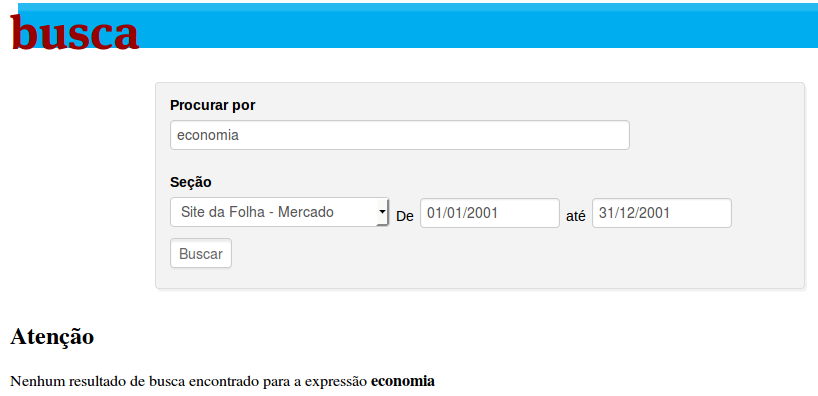

In [13]:
from IPython.display import Image
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_010.png')

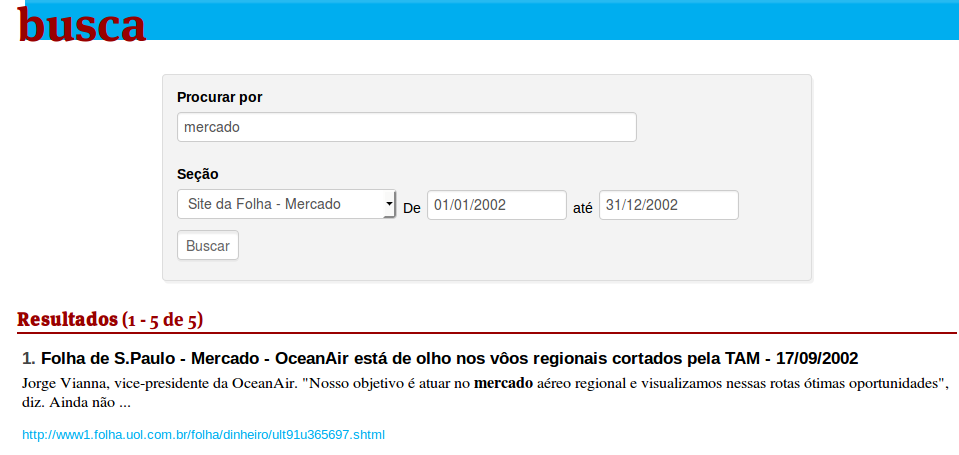

In [14]:
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_011.png')

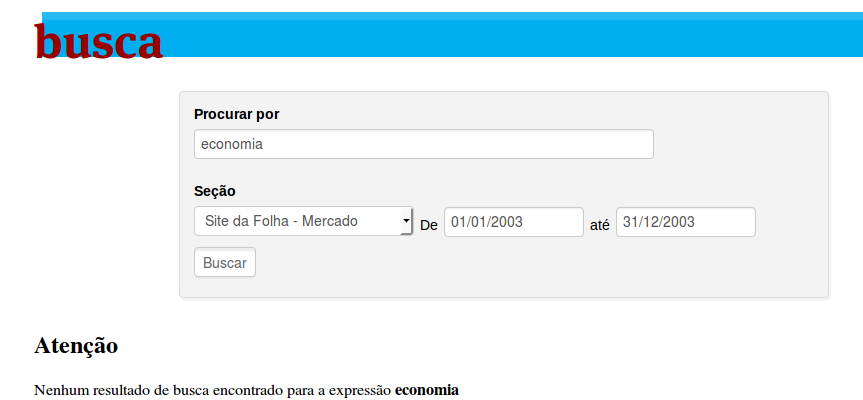

In [15]:
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_009.png')

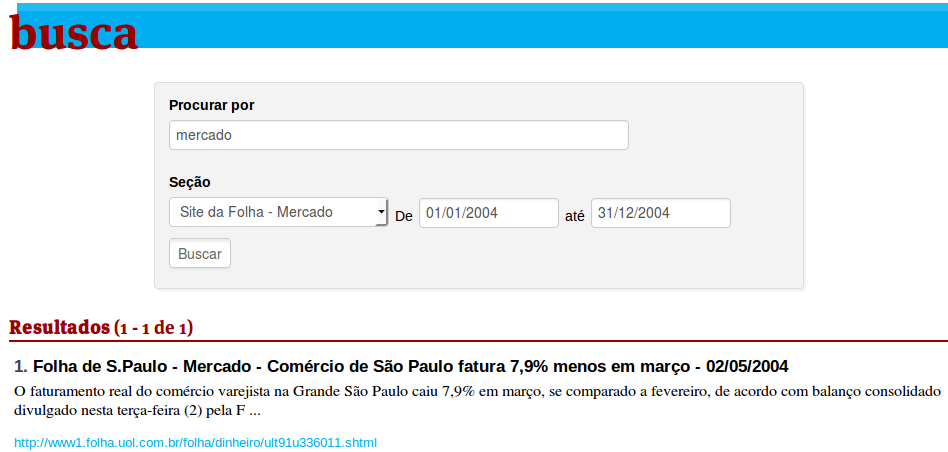

In [16]:
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_012.png')

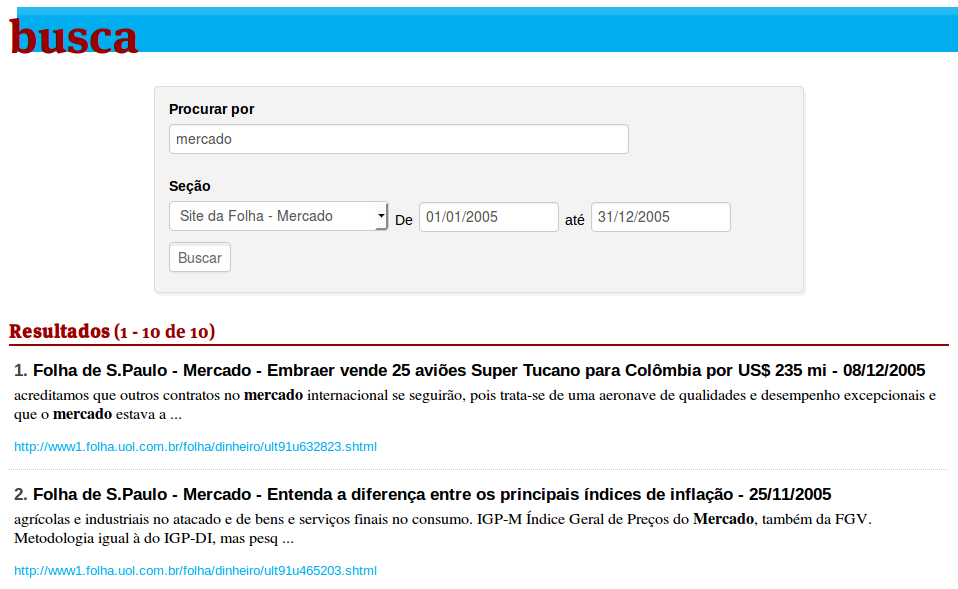

In [17]:
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_013.png')

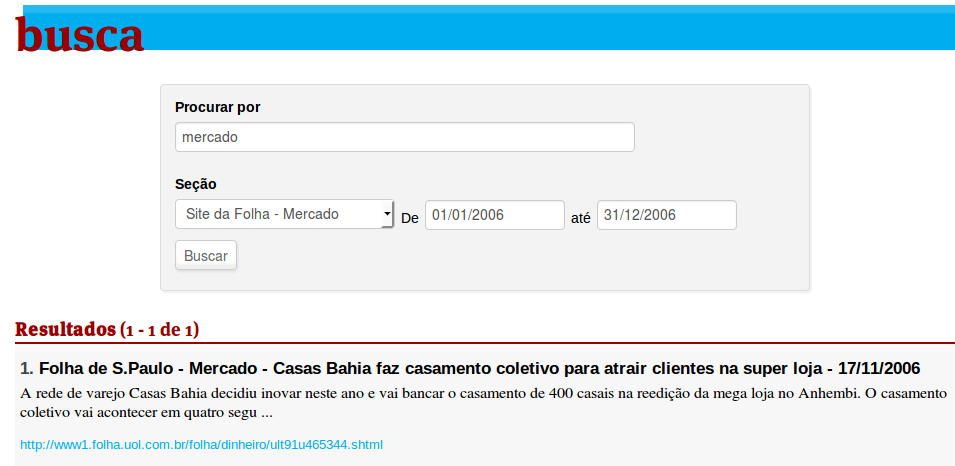

In [18]:
Image(filename=path+'PhD/src/scriptPython/evidencias/Selecao_014.png')

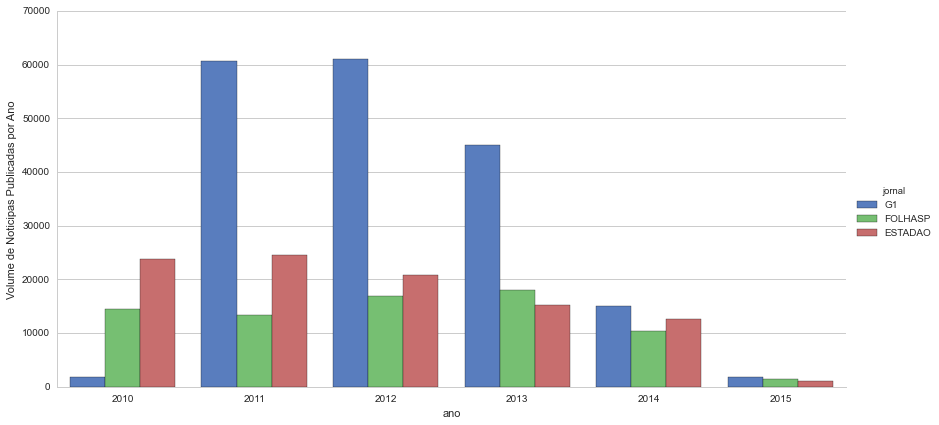

In [6]:
"""
Diante do exposto, daremos um zoom no período que varia entre 2010 e 2015.

"""
#Gera valores entre 2010 e 2015 inclusive [2010,2015]
anosDeInteresse = range(2010,2016)

# Seleciona apenas um subset do conjunto total com os anos entre [2010,2015]
vol_2010_2015 = volNewsYear[volNewsYear.ano.isin(anosDeInteresse)]

sns.set(style="whitegrid")
g = sns.factorplot(x="ano", y="quantidade", hue="jornal", data=vol_2010_2015,
                    size=6, kind="bar", palette="muted",  aspect=2)
g.set_ylabels("Volume de Noticipas Publicadas por Ano")

In [ ]:
"""
Apresentação a densidade de probabilidade entre 2010 e 2015 para os Jornais G1, Folha de São Paulo e 

"""
sns.set(rc={"figure.figsize": (15, 8)},style="white")
volTotal = pd.read_csv(path+'PhD/src/scriptPython/volumeTotalGranularidades.csv')

#Gera valores entre 2010 e 2015 inclusive [2010,2015]
anosDeInteresse = range(2010,2016)
# Seleciona apenas um subset do conjunto total com os anos entre [2010,2015]
vol_2010_2015 = volTotal[volTotal.Ano.isin(anosDeInteresse)]

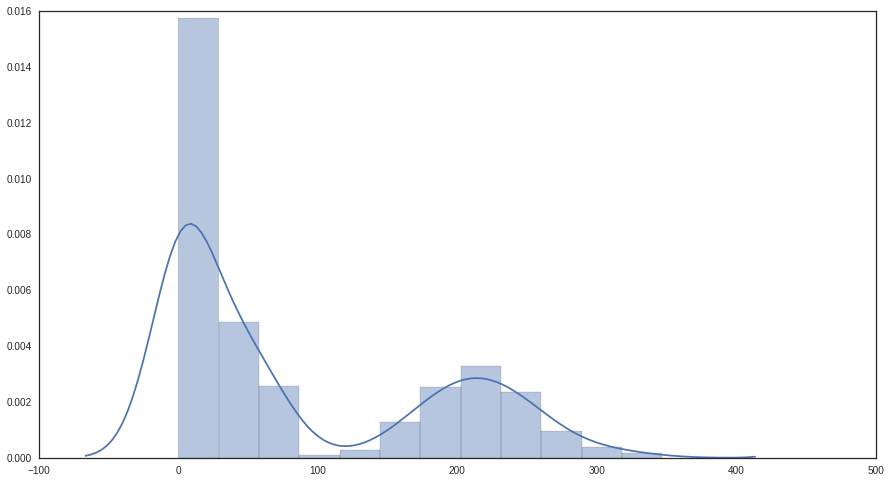

In [22]:
"""
Para o Jornal G1.

"""
vol_2010_2015_G1 =  vol_2010_2015[vol_2010_2015.Jornal.isin(["G1"])]
quantidade = [row.Quantidade for index,row in vol_2010_2015_G1.iterrows()]
sns.distplot(quantidade, hist=True);

In [ ]:
"""
Comentários para o G1:
......................

O gráfico apresenta a função de desidade de probabilidade para a quantidade de notícias publicadas no jornal G1 entre 
2010e 2015.

O que chama atenção é que essa distribuição bimodal nos apresenta uma probabilidade crescente entre 100 e 200 que é atípica.
Lendo de outra forma, é gradualmente mais provável que um determinado dia tenha entre 150 e 200 notícias publicadas
que entre 50 e 100 notícias.

Esse perfil informa uma tendência ao sensacionalismo. Enquanto para a maioria dos dias há poucas notícias econômicas
publicadas,para alguns temas, há uma explosão de interesse em publicação em um determinado dia.

Há mais probabilidade em encontrar dias com mais de 200 notícias que dias entre 75 e 100 publicações.

Outro fato que reforça a hipótese sensacionalista é a presença de dias com mais de 300 publicações econômicas. É tecnicamente
distoante crer que leitores sejam capazes de analisar 300 publicações. O que abre margem também para a falta de cuidado
com detalhes e o acabamento da notícia.

"""

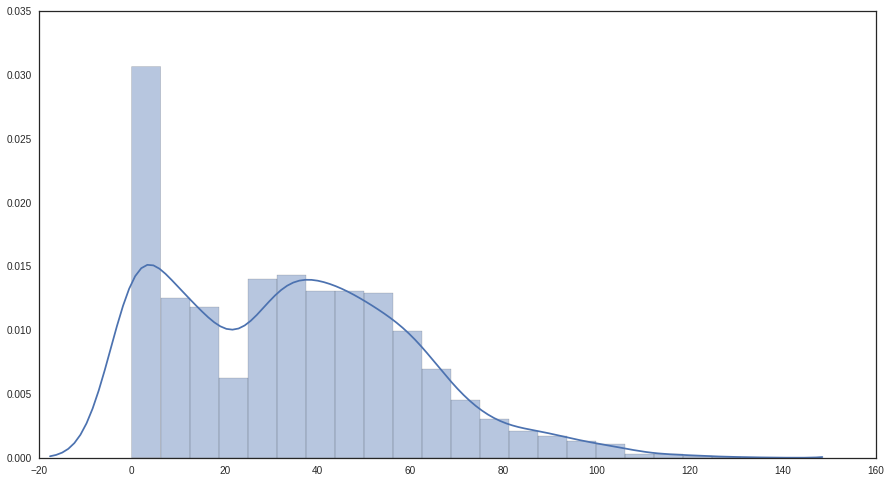

In [24]:
"""
Apresentação a densidade de probabilidade entre 2010 e 2015 para a Folha de São Paulo.

"""
vol_2010_2015_FOLHASP =  vol_2010_2015[vol_2010_2015.Jornal.isin(["FOLHASP"])]
quantidade = [row.Quantidade for index,row in vol_2010_2015_FOLHASP.iterrows()]
sns.distplot(quantidade, hist=True);

In [ ]:
"""
Comentários para a Folha de São Paulo:
......................................

Diferente do G1 o gráfico de densidade de probablidade da FOLHA DE SÃO PAULO apresenta-se bem mais compreensível.
1 - A amplitude. Um dia com um número de publicações grande é 120. Menos da metade para o G1.
2 - Com excessão do intervalo entre [20,25] (o que a primeira vista abre margem para a bimodalidade), a distribuição
é plenamente justificável. A partir de 50 publicações há uma diminuição gradativa da probablidade da quantidade 
de publicaçñoes em um determinado dia aumentar.

"""

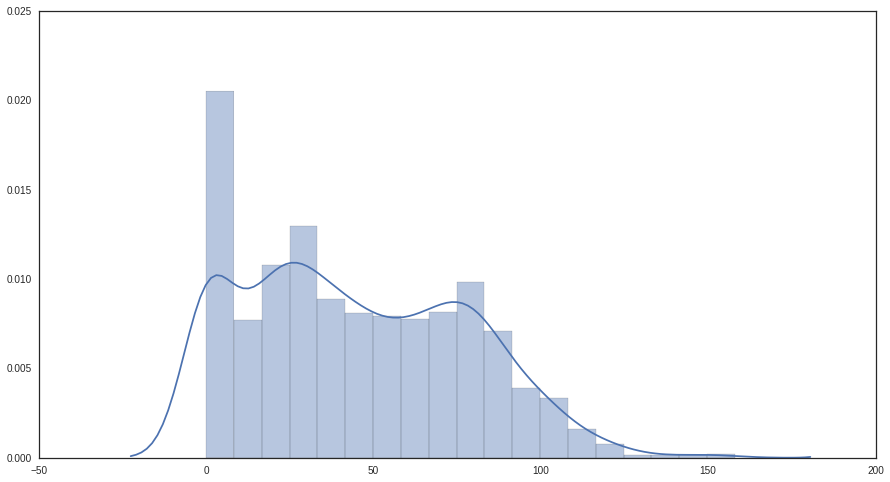

In [25]:
"""
Apresentação a densidade de probabilidade entre 2010 e 2015 para o ESTADAO

"""
vol_2010_2015_ESTADAO =  vol_2010_2015[vol_2010_2015.Jornal.isin(["ESTADAO"])]
quantidade = [row.Quantidade for index,row in vol_2010_2015_ESTADAO.iterrows()]
sns.distplot(quantidade, hist=True);

In [ ]:
"""
Comentários para o ESTADÃO:
...........................

Com o ESTADÃO revela-se o fenômeno intermediário entre o G1 e a FOLHA DE SÃO PAULO.

1 - Do ponto de vista da amplitude da quantidade, temos o maior valor de notícias diárias 150. Que seria a metade do G1.
2 - Do ponto de vista do desenho da curva. Há uma trimodalidade. A bimodalidade inicial é justificavel pela pouca variação.
Sendo que há realmente dias onde há mais novidades que outros e é naturalmente compreensível a curvatura.
Por outro lado, o pico nos 75 abre margem para uma certa tendência a forçar publicações sobre determinados assuntos econômicos
ou uma tendência a influencia o leitor ao invés de apenas informar.

"""

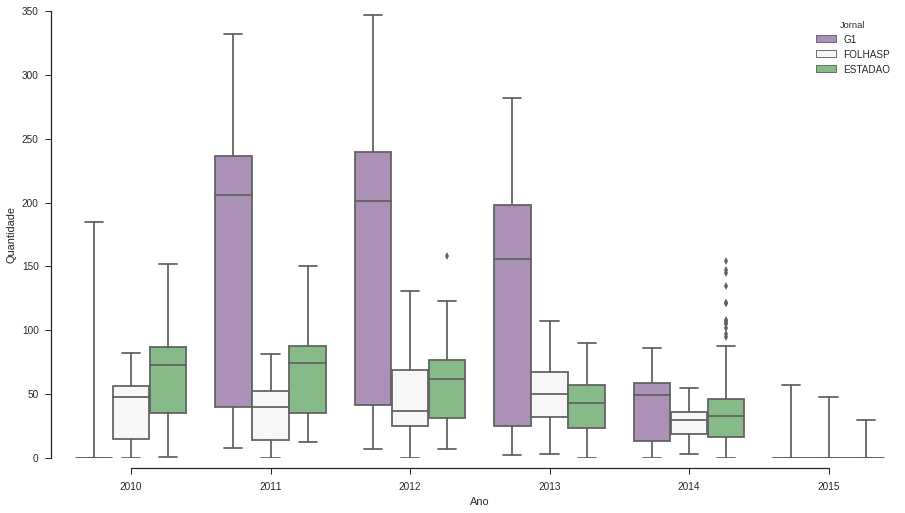

In [44]:
"""
Apresentação o gráfico de bloxplots entre 2010 e 2015
para visualizar a disperção entre as quantidades de 
notícias publicadas ao longo de cada ano.

"""
anosDeInteresse = range(2010,2016)
vol_2010_2015 = volTotal[volTotal.Ano.isin(anosDeInteresse)]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks")
sns.boxplot(x="Ano", y="Quantidade", hue="Jornal", data=vol_2010_2015, palette="PRGn")
sns.despine(offset=10, trim=True)


In [201]:
"""
Comentários sobre a disperção de publicações entre os jornais:
.................................................................

O bloxplot apresenta o comportamento da disperção das quantidades de notícias discutidas até aqui.

1 - Para todos os jornais analisados os 50% superior de informação contidos no box é o mais representativo.
2 - A FOLHA DE SÃO PAULO tende a manter um índice de tendência central de 50 notícias ao dia para todos os anos analisados.
3 - O G1 apresenta a maior variabilidade e amplitude entre todos os jornais. Tendo aproximadamente 200 notícias publicadas
por dia segundo o índice de tendência central. 
4 - A comportamento do índice de tendência central do jornal G1 é acompanhada de forma didedigna pelo jornal ESTADÃO
ao longo dos anos.
5 - No ano de 2013 ocorre uma atipicidade, é o único ano onde a mediana de publicações da folha de são paulo supera o ESTADÃO.


"""


0


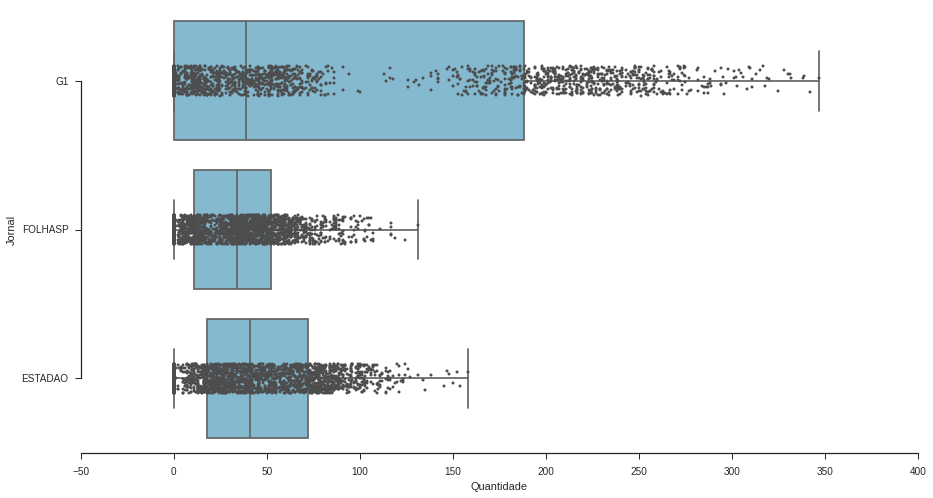

In [42]:
"""
Bloxplot para distribuição das quantidades de notícias por dia entre tres jornais entre [2010,2015]

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="Jornal", data=vol_2010_2015,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="Jornal", data=vol_2010_2015,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)


In [73]:
"""
Quantidade de dias sem notícias economicas por ano para um dos jornais analisados.

"""

sns.set(rc={"figure.figsize": (15, 8)},style="white")

vol_2010_2015 = volTotal[volTotal.Ano.isin(range(2010,2015))]
vol_2010_2015 = vol_2010_2015[["Ano","Jornal","Quantidade"]]
vol_SemNoticas_2010_2015 = vol_2010_2015[vol_2010_2015.Quantidade.isin([0])]


vol_SemNoticas_2010_2015.groupby(['Ano', 'Jornal']).size()

Ano   Jornal 
2010  FOLHASP      1
      G1         325
2011  FOLHASP      1
2012  FOLHASP      1
2013  ESTADAO      1
2014  ESTADAO     16
      G1           3
dtype: int64

In [ ]:
"""
Fatos e conclusões:
...................

- Para todos os jornais não há uma quantidade fixa de notícias publicadas por dia.

- A quantidade de publicações do G1 é bastante irregular, alcançando toda a escala
do histograma.Por su vez, Folha de São Paulo e ESTADÃO publicam diariamente 
entre 1 e 100 notícias econômicas.

- Apesar de o G1 ser o jornal que apresente mais publicação ao logo do ano, 
sua irregularidade faz com que alguns dias existam poucas notícias econômicas, 
enquanto outros dias a quantidade de notícias publicadas é enorme ultrapassando 
seguidamente o valor de 250 pubicações. 

Tal característica aponta para indícios de sensacionalismo para alguns fatos econômicos isolados, 
sem consistência em cobrir fatores econômicos diarimente.

O ESTADÃO é veículo mais regular em seu caderno econômico, publicando em média de 50 notícias diariamente
sem supervalorizar (em quantidade) algum fato econômico isolado.

"""

In [ ]:
"""
#..............................
#
# 1.2 - GRANULARIDADE DE MÊS
#
#..............................
"""

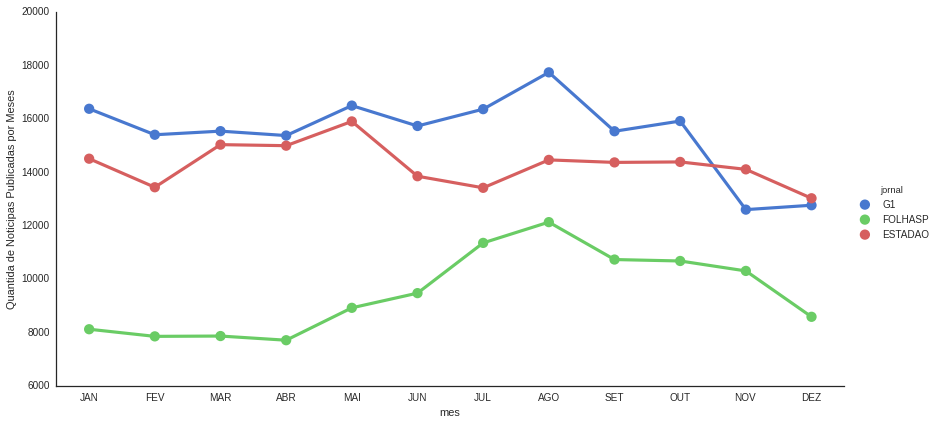

In [78]:
"""
Quantidade de notícias postadas em cada mes para cada um dos Jornais.

"""
volMonths = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticias-Mes.csv')

g = sns.factorplot(x="mes", y="quantidade", hue="jornal", data=volMonths,
                   size=6, kind="point", palette="muted",  aspect=2)
g.set_ylabels("Quantida de Noticipas Publicadas por Meses")

In [ ]:
"""
Comentários:
............

1 - AGOSTO é o mês com maior quantidade de publicações econômicas para os jornais.
2 - A partir de AGOSTO existe uma tendência de queda para a quantidade de publicações de notícias econômicas 
em todos os jornais observador.
3 - Para G1 e FOLHA DE SÃO PAULO há um crescimento gradativo de junho até agosto.
4 - O mês de MAIO apresenta uma notória intensificação de notícias econômicas para todos os jornais.

"""

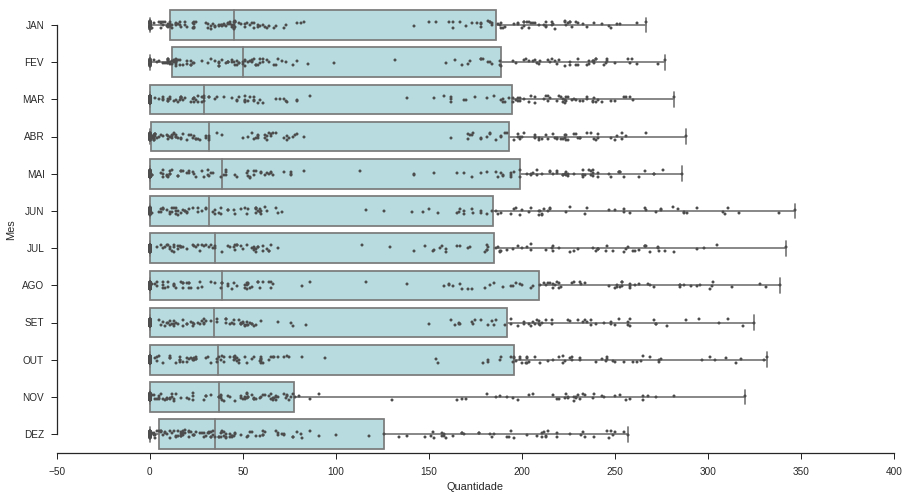

In [242]:
"""
Bloxplot para distribuição de notícias ao longo dos meses entre tres jornais entre [2010,2015]
para o Jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="Mes", data=vol_2010_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="Mes", data=vol_2010_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

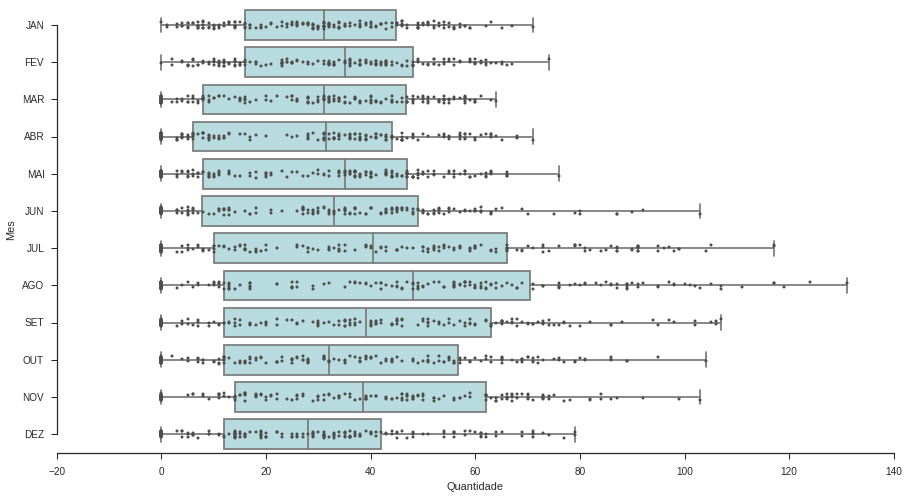

In [243]:
"""
Bloxplot para distribuição de notícias ao longo dos meses entre tres jornais entre [2010,2015]
para o Jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="Mes", data=vol_2010_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="Mes", data=vol_2010_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

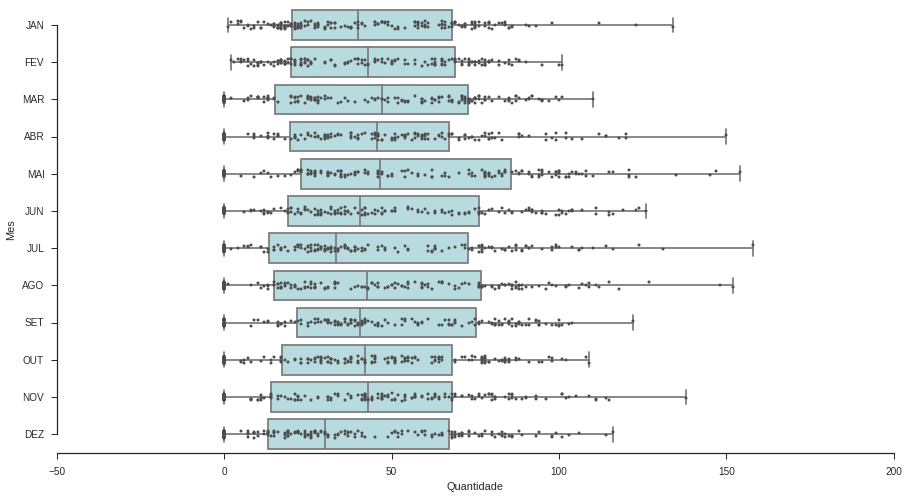

In [241]:
"""
Bloxplot para distribuição de notícias ao longo dos meses entre tres jornais entre [2010,2015]
para o Jornal ESTADÃO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="Mes", data=vol_2010_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="Mes", data=vol_2010_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............
Analisando os bloxplot por meses:
1 - O G1 apresenta maior índice de tendência central para o mês de FEVEREIRO ~50 notícias
2 - A FOLHA DE SÃO PAULO maior índice de tendência central para o mês de AGOSTO ~45 notícias
3 - ESTADÃO maior índice de tendência central para o mês de MAIO ~47 notícias.

É corriqueiro a presença de outliers, um dia no mês de agosto onde a quantidade de publicações explode.

"""

In [ ]:
"""
O objetivo da análise a seguir é tentar identificar dias onde hajam maior quantidade de
e se há dias [1,31] mais prováveis para haverem notícias para cada jornal.

"""

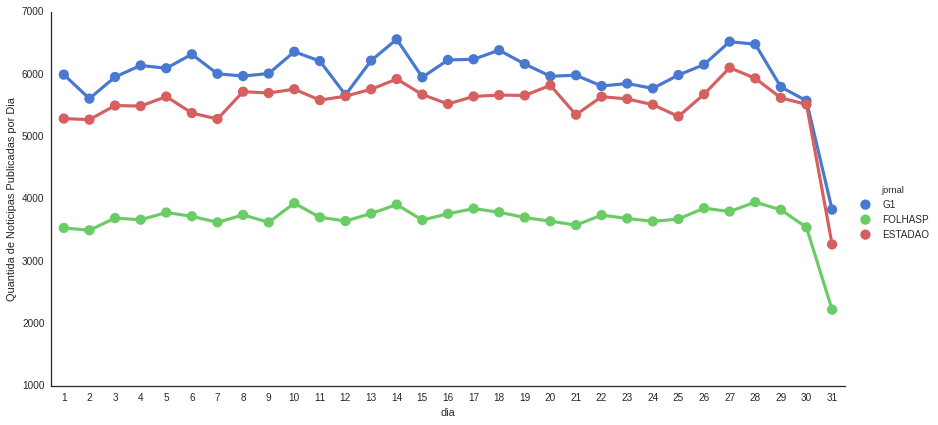

In [79]:
"""
Quantidade de notícias publicadas por dia para cada um dos jornais.

"""
volByDay = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticias-Dia.csv')

g = sns.factorplot(x="dia", y="quantidade", hue="jornal", data=volByDay,
                   size=6, kind="point", palette="muted",  aspect=2)
g.set_ylabels("Quantida de Noticipas Publicadas por Dia")

In [ ]:
"""
Comentários:
............
1 - O dia 14 é notoriamente marcado pelo crescimento no volume de publicações para todos os jornais.
2 - Há um decescimento na quantidade de publicações entre [22,24] e um crescimento gradual até o dia 27. 
Também é notório a diminuição da quantidade de publicações de notícias econômicas em todos os jornais após o dia 27.
3 - Há um crescimento entre [2,5] para todos os jornais.
4 - A FOLHA DE SÃO PAULO apresenta menos variação que os demais jornais.
"""

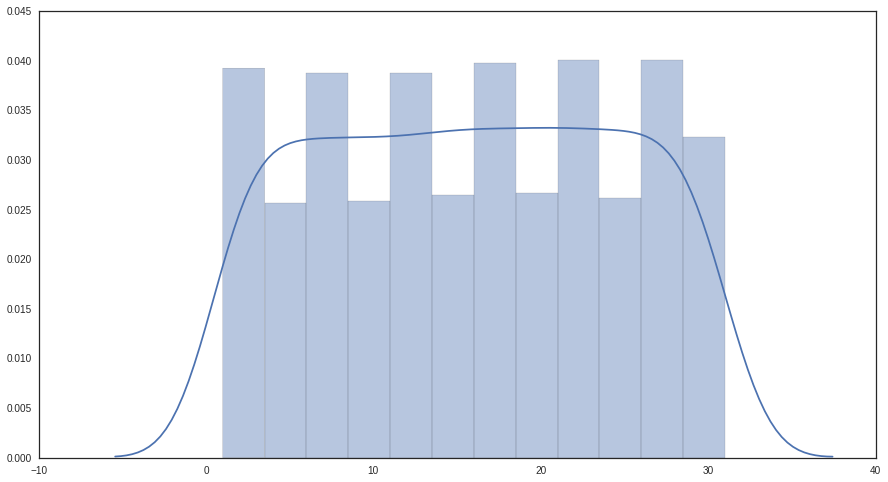

In [81]:
"""
Distribuição de notícias por dias [1,31] entre [2010,2015]
para o jornal G1.
"""
quantidade = [row.Dia for index,row in vol_2010_2015_G1.iterrows() if row.Quantidade > 0]
sns.distplot(quantidade, hist=True);

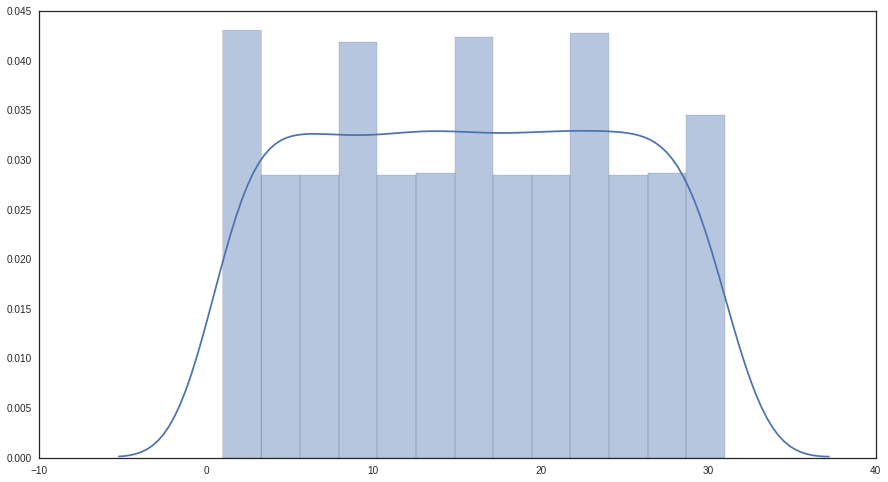

In [82]:
"""
Distribuição de notícias por dias [1,31] entre [2010,2015]
para o jornal ESTADÃO.

"""
quantidade = [row.Dia for index,row in vol_2010_2015_ESTADAO.iterrows() if row.Quantidade > 0]
sns.distplot(quantidade, hist=True);


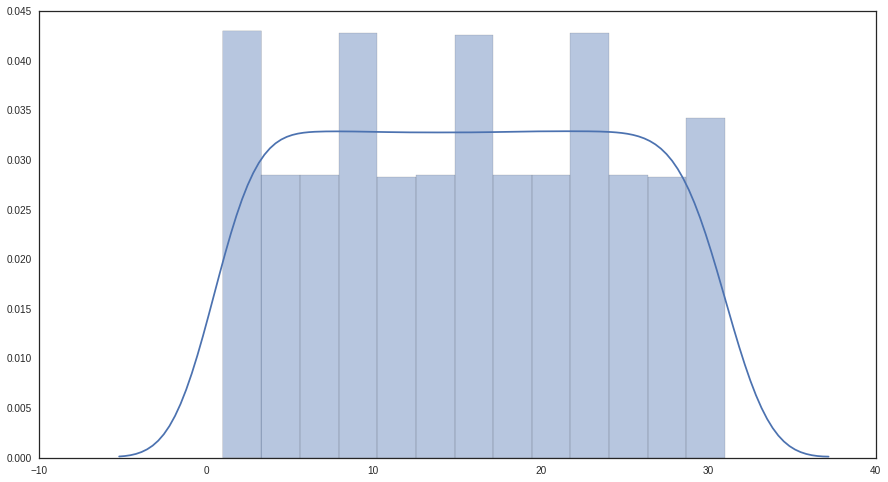

In [83]:
"""
Distribuição de notícias por dias [1,31] entre [2010,2015]
para o jornal Folha de São Paulo.

"""
quantidade = [row.Dia for index,row in vol_2010_2015_FOLHASP.iterrows() if row.Quantidade > 0]
sns.distplot(quantidade, hist=True);

In [ ]:
"""
O objetivo dessa análise é saber se há algum dia da semana [sun,sat]
mais provável para de ocorrem notícias.

"""

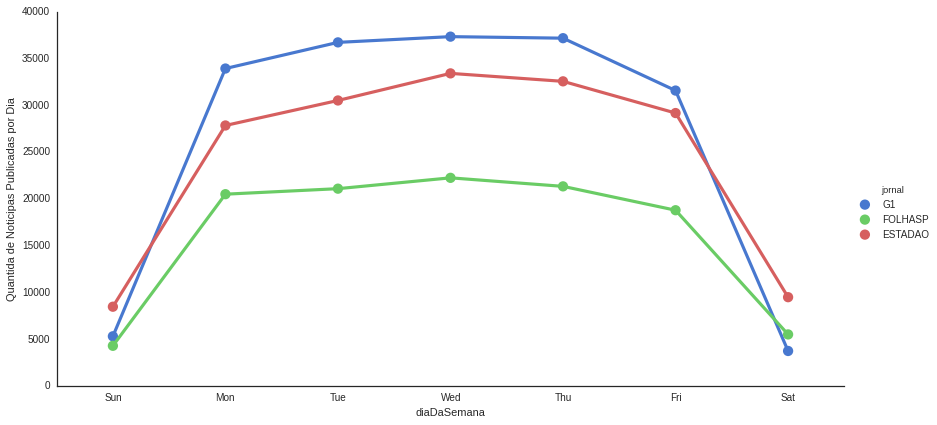

In [84]:
volByWeekDay = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticias-DiasDaSemana.csv')

g = sns.factorplot(x="diaDaSemana", y="quantidade", hue="jornal", data=volByWeekDay,
                   size=6, kind="point", palette="muted",  aspect=2)
g.set_ylabels("Quantida de Noticipas Publicadas por Dia")

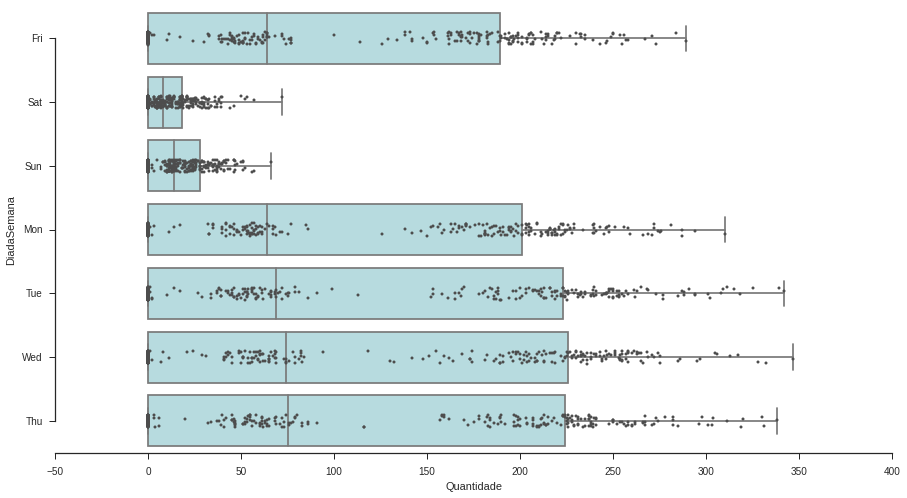

In [85]:
"""
Bloxplot para distribuição de notícias ao longo dos dia da semana entre [2010,2015]
para o Jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

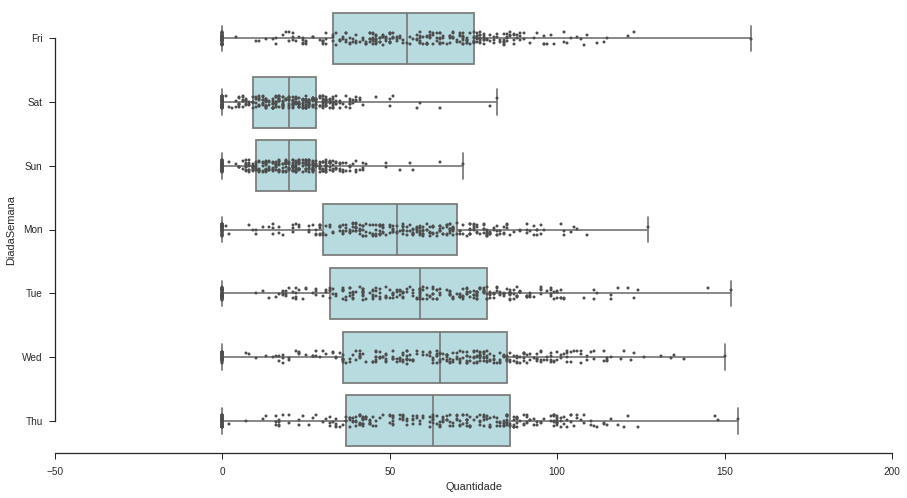

In [86]:
"""
Bloxplot para distribuição de notícias ao longo dos dias da semana entre [2010,2015]
para o Jornal ESTADÃO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

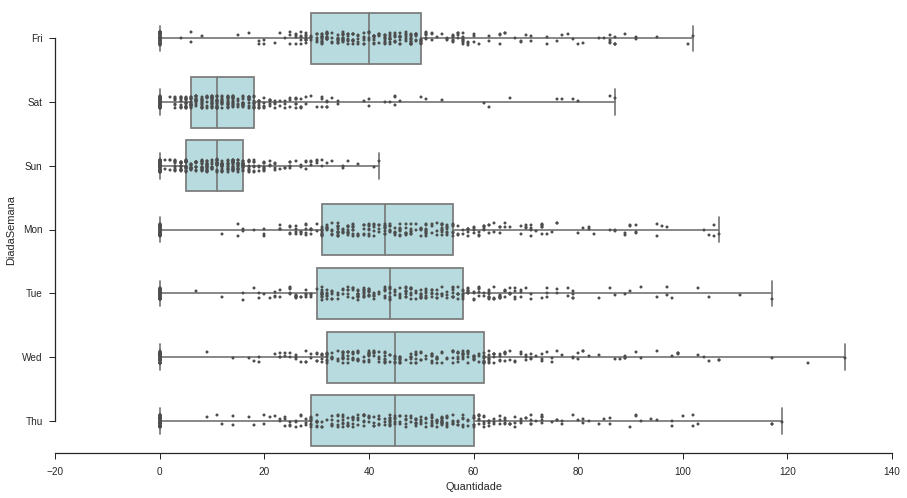

In [312]:
"""
Bloxplot para distribuição de notícias ao longo dos dias da semana entre entre [2010,2015]
para o Jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Quantidade", y="DiadaSemana", data=vol_2010_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - Para ESTADÃO E FOLHA DE SÃO PAULO, a quarta-feira é o dia com maior quantidade de publicação econômicas.
2 - A partir da quinta-feira há uma menor quantidade de notícias econômicas publicadas.
3 - Para o G1: quinta-feira ~70 notícias
    Para o ESTADÃO: quarta-feira ~60 notícias
    Para a FOLHA DE SÃO PAULO: quarta-feira ~45 notícias.
    
4 - Quarta e Quinta feira são dias corriqueiros para os maiores outliers.

"""

In [ ]:
"""
Como criar varios histogramas
"""
#volTotal = pd.read_csv('/Users/zegildo/Documents/workspace/PhD/src/scriptPython/volumeTotalGranularidades.csv')

#sns.set(style="darkgrid")
#g = sns.FacetGrid(volTotal, row="DiadaSemana", col="Jornal", margin_titles=True)
#bins = np.linspace(0, 250, 25)
#g.map(plt.hist,"size", color="steelblue", bins=bins, lw=0)

In [ ]:
"""
                                            #..............................
                                            #
                                            # 2 - ANÁLISE DE REPERCUSSÕES
                                            #
                                            #..............................
"""

In [ ]:
"""
#........................................
#
# 2.1 - Analise de Comentarios 
#
# 2.1.1 - Ano a Ano
#........................................
"""

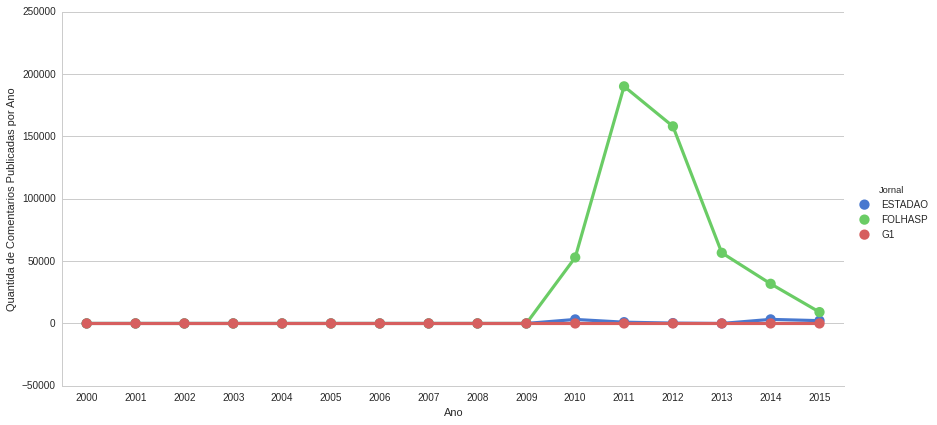

In [5]:
"""
Plota a quantidade de comentarios por Jornal entre 2000 e 2015.

"""
volRepercussao = pd.read_csv(path+'PhD/src/scriptPython/volumeRepercussoes.csv')

grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volRepQuantidComentarios = grouped['Comentarios'].agg({'Comentarios' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="Comentarios", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantida de Comentarios Publicadas por Ano")

In [6]:
"""
Quantidade de noticias economicas que receberam comentarios

"""
#vol_2009_2015 = volRepQuantidComentarios[volRepQuantidComentarios.Ano.isin(range(2009,2016))]
vol_2009_2015_G1 = vol_2009_2015[vol_2009_2015.Jornal.isin(["G1"])]
vol_2009_2015_G1_Comentarios = vol_2009_2015_G1[vol_2009_2015_G1.Comentarios > 0]

len(vol_2009_2015_G1_Comentarios.index)

NameError: name 'vol_2009_2015' is not defined

In [14]:
"""
Comentarios:
............

1 - O jornal a FOLHA DE SÃO PAULO é notoriamente o que mais oportuniza ao usuário a possibilidade de emitir comentários.
2 - É possível verificar alguma atividade no jornal ESTADÃO nos anos 2010 e 2014.
3 - Há uma tendência decrescente desde 2011 em relação a esse tipo de iteração com a notícia.
4 - Apesar de permitir comentários em diversas notícias o G1 não apresenta nenhum comentário para notícias econômicas.
Pode ser uma política do jornal ou apenas uma preferência do público.
"""


'\nComentarios:\n............\n\n1 - O jornal a FOLHA DE S\xc3\x83O PAULO \xc3\xa9 notoriamente o que mais oportuniza ao usu\xc3\xa1rio a possibilidade de emitir coment\xc3\xa1rios.\n2 - \xc3\x89 poss\xc3\xadvel verificar alguma atividade no jornal ESTAD\xc3\x83O nos anos 2010 e 2014.\n3 - H\xc3\xa1 uma tend\xc3\xaancia decrescente desde 2011 em rela\xc3\xa7\xc3\xa3o a esse tipo de itera\xc3\xa7\xc3\xa3o com a not\xc3\xadcia.\n4 - Apesar de permitir coment\xc3\xa1rios em diversas not\xc3\xadcias o G1 n\xc3\xa3o apresenta nenhum coment\xc3\xa1rio para not\xc3\xadcias econ\xc3\xb4micas.\nPode ser uma pol\xc3\xadtica do jornal ou apenas uma prefer\xc3\xaancia do p\xc3\xbablico.\n'

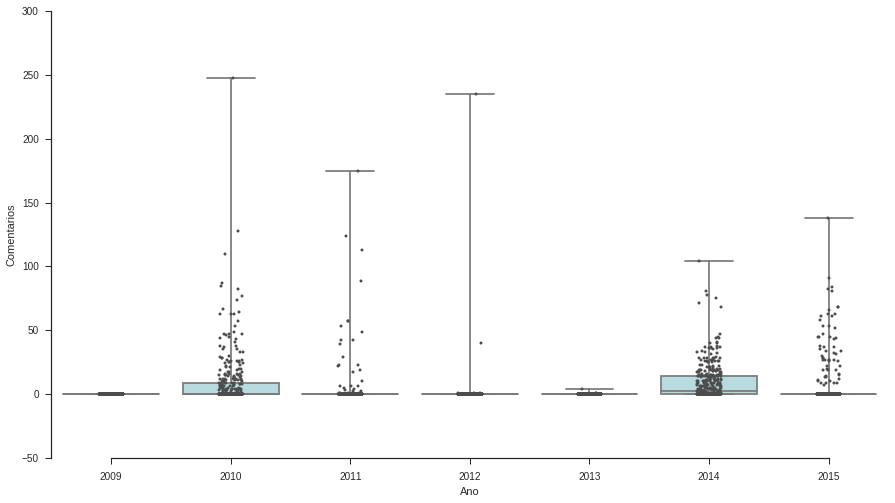

In [7]:
"""
Bloxplot para distribuição de comentarios ao longo dos dias da semana entre entre [2010,2015]
para o Jornal ESTADAO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_ESTADAO = vol_2009_2015[vol_2009_2015.Jornal.isin(["ESTADAO"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Comentarios", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Comentarios", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [10]:
vol_2009_2015_ESTADAO[vol_2009_2015_ESTADAO.Comentarios > 100]

DiadaSemana  Mes  Dia   Ano   Jornal  Quantidade  Comentarios  Tweets  \
11747         Mon  SET   20  2010  ESTADAO          67          248      14   
11906         Fri  NOV   12  2010  ESTADAO          79          128      14   
11933         Sun  NOV   21  2010  ESTADAO          42          110       2   
12062         Mon  JAN    3  2011  ESTADAO          79          175      40   
12170         Tue  FEV    8  2011  ESTADAO          78          113      20   
13130         Sun  DEZ   25  2011  ESTADAO          13          124     200   
13526         Sat  MAI    5  2012  ESTADAO          22          235       0   
16064         Fri  AGO   29  2014  ESTADAO          51          104    1920   
16610         Fri  FEV   27  2015  ESTADAO          23          138    2250   

       Facebook  LinkedIn  GooglePlus  TotalRepercussao  
11747        38         0           0               300  
11906         0         0           0               142  
11933         3         0           1               116  
12062         0         0           1               216  
12170         7         4           1               145  
13130         8        24          11               367  
13526         0         0           3               238  
16064     27941       118         201             30284  
16610     52588       386         524             55886

In [ ]:
"""
Comentarios:
............
Outliers devem ser observados em 2010 e 2012.

"""

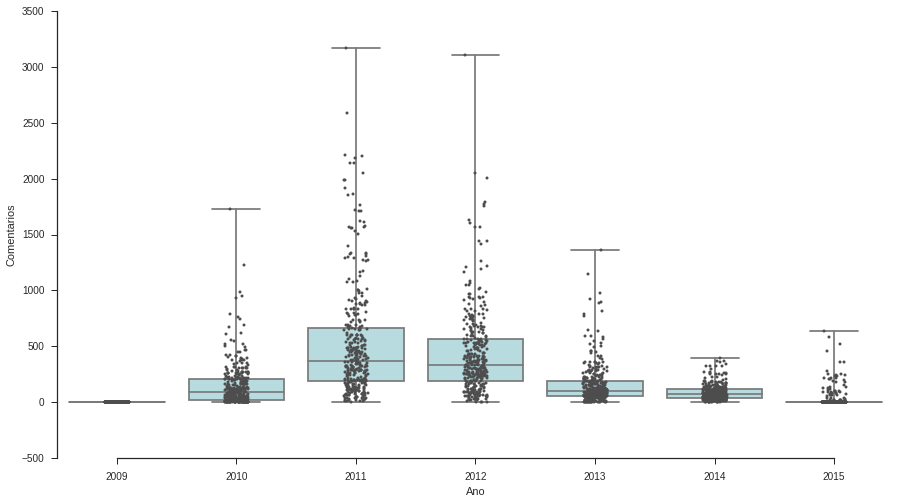

In [351]:
"""
Bloxplot para distribuição de comentarios ao longo dos dias da semana entre entre [2010,2015]
para o Jornal FOLHA DE SAO PAULO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_FOLHASP = vol_2009_2015[vol_2009_2015.Jornal.isin(["FOLHASP"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Comentarios", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Comentarios", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentario:
...........
Outliers 2011 e 2012.

"""

In [ ]:
"""
#........................................
#
# 2.1.2 - Analise de Comentarios Mes a Mes
#
#........................................
"""

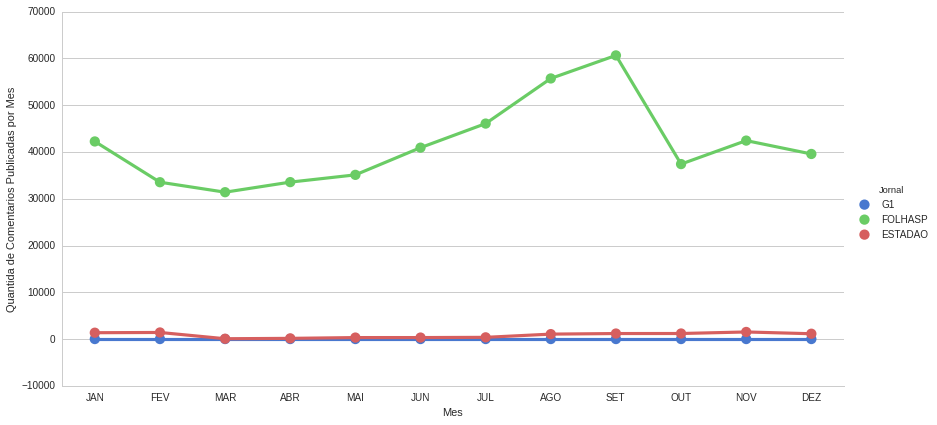

In [176]:
"""
Plota a quantidade de comentarios por Jornal entre 2000 e 2015.

"""
grouped = volRepercussao.groupby(['Mes', 'Jornal'],  sort=True)
volRepQuantidComentarios = grouped['Comentarios'].agg({'Comentarios' : np.sum}).reset_index()
volRepQuantidComentarios['Mes'] = pd.Categorical(volRepQuantidComentarios['Mes'], 
                                                ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", 
                                                  "JUL", "AGO","SET", "OUT", "NOV", "DEZ"])

sns.set(style="whitegrid")

g = sns.factorplot(x="Mes", y="Comentarios", hue="Jornal", data=volRepQuantidComentarios.sort(["Mes"]),
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantida de Comentarios Publicadas por Mes")

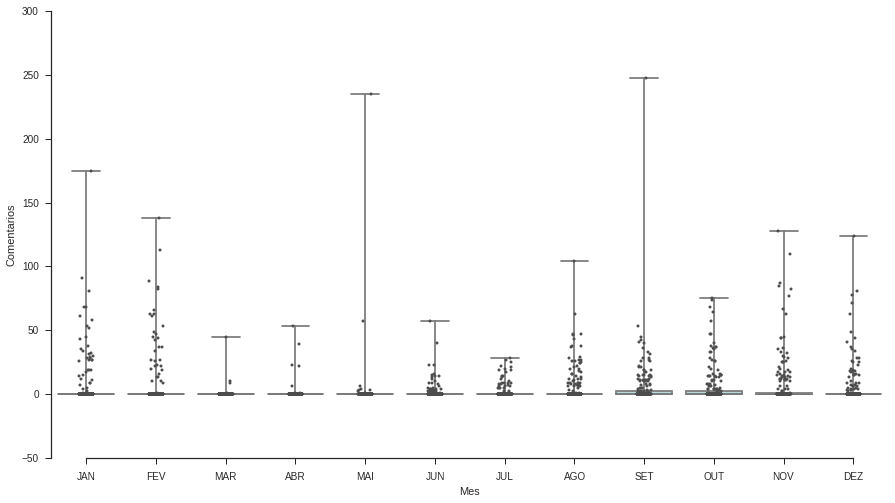

In [339]:
"""
Bloxplot para distribuição de comentarios ao longo dos meses entre entre [2009,2015]
para o Jornal ESTADAO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_ESTADAO = vol_2009_2015[vol_2009_2015.Jornal.isin(["ESTADAO"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Comentarios", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Comentarios", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

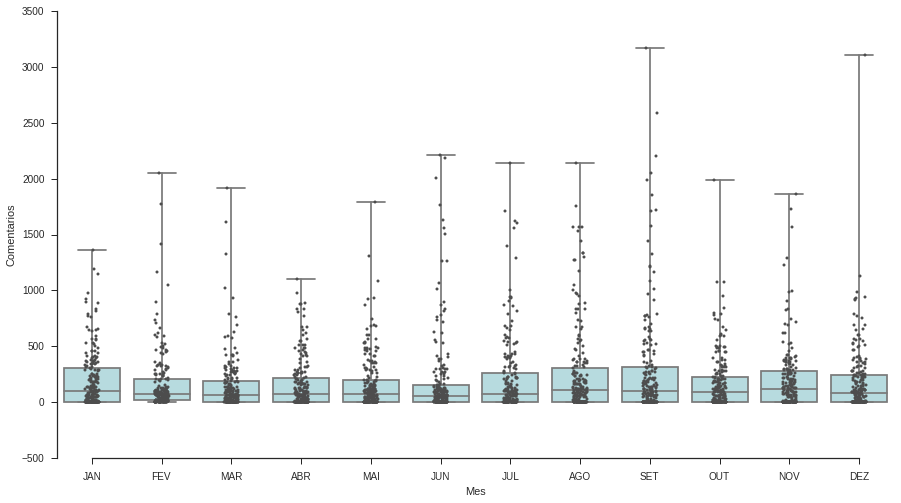

In [193]:
"""
Bloxplot para distribuição de comentarios ao longo dos dias da semana entre entre [2010,2015]
para o Jornal FOLHA DE SAO PAULO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_FOLHASP = vol_2009_2015[vol_2009_2015.Jornal.isin(["FOLHASP"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Comentarios", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Comentarios", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............
1 - O mês de SETEMBRO é obviamente o mês com maior quantidade de comentários.
2 - Há uma crescente nos comentários de Março a Agosto.
3 - Para o ESTADÃO há 2 outliers que chamam atenção em MAIO e SETEMBRO.
4 - 75% dos dados do ESTADÃO encontra-se no 0, tanto é que esconde-se as caixas do bloxplot.
5 - Outliers de Setembro e Dezembro chamam atenção.
6 - A mediana para A FOLHA DE SÃO PAULO apresenta pouca variação ao longo dos meses.

"""

In [ ]:
"""
#........................................
#
# 2.1.3 - Analise de Comentarios Dia a Dia
#
#........................................
"""

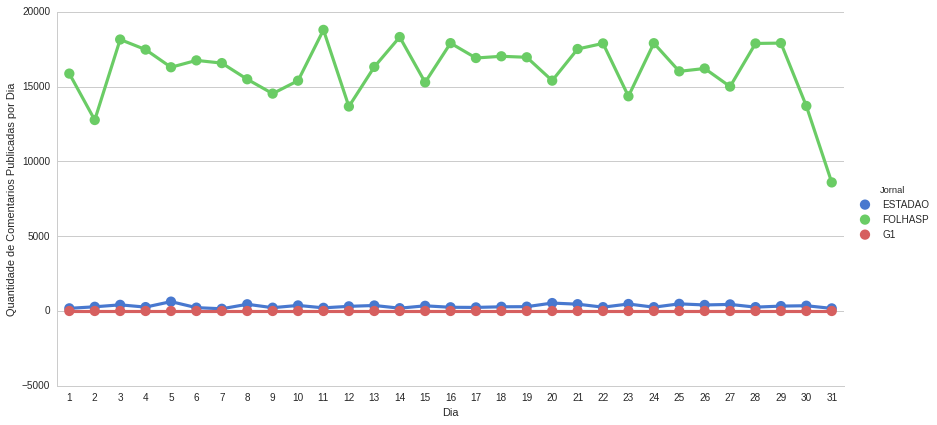

In [154]:
"""
Plota a quantidade de comentarios por Jornal entre 2000 e 2015.

"""
grouped = volRepercussao.groupby(['Dia', 'Jornal'])
volRepQuantidComentarios = grouped['Comentarios'].agg({'Comentarios' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Dia", y="Comentarios", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Comentarios Publicadas por Dia")

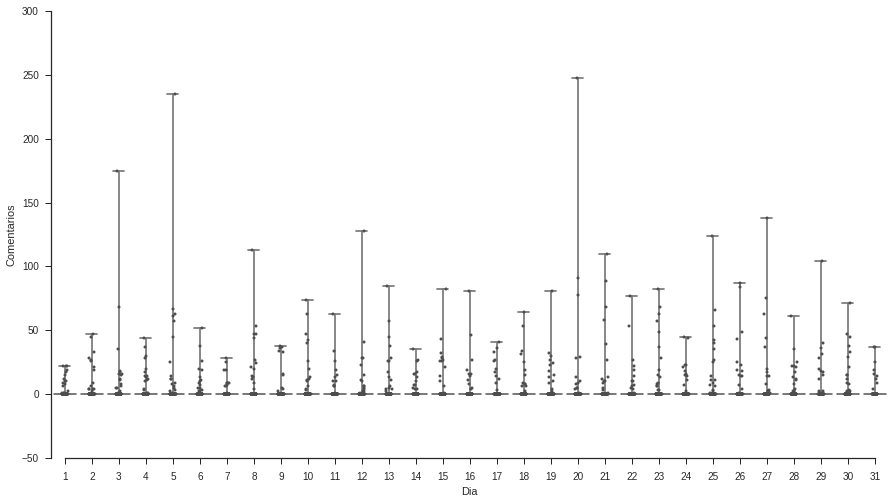

In [354]:
"""
Bloxplot para distribuição de comentarios ao longo dos dias do mes entre entre [2009,2015]
para o Jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Comentarios", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Comentarios", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

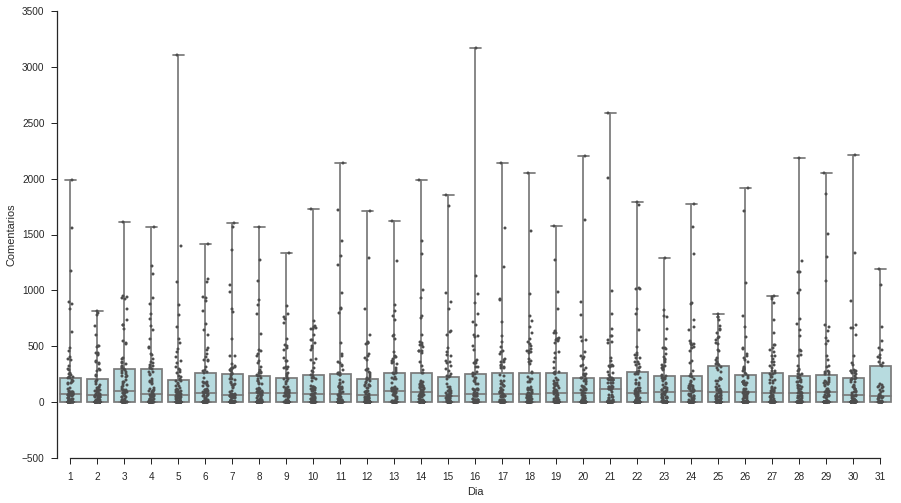

In [355]:
"""
Bloxplot para distribuição de comentarios ao longo dos dias do mes entre entre [2009,2015]
para o Jornal FOLHA DE SAO PAULO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Comentarios", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Comentarios", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - Entre [3,9] há uma tendência de queda a quantidade de comentários.
2 - 75% dos dados correspondentes a quantidade de comentários para o jornal ESTADÃO é 0.
3 - Novamente para o jornal FOLHA DE SÃO PAULO encontra-se ~100.
4 - OutLiers para os dias 5 e 20 para o ESTADÃO.
5 - OUTLIERS para os dias 5 e 16 para o jornal FOLHA DE SÃO PAULO.

"""

In [ ]:
"""
#.....................................................
#
# 2.1.4 - Analise de Comentarios para os dias da Semana
#
#.....................................................
"""

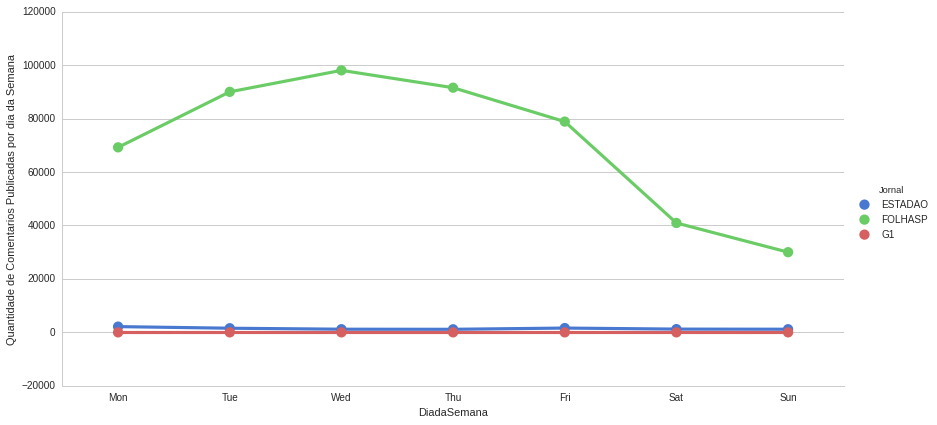

In [165]:
"""
Plota a quantidade de comentarios por Jornal entre 2000 e 2015 pelo dia da Semana.

"""
grouped = volRepercussao.groupby(['DiadaSemana', 'Jornal'])
volRepQuantidComentarios = grouped['Comentarios'].agg({'Comentarios' : np.sum}).reset_index()
volRepQuantidComentarios['DiadaSemana'] = pd.Categorical(volRepQuantidComentarios['DiadaSemana'], 
                                                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])
sns.set(style="whitegrid")

g = sns.factorplot(x="DiadaSemana", y="Comentarios", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Comentarios Publicadas por dia da Semana")

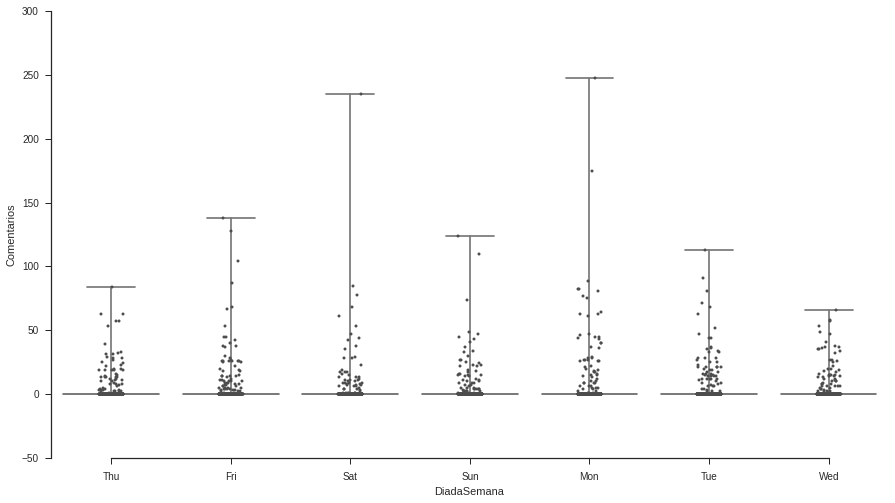

In [170]:
"""

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Comentarios", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Comentarios", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

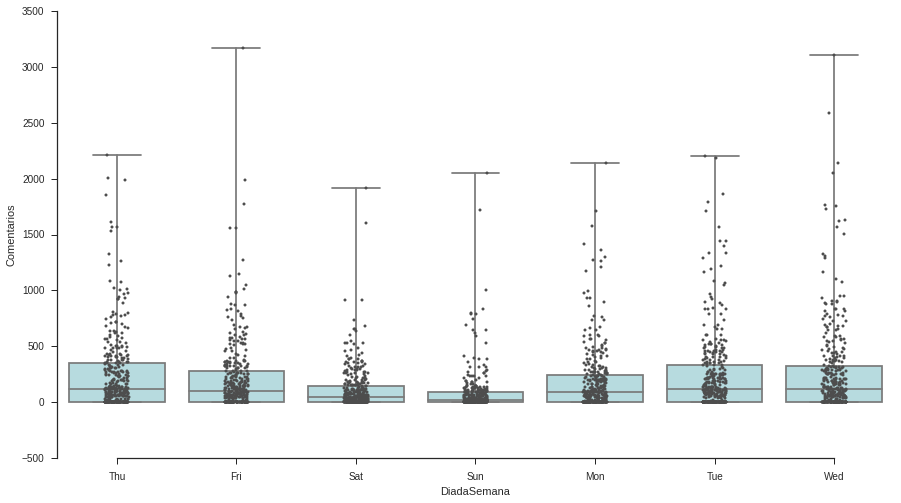

In [358]:
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Comentarios", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Comentarios", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - A quarta-feira é o dia da semana mais provável de haver comentários.
2 - Há uma crescente de segunda a quarta e uma decrescente de quarta a domingo.

"""

In [ ]:
"""
#.....................................................
#
# 2.2 - Analise de Tweets
# 2.2.1 - Analise de Tweets Ano a Ano
#
#.....................................................
"""

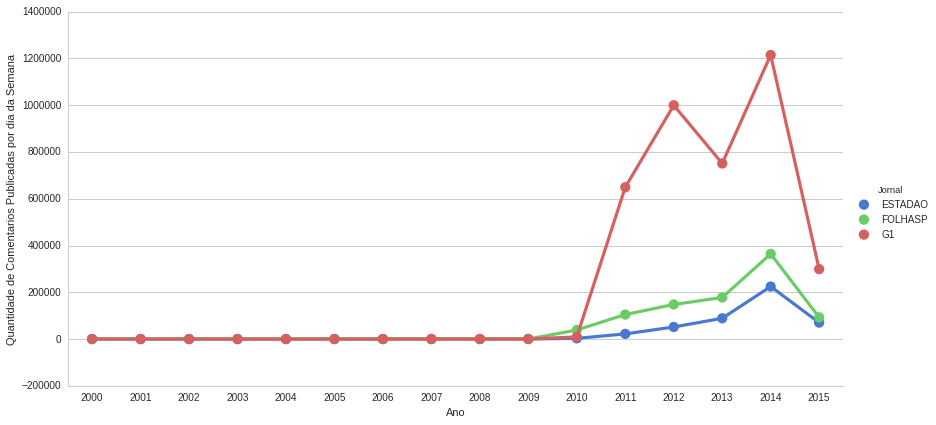

In [171]:
"""
Plota a manifestações de repercussões via Tweets por Jornal entre 2000 e 2015.

"""
grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volRepQuantidComentarios = grouped['Tweets'].agg({'Tweets' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="Tweets", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Comentarios Publicadas por dia da Semana")

In [ ]:
"""
Comentários:
............

1 - O G1 é o jornal que apresenta maior número de repercussões de suas notícias via Twitter. Tendo em 2014 mais de 1.200.000
repercussões para suas notícias.

2 - A repercussão de notícias do ESTADÃO e FOLHA DE SÃO PAULO utilizando o Twitter apresenta tendências semelhantes de
crescimento desde 2010.

3 - 2014 foi o ano com maior repercussão via Twitter para todos os jornais analisados.

"""


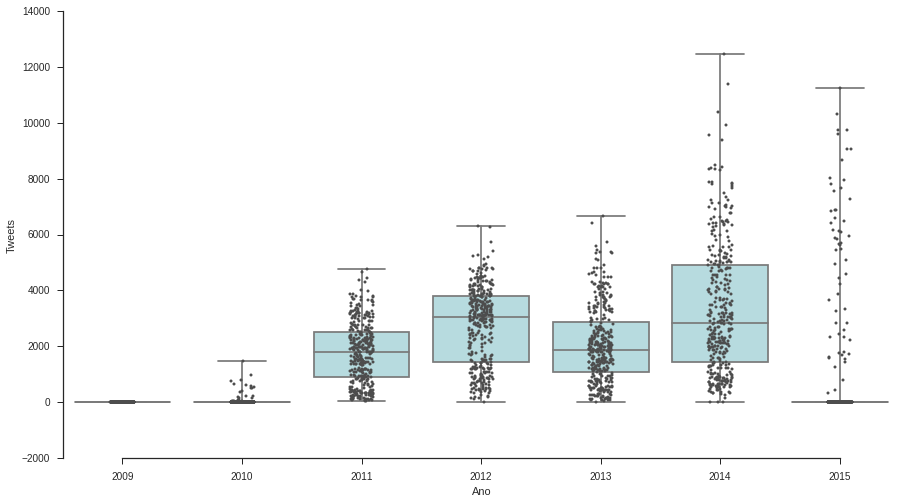

In [362]:
"""
Distruibuição da repercussão via Tweeter entre os anos de 2009 e 2015 pelo jornal
G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Tweets", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Tweets", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

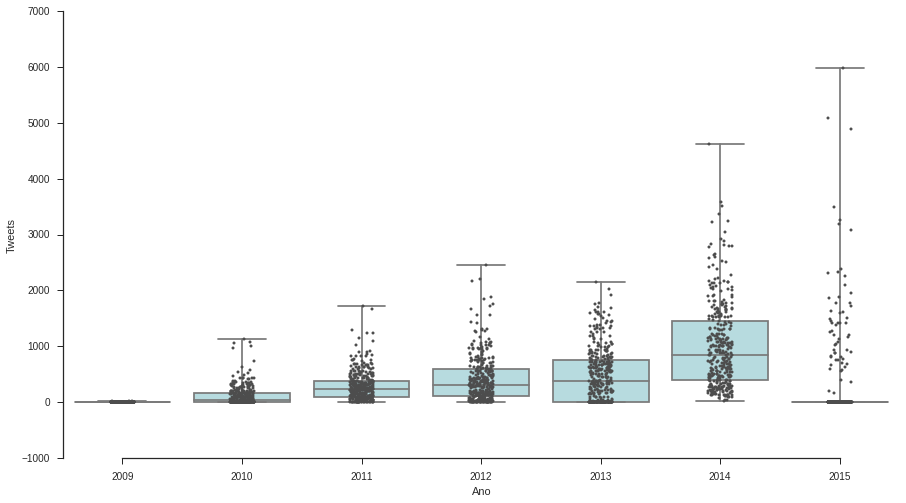

In [363]:
"""
Distruibuição da repercussão via Tweeter entre os anos de 2009 e 2015 pelo jornal
Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Tweets", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Tweets", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

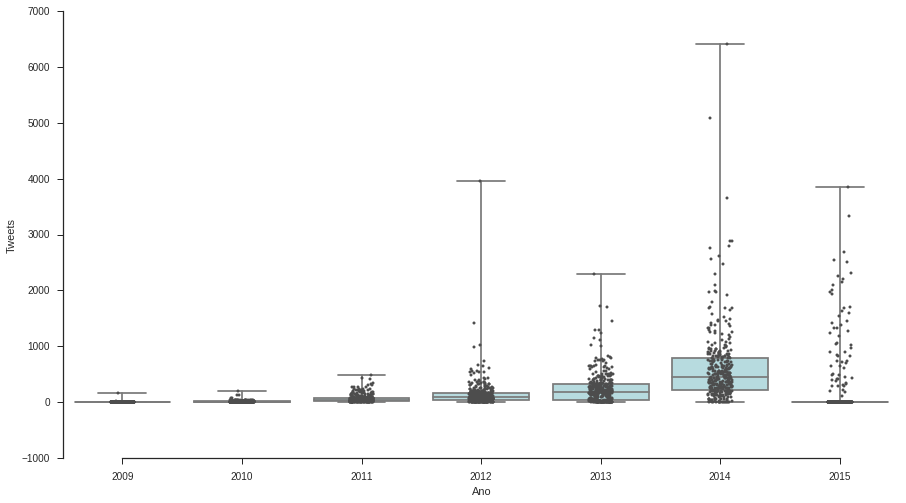

In [361]:
"""
Distruibuição da repercussão via Tweeter entre os anos de 2009 e 2015 pelo jornal
ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Tweets", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Tweets", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - O jornal G1 apresenta uma mediana de repercussão de suas notícias econômicas ~2000 tweets por notícias.
2 - Durante o ano de 2013 notícias a evolução crescente de repercussão de notícias via twitter é interrompida,
estabilizando em 2014.
3 - Para o jornal ESTADÃO algumas notícias específicas em 2015 já foram mais Twitadas que em em todos os outros anos.
4 - ESTADÃO e FOLHA DE SÃO PAULO apresentam realmente tendência crescente na repercussão de notícias econômicas via Twitter.
"""

In [ ]:
"""
 2.2.2 - Analise de Tweets Mes a Mes

"""

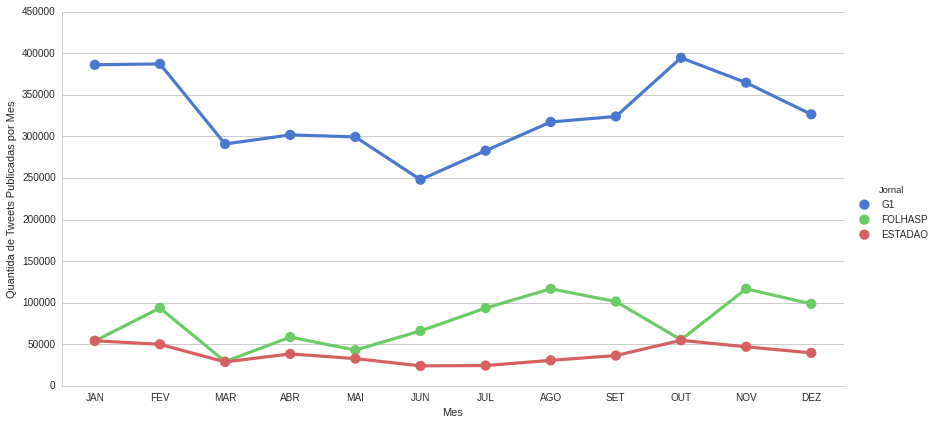

In [180]:
"""
Plota a manifestações de repercussões via Twitter por Jornal entre os meses do ano.

"""

grouped = volRepercussao.groupby(['Mes', 'Jornal'],  sort=True)
volRepQuantidTweets = grouped['Tweets'].agg({'Tweets' : np.sum}).reset_index()
volRepQuantidTweets['Mes'] = pd.Categorical(volRepQuantidTweets['Mes'], 
                                                ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", 
                                                  "JUL", "AGO","SET", "OUT", "NOV", "DEZ"])

sns.set(style="whitegrid")

g = sns.factorplot(x="Mes", y="Tweets", hue="Jornal", data=volRepQuantidTweets.sort(["Mes"]),
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantida de Tweets Publicadas por Mes")

In [ ]:
"""
Comentários:
............

1- Assim como a quantidade de notícias, o ESTADÃO E G1 apresentam comportamentos bastante semelhantes:
 - Decrescimento de Janeiro a Março.
 - Crescimento de Março a Abril.
 - Decrescimento de Abril a Junho.
 - Crescimento de Julho a Outubro.
 - Decrescimento de Outubro a Dezembro

2- O jornal FOLHA DE SÃO PAULO apresenta um comportamento relativamente diferente dos demais jornais, em epecial
ao intervalo que compreende AGOSTO-OUTUBRO onde há um decréscimo para a quantidade de notícias.
"""

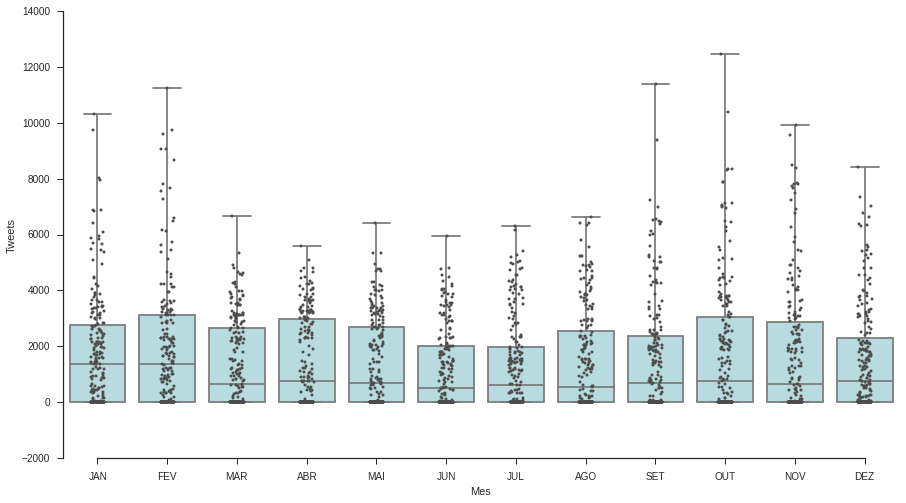

In [365]:
"""
Distruibuição da repercussão via Twitter entre os meses pelo jornal
G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Tweets", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Tweets", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

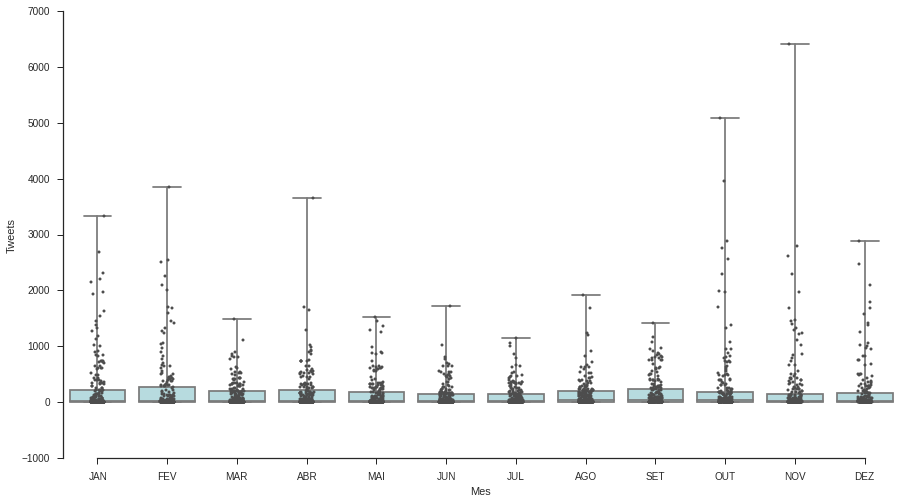

In [366]:
"""
Distruibuição da repercussão via Twitter entre os meses pelo jornal
ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Tweets", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Tweets", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

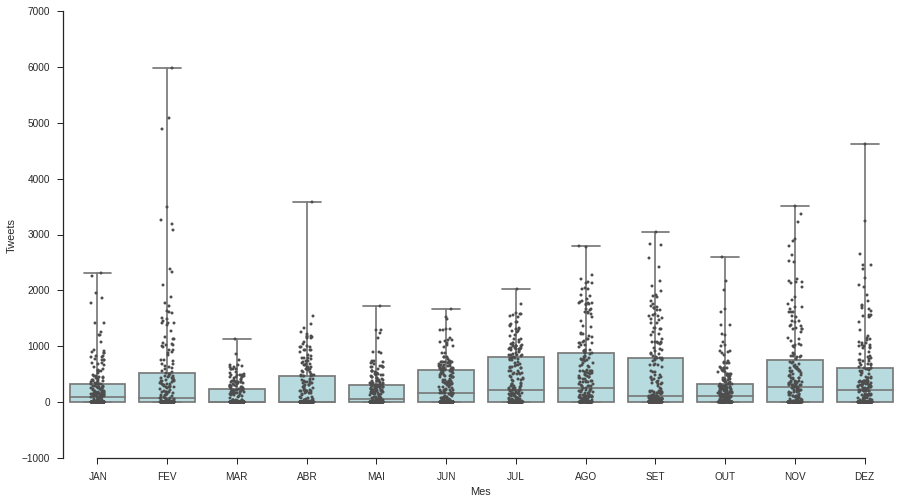

In [368]:
"""
Distruibuição da repercussão via Twitter entre os anos de 2009 e 2015 pelo jornal
Folha de Sao Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Tweets", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Tweets", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............
1 - O G1 apresenta o mes de Fevereiro como o de maior repercussão de notícias econômicas tendo ~1500 repercussões como índice
de tendência central.
2 - O ESTADÃO apresenta-se bastante volátil para essa mídia. O Índice de tendência central apesar de 0, os 3º quartil atinge
com frequência os ~500 twitters. Sendo responsáveis também por grandes outliers. Em outubro e novembro.
3 - A FOLHA DE SÃO PAULO possui maior mediana no mês de AGOSTO e um outlier expressivo no mês de FEVEREIRO.

"""

In [ ]:
"""
 2.2.3 - Analise de Tweets Dia a Dia

"""

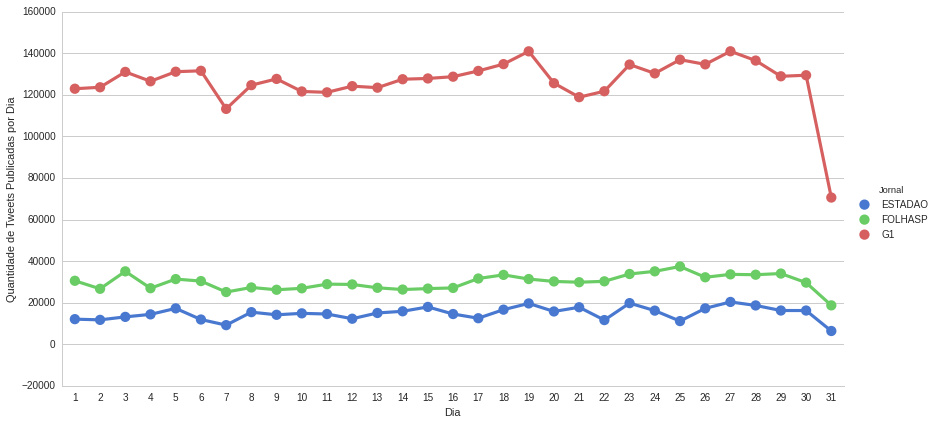

In [181]:
"""
Plota a manifestações de repercussões via Twitter por Jornal entre os dias do mes.

"""
grouped = volRepercussao.groupby(['Dia', 'Jornal'])
volRepQuantidComentarios = grouped['Tweets'].agg({'Tweets' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Dia", y="Tweets", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Tweets Publicadas por Dia")

In [ ]:
"""
Comentários:
............

1 - Entre os dias [5,7] há um decrescimento de repercussões via Twitter para todos os jornais.
2 - Para o G1 o dia 7 e o dia 19 são respectivamente o menos provável e o mais provável de haver repercussão via Twitter
para notícias econômicas.
3 - Em média cada dia do G1 ao longo do tempo recebeu 130.000 repercussões em notícias contra 3.000 do 
JORNAL FOLHA DE SÃO PAULO. 
4 - É 43X mais provável que uma notícia seja repercutida no Twitter via G1 durante algum dia do mês que nos outros jornais.
"""

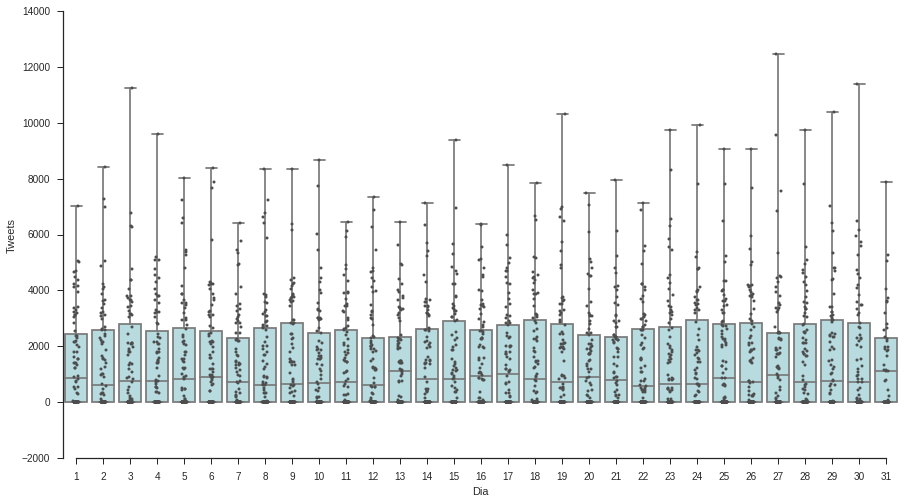

In [186]:
"""
Plota a distribuição de tweets ao longo dos dias do mes para o jornal G1

"""

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Tweets", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Tweets", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

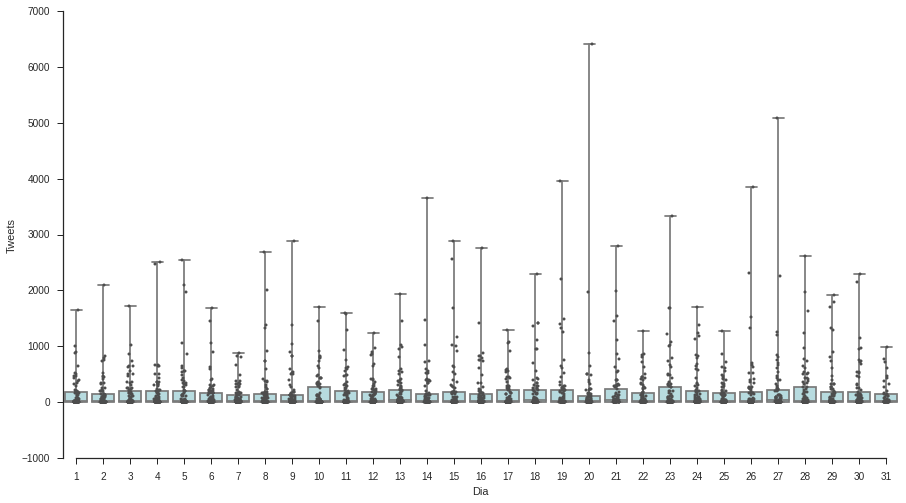

In [187]:
"""
Plota a distribuição de tweets ao longo dos dias do mes para o jornal ESTADÃO

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Tweets", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Tweets", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

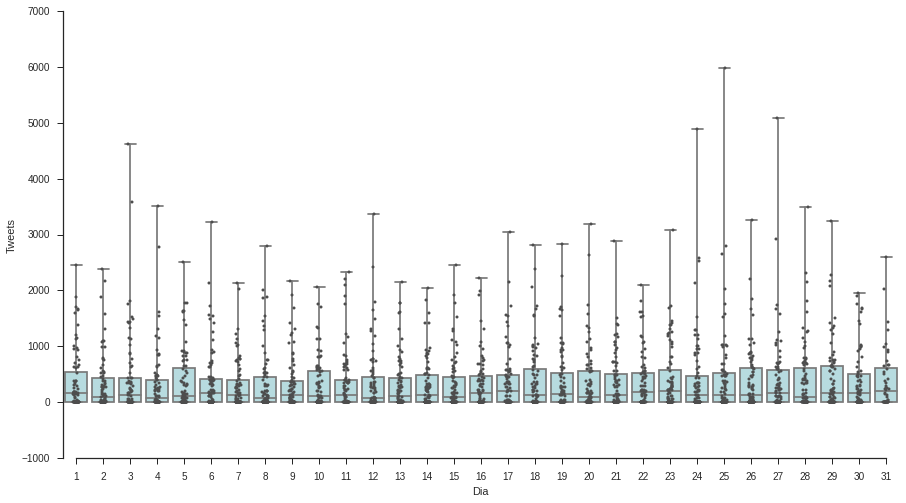

In [195]:
"""
Plota a distribuição de tweets ao longo dos dias do mes para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Tweets", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Tweets", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
 2.2.4 - Analise de Tweets por Dia da Semana

"""

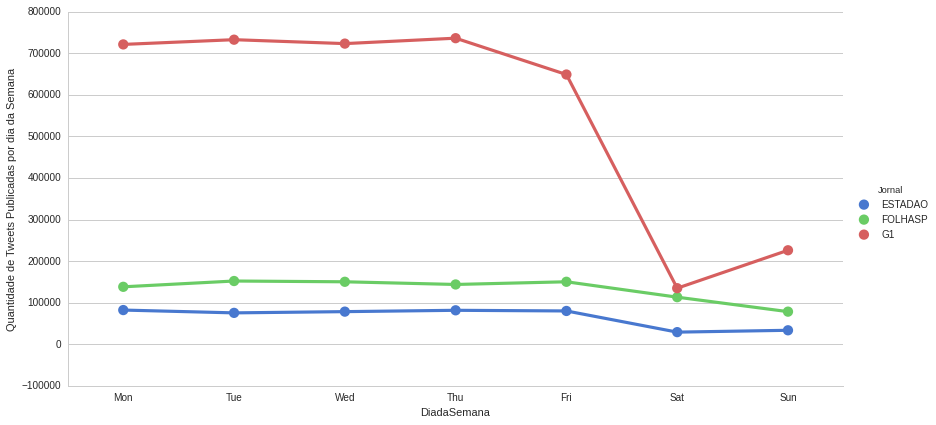

In [196]:
"""
Plota a quantidade de tweets por Jornal entre 2000 e 2015 pelo dia da Semana.

"""
grouped = volRepercussao.groupby(['DiadaSemana', 'Jornal'])
volRepQuantidComentarios = grouped['Tweets'].agg({'Tweets' : np.sum}).reset_index()
volRepQuantidComentarios['DiadaSemana'] = pd.Categorical(volRepQuantidComentarios['DiadaSemana'], 
                                                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])
sns.set(style="whitegrid")

g = sns.factorplot(x="DiadaSemana", y="Tweets", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Tweets Publicadas por dia da Semana")

In [ ]:
"""
Comentários:
............

1 - A quantidade de repercussão ao longo da semana é bastante uniforme.
2 - O G1 a partir da quinta-feira possui um declínio de repercussões via Twitter.
3 - Os demais jornais apresentam a partir da sexta-feira.

"""

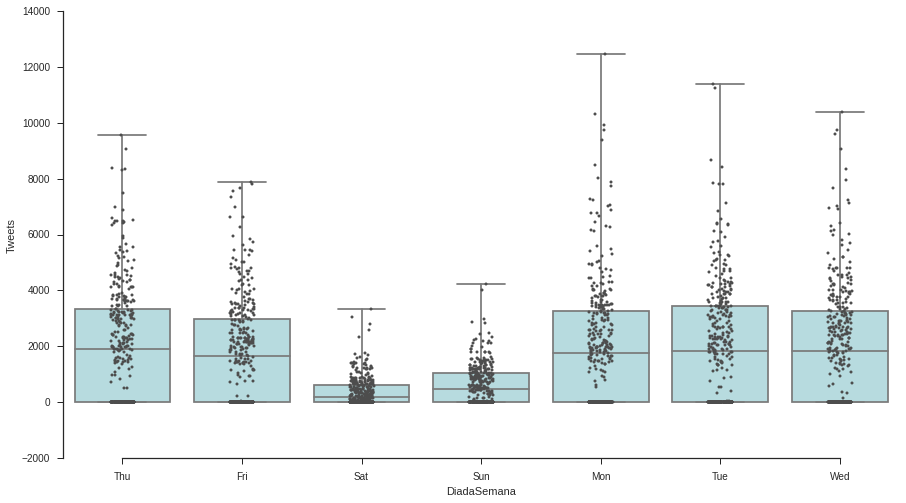

In [197]:
"""
Plota a distribuição de tweets ao longo dos dias da semana para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

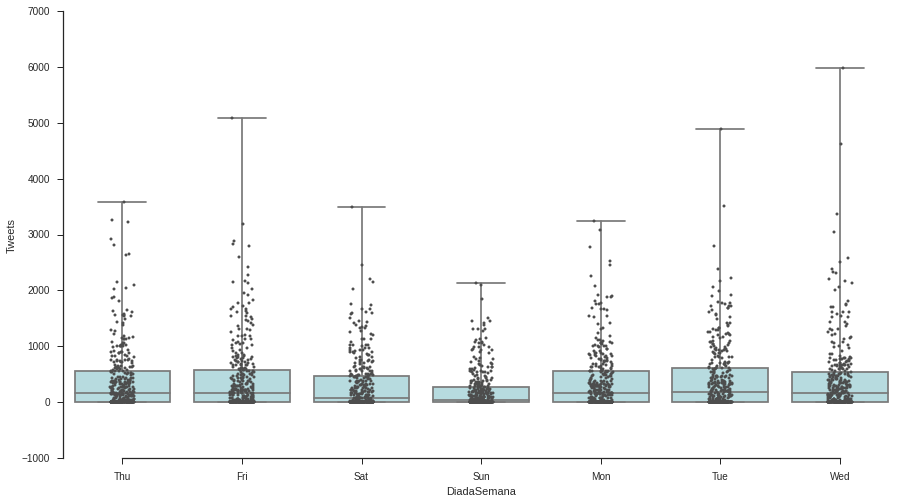

In [376]:
"""
Plota a distribuição de tweets ao longo dos dias da semana para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

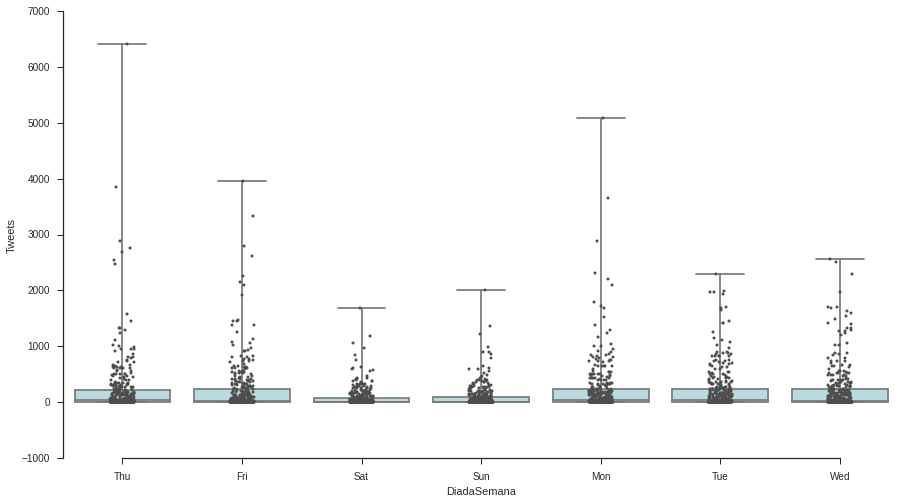

In [375]:
"""
Plota a distribuição de tweets ao longo dos dias da semana para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Tweets", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
#.....................................................
#
# 2.3 - Analise de Facebook
# 2.3.1 - Analise de Facebook Ano a Ano
#
#.....................................................
"""

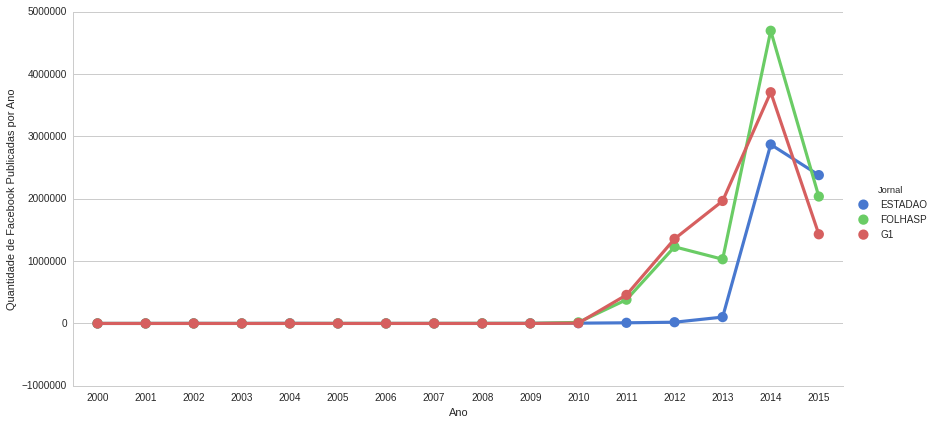

In [198]:
"""
Plota a manifestações de repercussões via Facebook por Jornal entre 2000 e 2015.

"""
grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volRepQuantidComentarios = grouped['Facebook'].agg({'Facebook' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="Facebook", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Facebook Publicadas por Ano")

In [ ]:
"""
Comentários:
............

1 - G1 apresenta uma tendência crescente de repercussão de notícias econômicas via Facebook.
2 - FOLHA DE SÃO PAULO saiu de 1.000.000 de repercussões via Facebook em 2013 para 5.000.000 em 2014.
3 - ESTADÃO apresenta apenas em 2013 alguma manifestação visível tendo amplo crescimento também em 2014.
"""

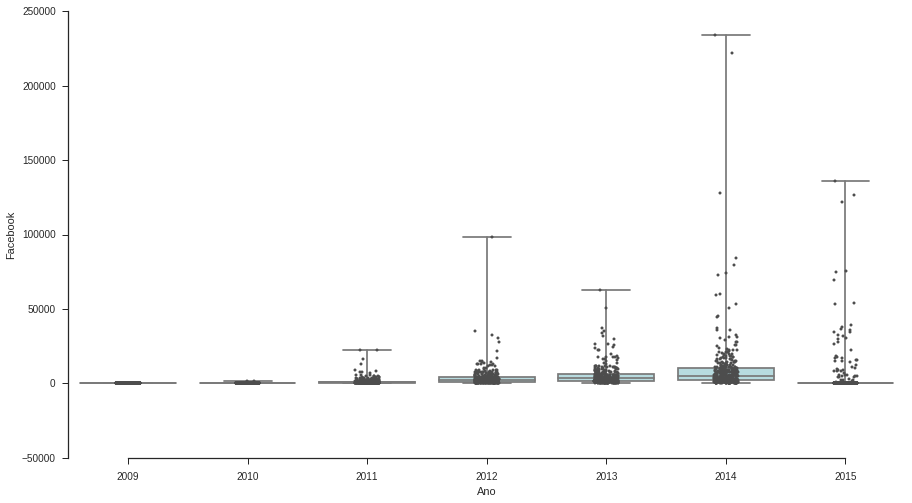

In [385]:
"""
Plota a distribuição de repercussões via Facebook entre os anos de 2009 e 2015
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Facebook", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Facebook", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

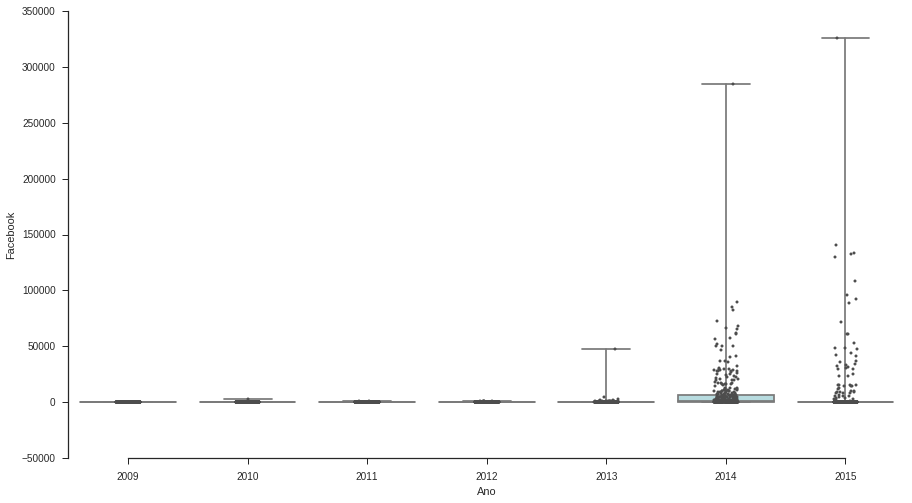

In [214]:
"""
Plota a distribuição de repercussões via Facebook entre os anos de 2009 e 2015
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Facebook", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Facebook", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

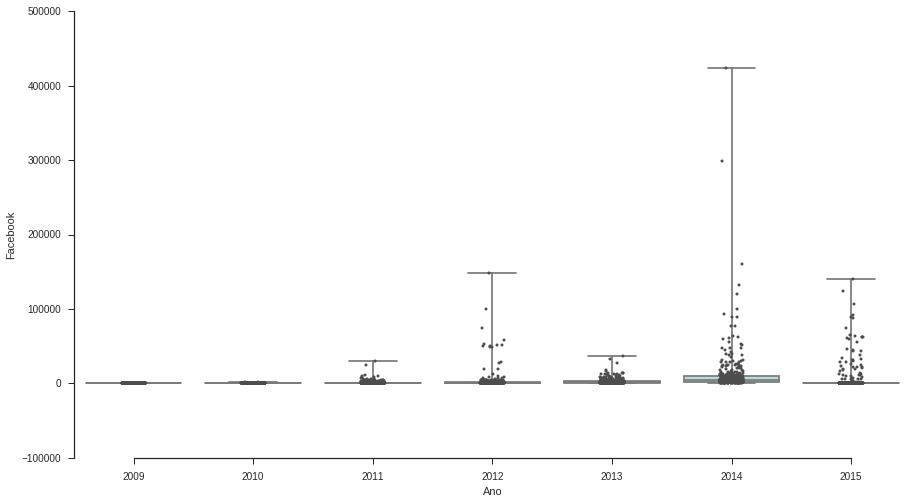

In [213]:
"""
Plota a distribuição de repercussões via Facebook entre os anos de 2009 e 2015
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="Facebook", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="Facebook", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - O G1 apresenta 2 outliers com mais de 250.000 repercussões.
2 - A FOLHA DE SÃO PAULO apresenta também em 2014 2 eventos com aproximadamente 500.000 de repercussões.
3 - O ESTADÃO em 2015 apresenta uma repercussão de quase 350.000 de repercussões.

"""

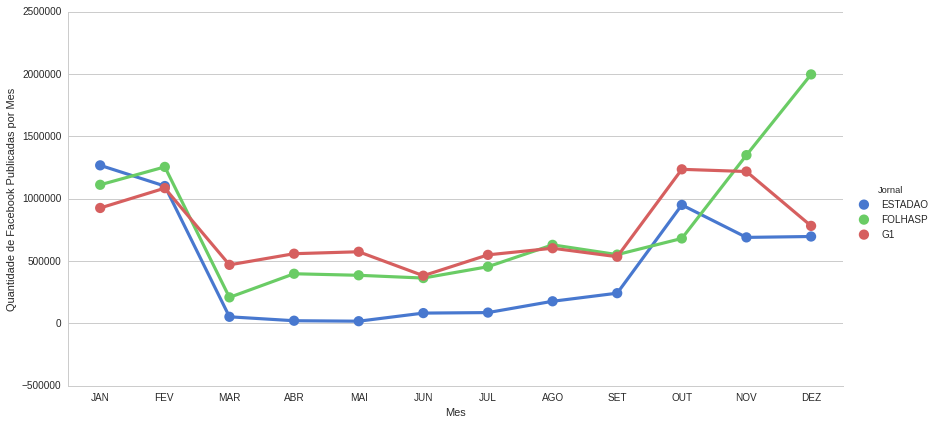

In [205]:
"""
#........................................
#
# 2.3.2 - Analise de Facebook Mes a Mes
#
#........................................
"""

grouped = volRepercussao.groupby(['Mes', 'Jornal'])
volRepQuantidFacebook = grouped['Facebook'].agg({'Facebook' : np.sum}).reset_index()
volRepQuantidFacebook['Mes'] = pd.Categorical(volRepQuantidFacebook['Mes'], 
                                                ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", 
                                                  "JUL", "AGO","SET", "OUT", "NOV", "DEZ"])
sns.set(style="whitegrid")

g = sns.factorplot(x="Mes", y="Facebook", hue="Jornal", data=volRepQuantidFacebook,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Facebook Publicadas por Mes")

In [ ]:
"""
Comentários:
............

1 - Tendência de crescimentoentre Junho e Outubro para todos os jornais.
2 - De Outubro a Dezembro há uma tendência decrescente para ESTADÃO E G1.
3 - Diferentes de G1 e ESTADÃO a FOLHA DE SÃO PAULO apresenta vertiginoso crescimento de repercussão de notícias econômicas
via Facebook no ultimo trimestre.

"""

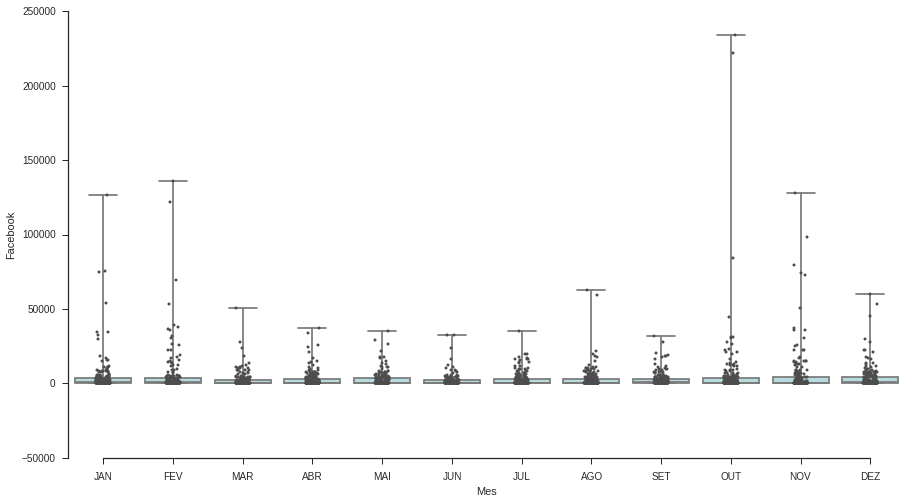

In [218]:
"""
Plota a distribuição de repercussões via Facebook entre meses
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Facebook", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Facebook", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

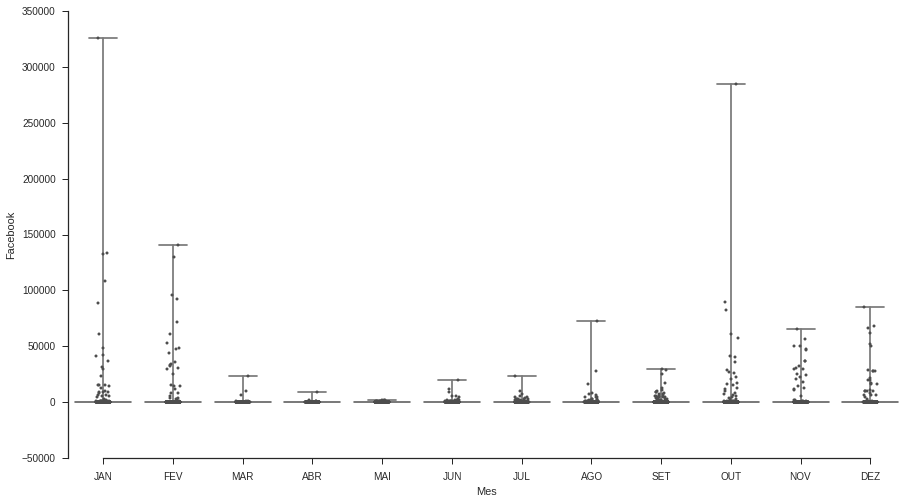

In [217]:
"""
Plota a distribuição de repercussões via Facebook entre meses
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Facebook", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Facebook", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

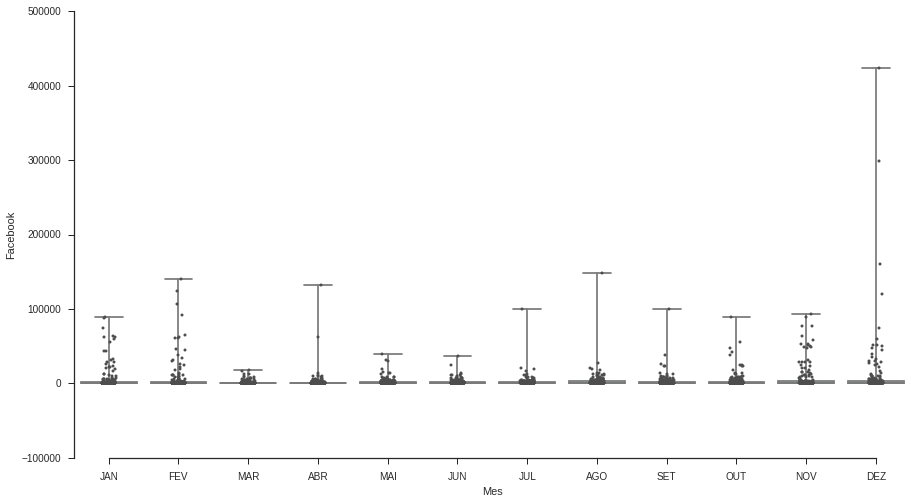

In [215]:
"""
Plota a distribuição de repercussões via Facebook entre os meses
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="Facebook", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="Facebook", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - Outliers aparecem em OUTUBRO para G1 e ESTADÃO com bastante força. É provavel de serem relacionados a notícias referentes
a eleições.

2 - O fenômeno contrário aparece sempre com a FOLHA DE SÃO PAULO como se houvesse um cuidado em ser tímida
ou não se expor durante esse mês sendo, segundo o gráfico, de manifestações mais modestas que os demais.
"""

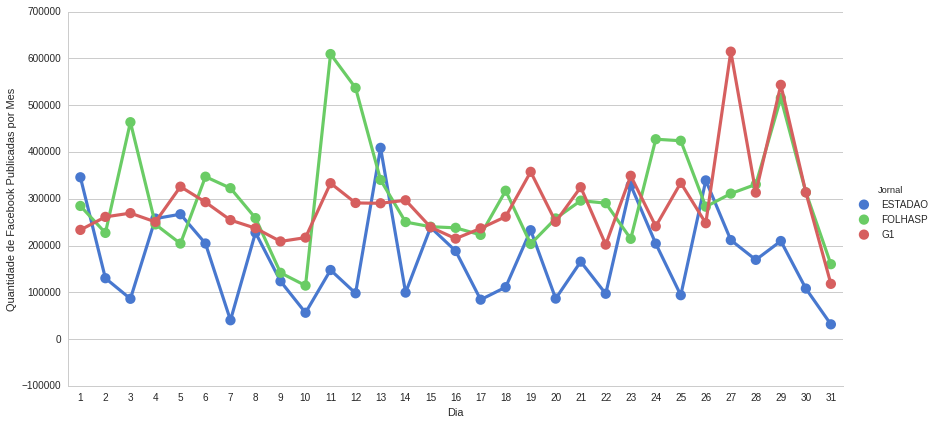

In [219]:
"""
#........................................
#
# 2.3.3 - Analise de Facebook Dia do Mes
#
#.......................................
"""

grouped = volRepercussao.groupby(['Dia', 'Jornal'])
volRepQuantidFacebook = grouped['Facebook'].agg({'Facebook' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Dia", y="Facebook", hue="Jornal", data=volRepQuantidFacebook,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Facebook Publicadas por Mes")

In [ ]:
"""
Comentários:
............

1 - Dia 11 é marcado por um notório crescimento de publicações para todos os jornais.
2 - Entre os dias 19 e 27 o ESTADÃO mantém com o G1 uma similaridade de eventos bastante peculiar.
3 - Todos os jornais decrescem em número de repercussão via Facebook a partir do dia 29.

"""

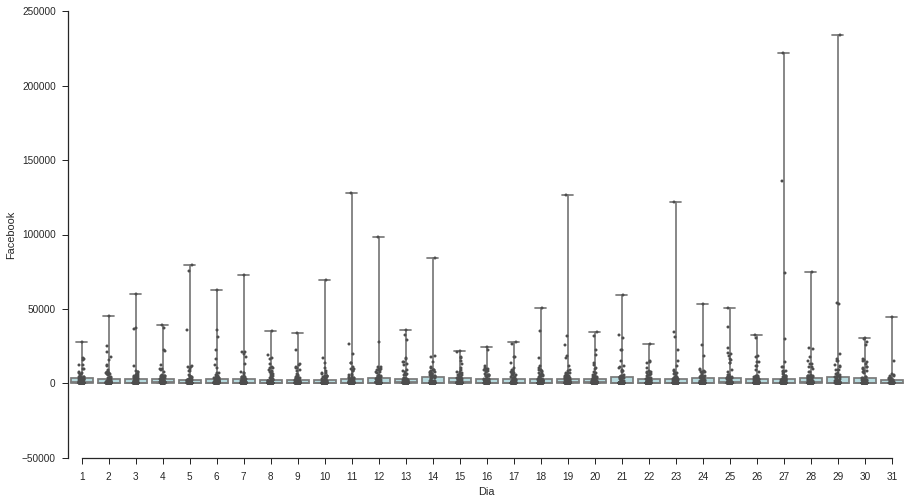

In [222]:
"""
Plota a distribuição de repercussões via Facebook entre os meses
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Facebook", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Facebook", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

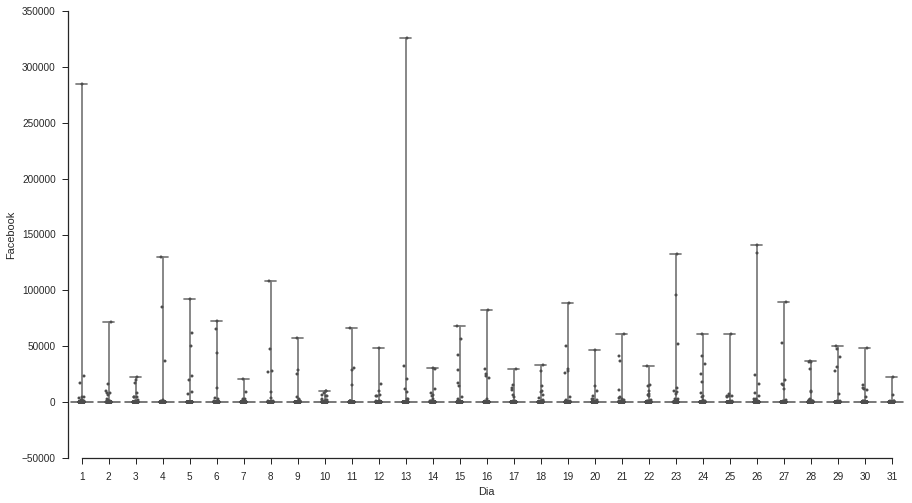

In [221]:
"""
Plota a distribuição de repercussões via Facebook entre os meses
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Facebook", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Facebook", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

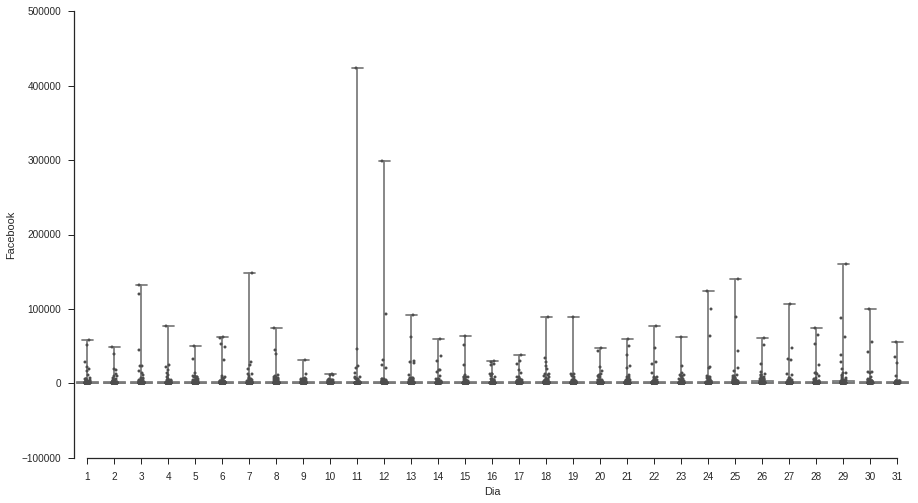

In [220]:
"""
Plota a distribuição de repercussões via Facebook entre os meses
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="Facebook", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="Facebook", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

OutLiers. Atenção aos Outliers.

"""

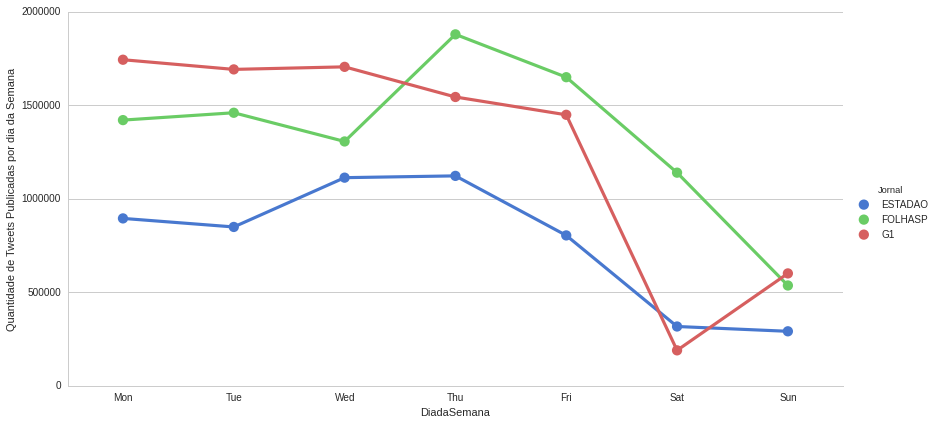

In [223]:
"""
#...............................................
#
# 2.3.4 - Analise de Facebook por Dia da Semana
#
#...............................................
"""

grouped = volRepercussao.groupby(['DiadaSemana', 'Jornal'])
volRepQuantidComentarios = grouped['Facebook'].agg({'Facebook' : np.sum}).reset_index()
volRepQuantidComentarios['DiadaSemana'] = pd.Categorical(volRepQuantidComentarios['DiadaSemana'], 
                                                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])
sns.set(style="whitegrid")

g = sns.factorplot(x="DiadaSemana", y="Facebook", hue="Jornal", data=volRepQuantidComentarios,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de Tweets Publicadas por dia da Semana")

In [ ]:
"""
Comentários:
............

1 - Há um decrescimo de repercussão a partir da quinta-feira.
2 - Para o G1 há mais repercussão de notícias econômicas via Facebook no domingo que no sábado.
3 - Há mais similaridade visual entre G1 e ESTADÃO que entre algum desses jornais e a FOLHA DE SÃO PAULO.

"""

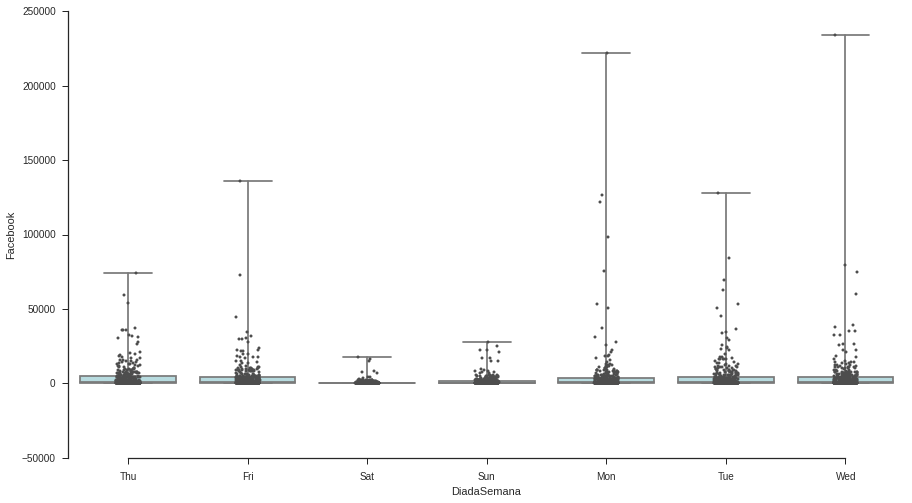

In [226]:
"""
Plota a distribuição de repercussões via Facebook entre os dias da semana
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

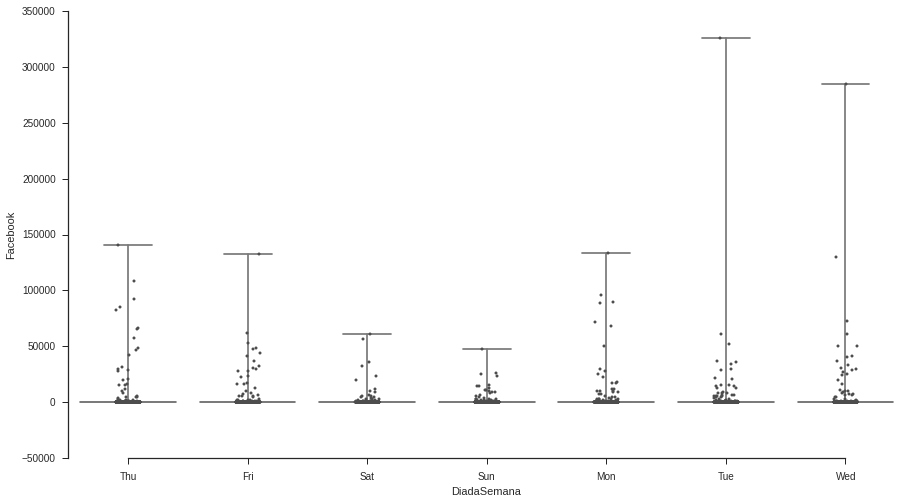

In [225]:
"""
Plota a distribuição de repercussões via Facebook entre os dias da semana
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

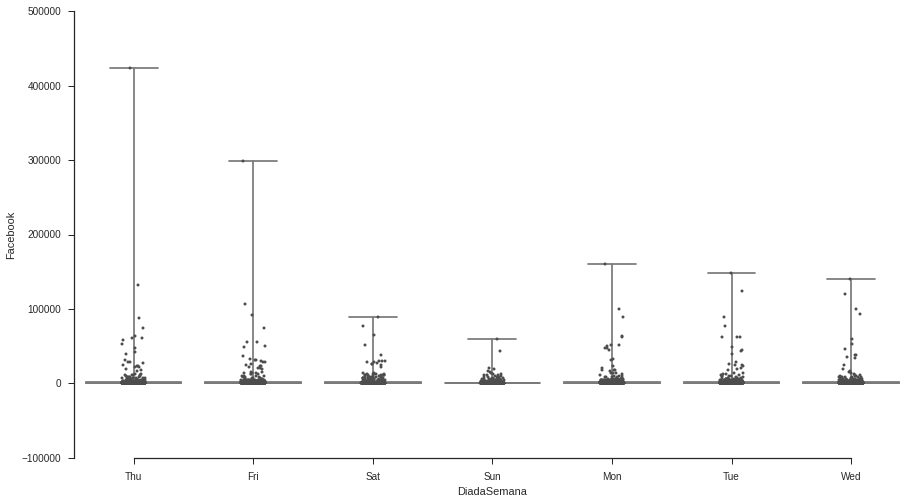

In [224]:
"""
Plota a distribuição de repercussões via Facebook entre os dias da semana
para o jornal Folha de São Paulo.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="Facebook", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
#.....................................................
#
# 2.4 - Analise de LinkedIn
# 2.4.1 - Analise de LinkedIn Ano a Ano
#
#.....................................................
"""

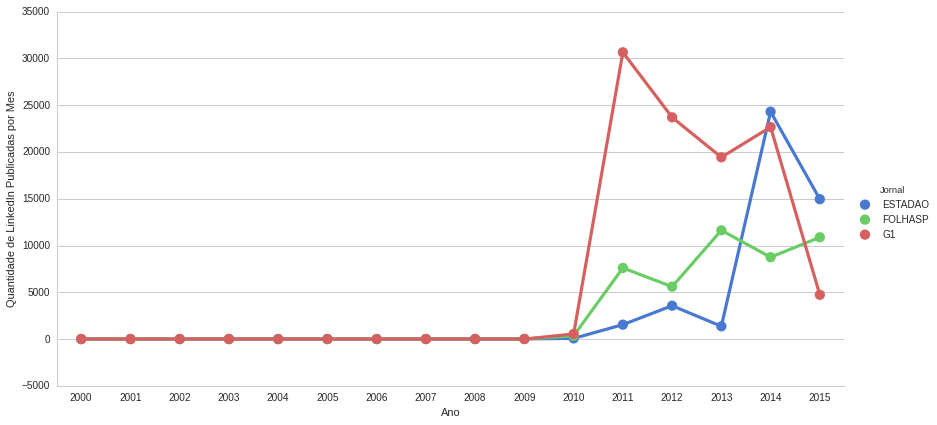

In [40]:
"""
Plota a manifestações de repercussões via LinkedIn por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volRepQuantidLinkedIn = grouped['LinkedIn'].agg({'LinkedIn' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="LinkedIn", hue="Jornal", data=volRepQuantidLinkedIn,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de LinkedIn Publicadas por Mes")

In [ ]:
"""
Comentários:
............

1 - Há uma tendência crescente de divulgação de notícias via LinkedIn por parte da FOLHA DE SÃO PAULO E ESTADÃO.
2 - O jornal FOLHA DE SÃO PAULO já repercutiu via LinkedIn até março de 2015 mais notícias que 2014 inteiro.
3 - O público de leitores do ESTADÃO prefere essa forma de repercutir notícias quanto comparada com os outros jornais.

"""


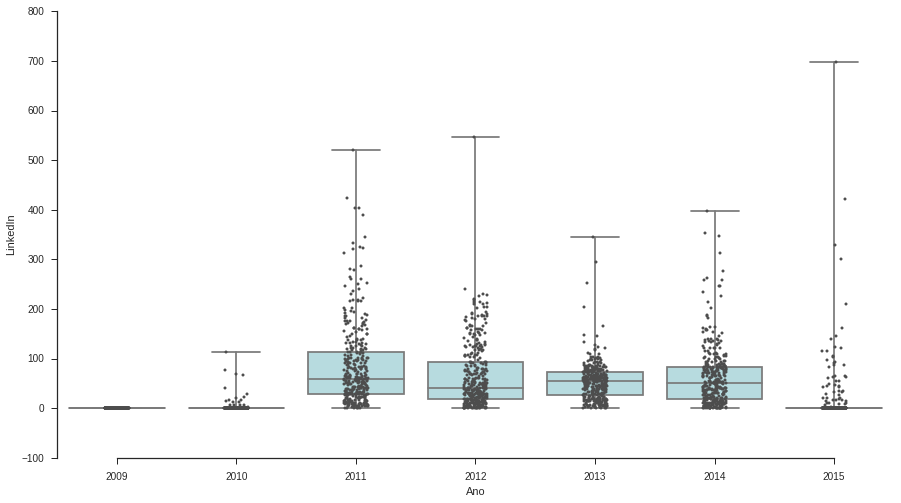

In [23]:
"""
Plota a distribuição de repercussões via LinkedIn entre os anos de 2009 e 2015
para o jornal G1.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_G1 = vol_2009_2015[vol_2009_2015.Jornal.isin(["G1"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="LinkedIn", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="LinkedIn", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

Em média as notícias econômicas do G1 recebem 50 repercussões via LinkedIn.

"""

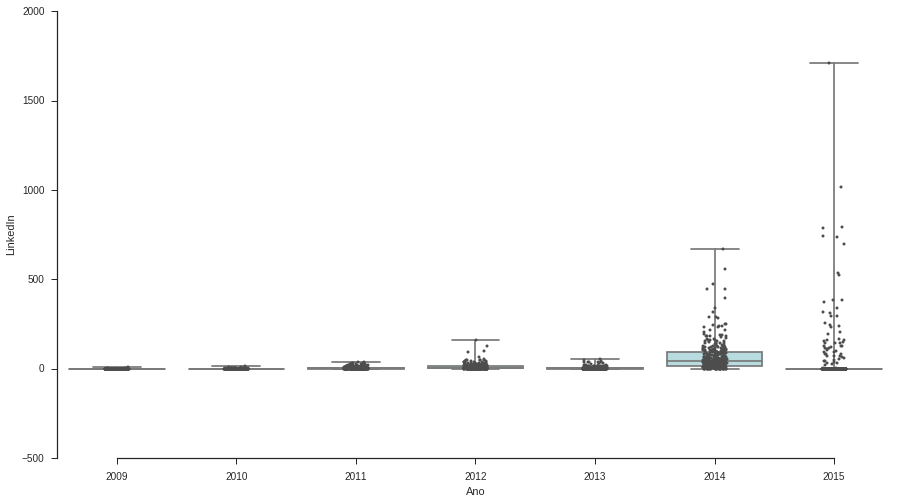

In [31]:
"""
Plota a distribuição de repercussões via LinkedIn entre os anos de 2009 e 2015
para o jornal ESTADÃO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_ESTADAO = vol_2009_2015[vol_2009_2015.Jornal.isin(["ESTADAO"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="LinkedIn", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="LinkedIn", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

Mediana 2014 em torno de 60 repercussões.

"""

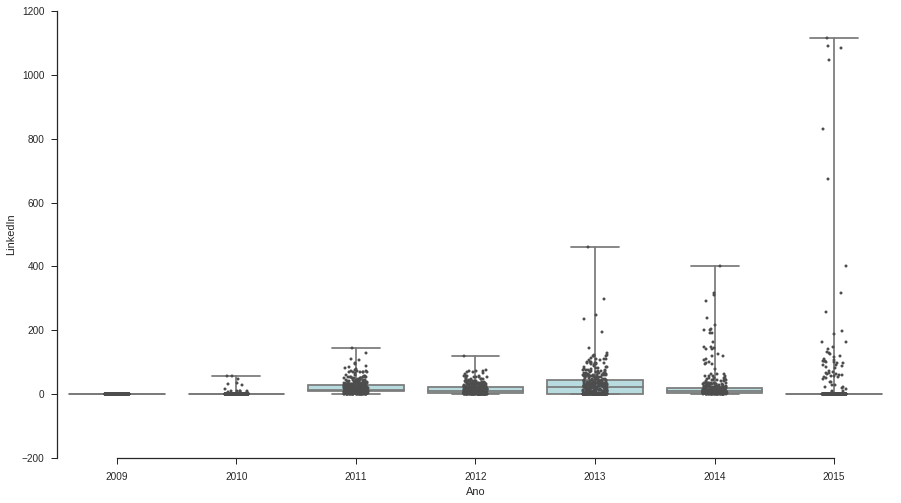

In [32]:
"""
Plota a distribuição de repercussões via LinkedIn entre os anos de 2009 e 2015
para o jornal FOLHA DE SÃO PAULO.

"""
vol_2009_2015 = volRepercussao[volRepercussao.Ano.isin(range(2009,2016))]
vol_2009_2015_FOLHASP = vol_2009_2015[vol_2009_2015.Jornal.isin(["FOLHASP"])]

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="LinkedIn", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="LinkedIn", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
...........

O ano de 2015 no geral apresenta uma forte tendência de utilização do LinkedIn para propagação de notícias econômicas
para todos os jornais. Grande parte dos outliers já é possível de ser observado nesse ano.

O público que mais utiliza essa mídia é G1 e ESTADAO com tendencia de crescimento constante da FOLHA DE SÃO PAULO.

"""

In [ ]:
"""
#.....................................................
#
# 2.4 - Analise de LinkedIn
# 2.4.2 - Analise de LinkedIn Mes a Mes
#
#.....................................................
"""

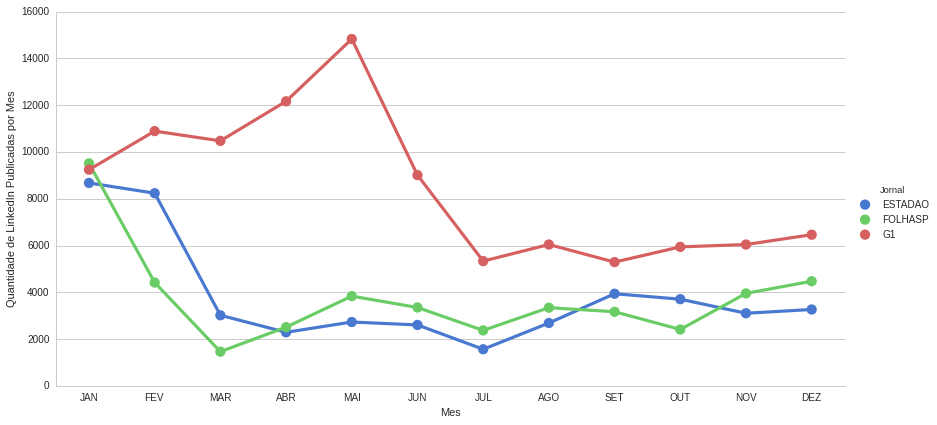

In [38]:
"""
Plota a manifestações de repercussões via LinkedIn por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['Mes', 'Jornal'])
volRepQuantidLinkedIn = grouped['LinkedIn'].agg({'LinkedIn' : np.sum}).reset_index()
volRepQuantidLinkedIn['Mes'] = pd.Categorical(volRepQuantidLinkedIn['Mes'], 
                                                ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", 
                                                  "JUL", "AGO","SET", "OUT", "NOV", "DEZ"])
sns.set(style="whitegrid")

g = sns.factorplot(x="Mes", y="LinkedIn", hue="Jornal", data=volRepQuantidLinkedIn,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de LinkedIn Publicadas por Mes")

In [ ]:
"""
Comentários:
............

1 - Maio é o mês de maior repercussão de notícias econômicas do G1 e de dos outros jornais.
2 - Janeiro é o mes onde essa atividade é mais frequente para FOLHASP E ESTADÃO.
3 - Há um forte decrescimento entre MAIO e JULHO para todos os jornais. 
4 - O G1 apresentou a maior utilização da mídia enquanto FOLHASP e ESTADAO tiveram utilização bastante semelhante.

"""

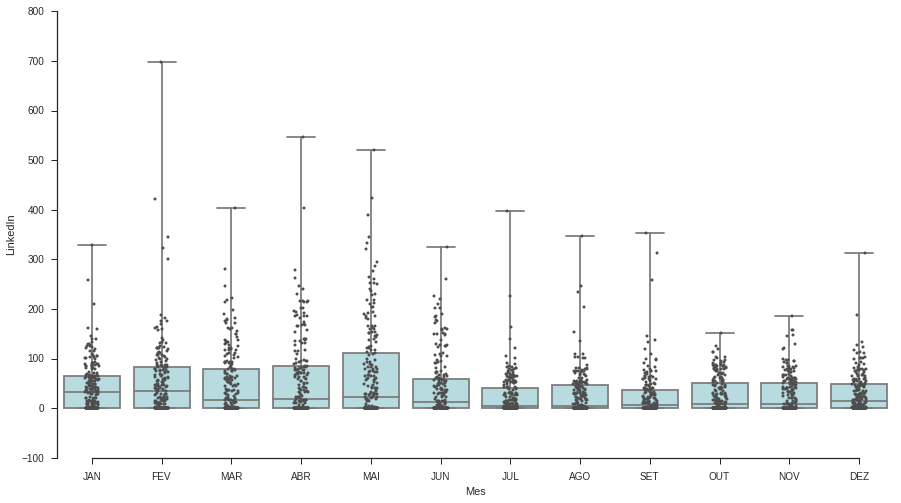

In [63]:
"""
Plota a distribuição de repercussões via LinkedIn entre os meses
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="LinkedIn", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="LinkedIn", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

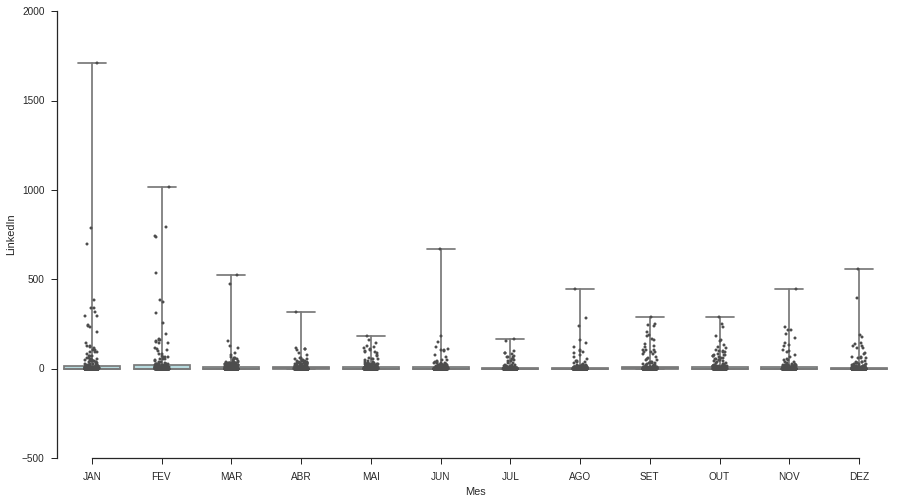

In [65]:
"""
Plota a distribuição de repercussões via LinkedIn entre os meses
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="LinkedIn", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="LinkedIn", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

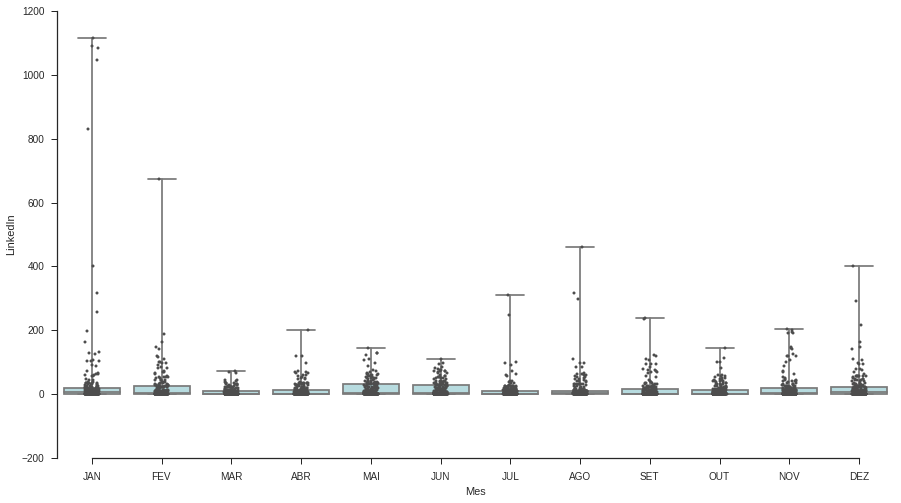

In [66]:
"""
Plota a distribuição de repercussões via LinkedIn entre os meses
para o jornal FOLHASP.

"""

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="LinkedIn", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="LinkedIn", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - O G1 possui o público que mais repercute noticias utilizando o LinkedIn.
2 - O ESTADÃO alcançou a maior repercussão utilizando o LinkedIn.
3 - O mês de MAIO é onde ocorre o maior número de repercussões via LinkedIn.

"""

In [ ]:
"""
#.....................................................
#
# 2.4 - Analise de LinkedIn
# 2.4.3 - Analise de LinkedIn Dia a Dia
#
#.....................................................
"""

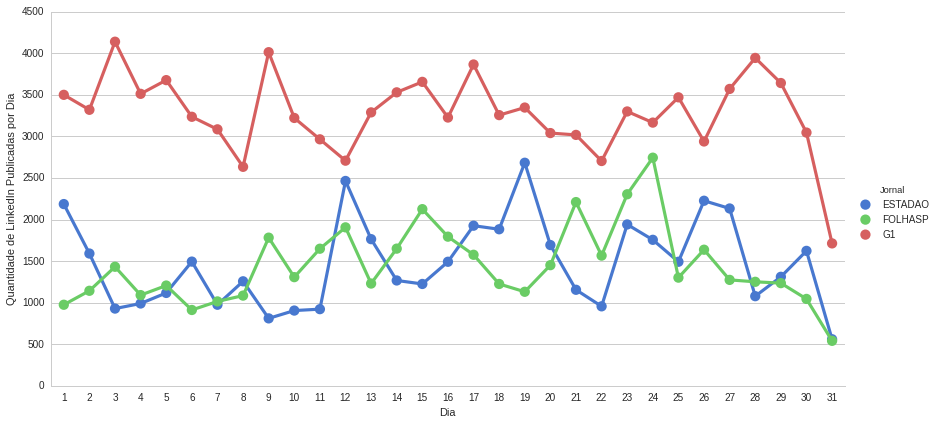

In [36]:
"""
Plota a manifestações de repercussões via LinkedIn por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['Dia', 'Jornal'])
volRepQuantidLinkedIn = grouped['LinkedIn'].agg({'LinkedIn' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Dia", y="LinkedIn", hue="Jornal", data=volRepQuantidLinkedIn,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de LinkedIn Publicadas por Dia")

In [ ]:
"""
Comentários:
............

Bastante irregularidade para os dias.

"""

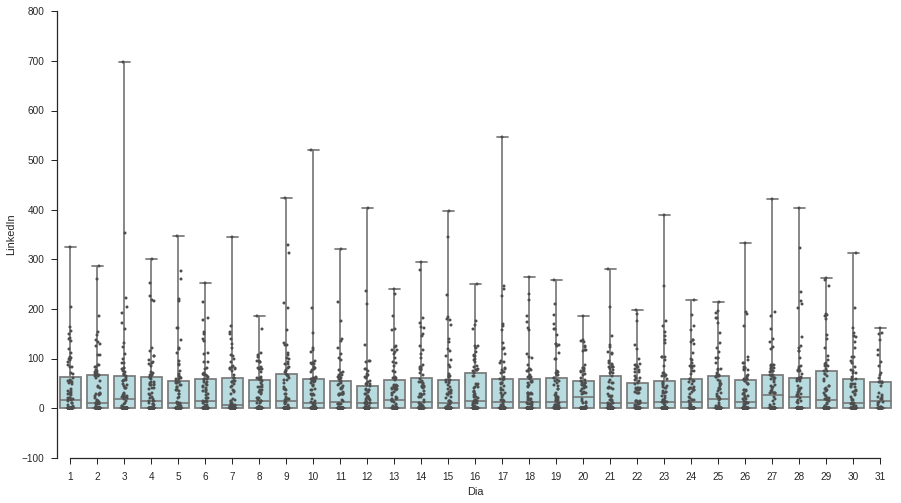

In [67]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias meses
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="LinkedIn", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="LinkedIn", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

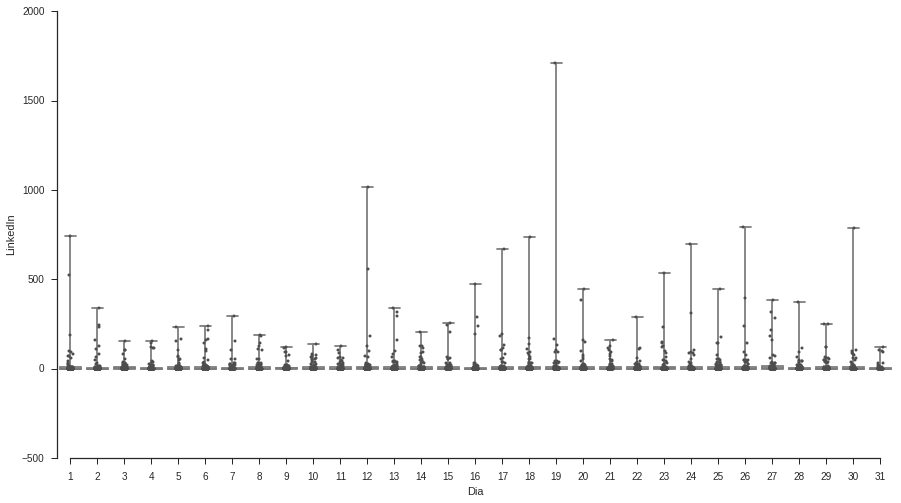

In [68]:
"""
Plota a distribuição de repercussões via LinkedIn entre os meses
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="LinkedIn", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="LinkedIn", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

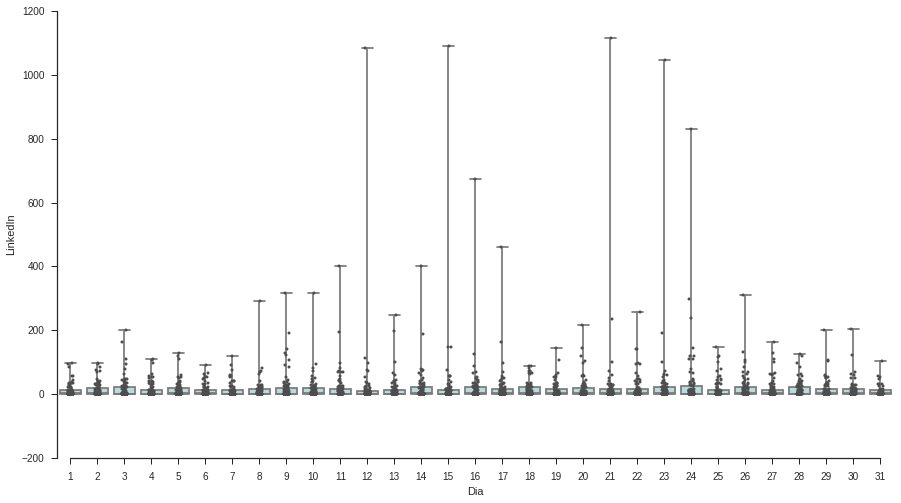

In [69]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias do mes
para o jornal FOLHASP.

"""

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="LinkedIn", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="LinkedIn", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............

1 - G1 dia 27 é o mais provável de haver maior repercussão via LinkedIn.
2 - Outliers ocorrem em dias diversos.
3 - FOLHA DE SÃO PAULO dia 24 o mais provável de haver maior repercussão via LinkedIn.
4 - Os maiores outliers ocorrem no jornal ESTADAO.

"""

In [ ]:
"""
#.....................................................
#
# 2.4 - Analise de LinkedIn
# 2.4.4 - Analise de LinkedIn Dia da Semana
#
#.....................................................
"""

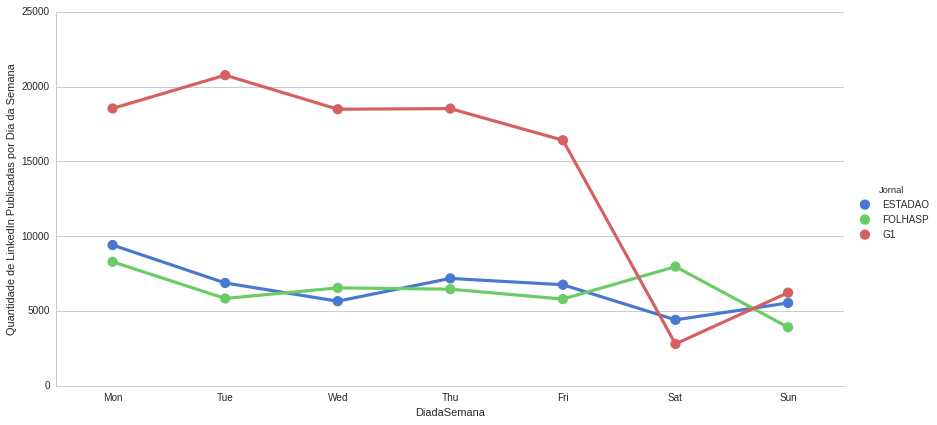

In [39]:
"""
Plota a manifestações de repercussões via LinkedIn por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['DiadaSemana', 'Jornal'])
volRepQuantidLinkedIn = grouped['LinkedIn'].agg({'LinkedIn' : np.sum}).reset_index()
volRepQuantidLinkedIn['DiadaSemana'] = pd.Categorical(volRepQuantidLinkedIn['DiadaSemana'], 
                                                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])
sns.set(style="whitegrid")

g = sns.factorplot(x="DiadaSemana", y="LinkedIn", hue="Jornal", data=volRepQuantidLinkedIn,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de LinkedIn Publicadas por Dia da Semana")

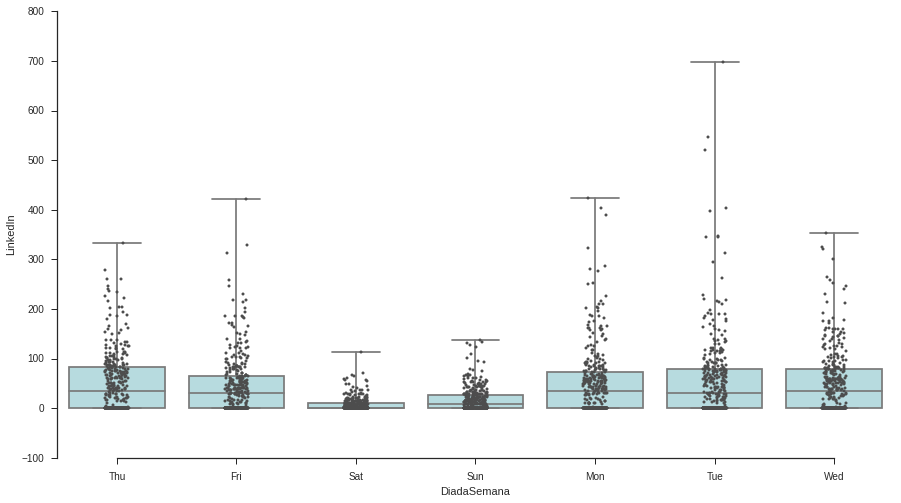

In [72]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias da semana
para o jornal G1.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="LinkedIn", data=vol_2009_2015_G1,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="LinkedIn", data=vol_2009_2015_G1,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

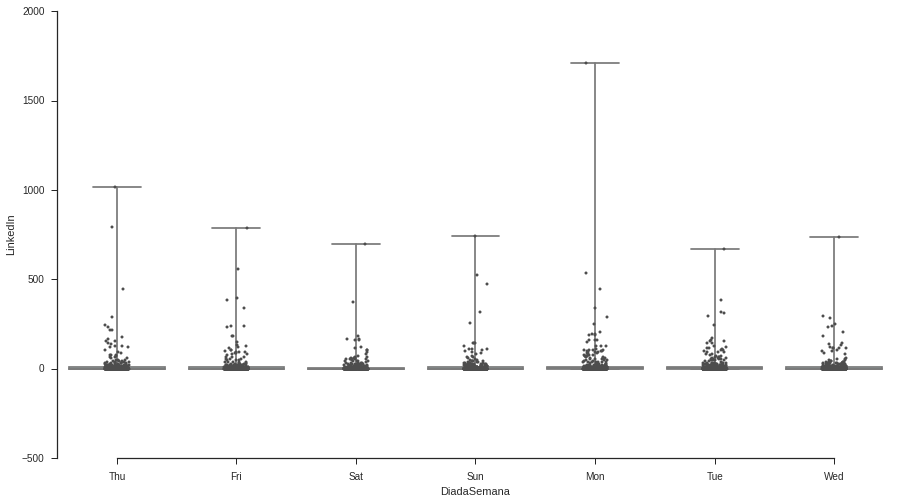

In [71]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias da semana
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="LinkedIn", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="LinkedIn", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

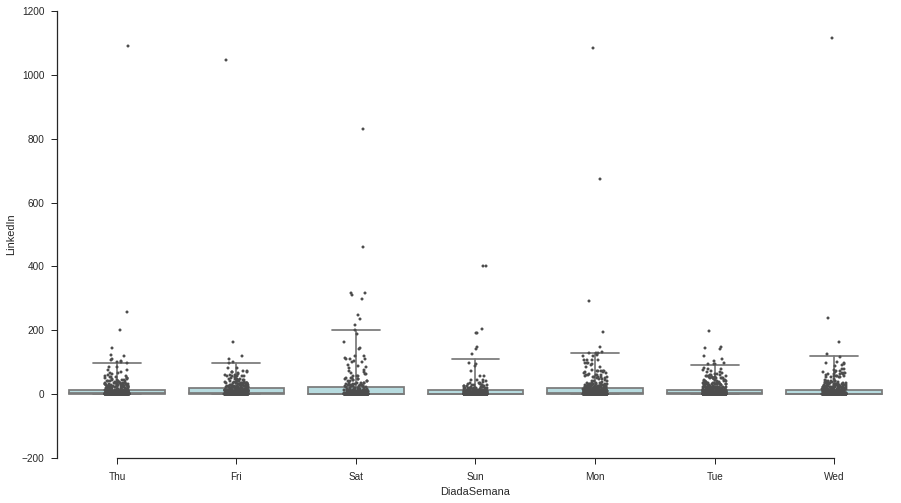

In [70]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias da semana
para o jornal FOLHASP.

"""

sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="LinkedIn", data=vol_2009_2015_FOLHASP,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="LinkedIn", data=vol_2009_2015_FOLHASP,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
...........
1 - A repercussão de notícias econômicas via LinkedIn para os leitores da FOLHA DE SÃO PAULO é mais intensa aos SÁBADOS.
2 - Para G1 e ESTADÃO há uma diminuição das atividades a partir da quinta-feira.
3 - A segunda-feira é um dia de provavel outlier.

"""

In [ ]:
"""
#.....................................................
#
# 2.5 - Analise de Google Plus
# 2.5.1 - Analise do Google Plus Ano a Ano
#
#.....................................................
"""

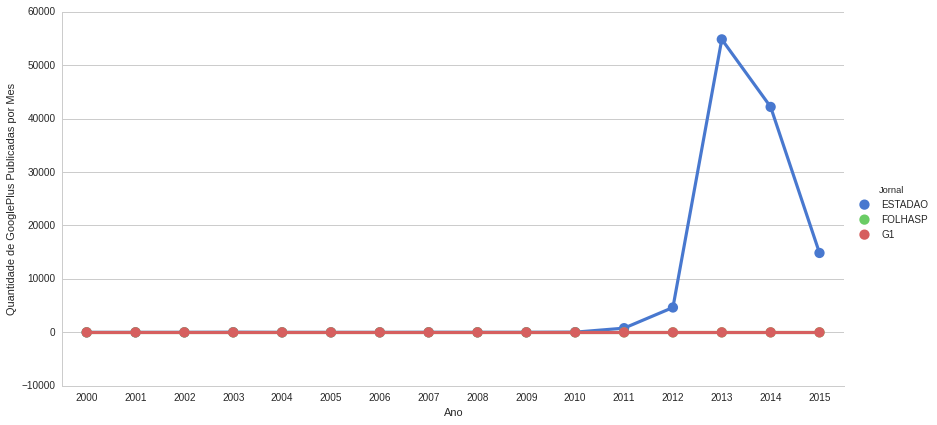

In [42]:
"""
Plota a manifestações de repercussões via GooglePlus por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volRepQuantidGooglePlus = grouped['GooglePlus'].agg({'GooglePlus' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="GooglePlus", hue="Jornal", data=volRepQuantidGooglePlus,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de GooglePlus Publicadas por Mes")

In [33]:
"""
Comentários:
............

Apenas o ESTADÃO apresenta repercussão de notícias econômicas via GooglePlus.

"""

'\n\n'

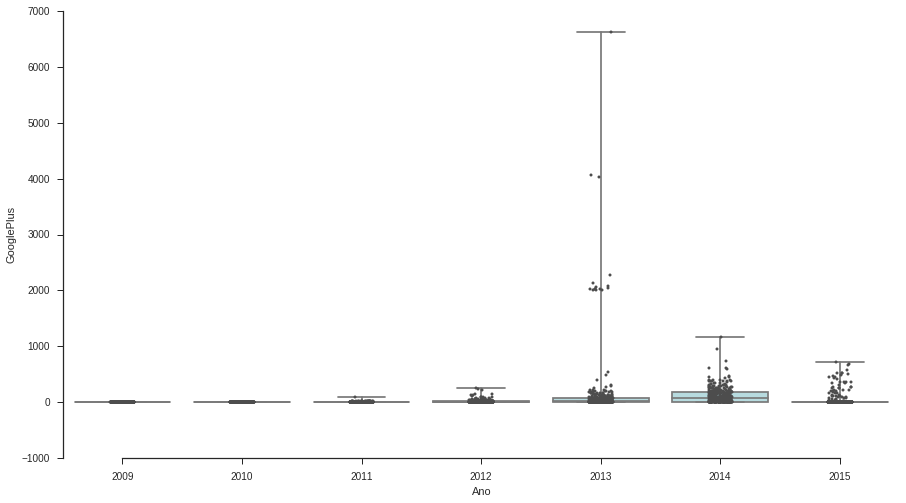

In [73]:
"""
Plota a distribuição de repercussões via GooglePlus entre os anos 2009 e 2015
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Ano", y="GooglePlus", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Ano", y="GooglePlus", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
#.....................................................
#
# 2.5 - Analise de Google Plus
# 2.5.1 - Analise do Google Plus Mes a Mes
#
#.....................................................
"""

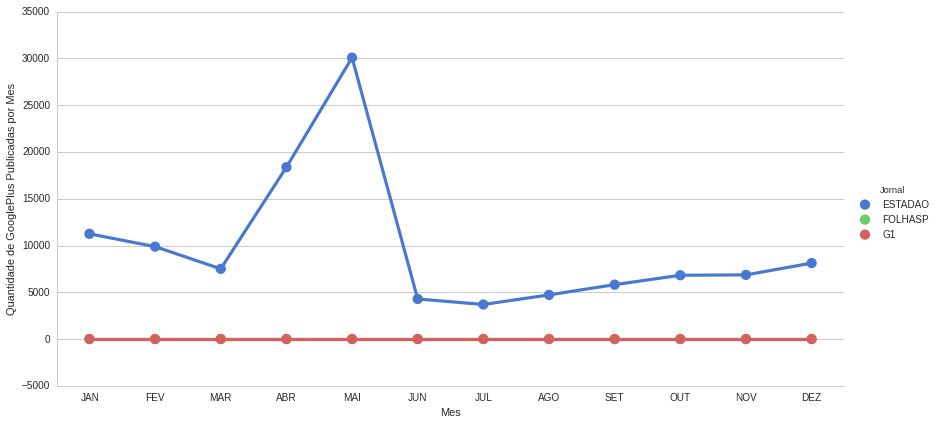

In [48]:
"""
Plota a manifestações de repercussões via GooglePlus por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['Mes', 'Jornal'])
volRepQuantidGooglePlus = grouped['GooglePlus'].agg({'GooglePlus' : np.sum}).reset_index()
volRepQuantidGooglePlus['Mes'] = pd.Categorical(volRepQuantidGooglePlus['Mes'], 
                                                ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", 
                                                  "JUL", "AGO","SET", "OUT", "NOV", "DEZ"])
sns.set(style="whitegrid")

g = sns.factorplot(x="Mes", y="GooglePlus", hue="Jornal", data=volRepQuantidGooglePlus,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de GooglePlus Publicadas por Mes")

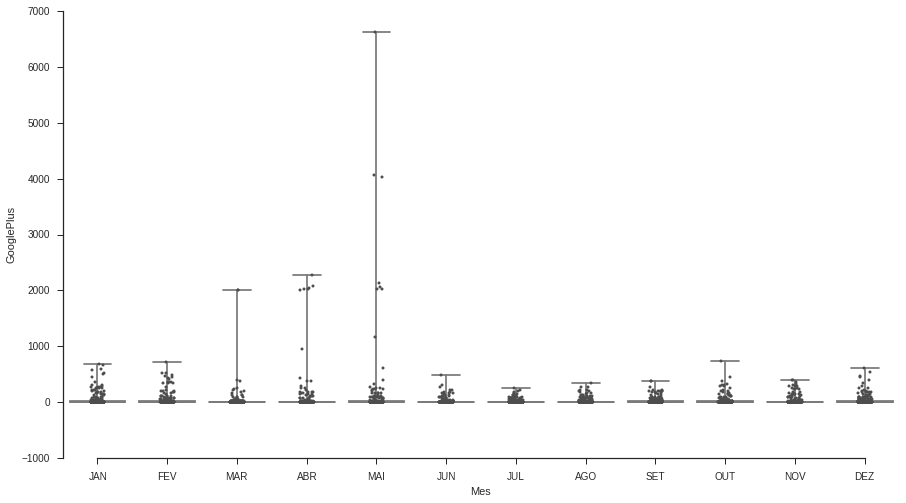

In [74]:
"""
Plota a distribuição de repercussões via LinkedIn entre os dias da semana
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Mes", y="GooglePlus", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Mes", y="GooglePlus", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
#.....................................................
#
# 2.5 - Analise de Google Plus
# 2.5.1 - Analise do Google Plus Dia a Dia
#
#.....................................................
"""

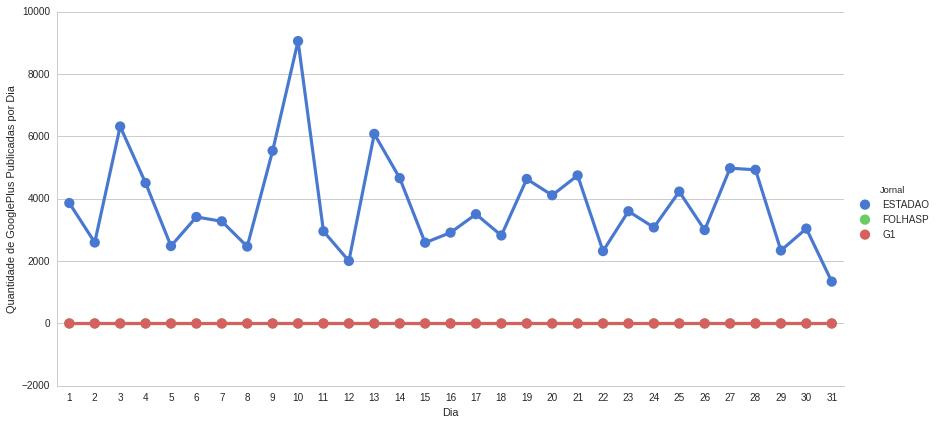

In [49]:
"""
Plota a manifestações de repercussões via GooglePlus por Jornal entre meses do ano.

"""

grouped = volRepercussao.groupby(['Dia', 'Jornal'])
volRepQuantidGooglePlus = grouped['GooglePlus'].agg({'GooglePlus' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Dia", y="GooglePlus", hue="Jornal", data=volRepQuantidGooglePlus,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de GooglePlus Publicadas por Dia")

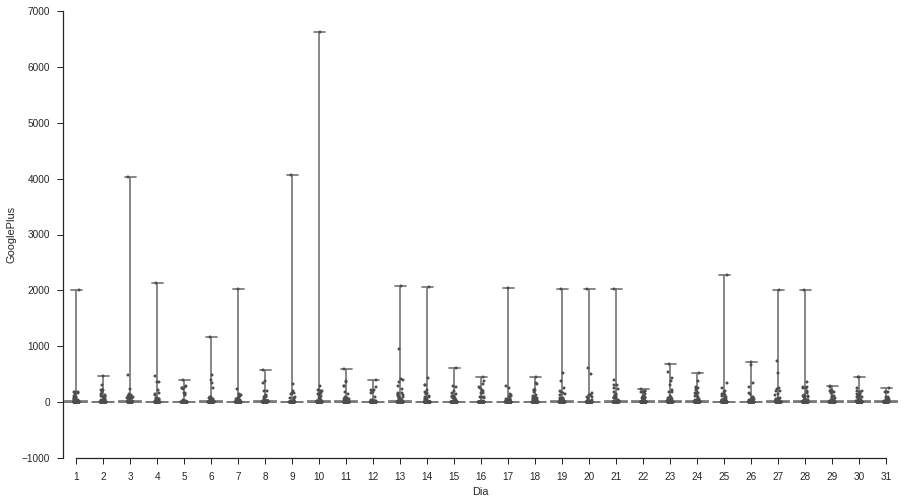

In [75]:
"""
Plota a distribuição de repercussões via GooglePlus entre os dias do mes
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="Dia", y="GooglePlus", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Dia", y="GooglePlus", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
#.....................................................
#
# 2.5 - Analise de Google Plus
# 2.5.1 - Analise do Google Plus Dia de Semana
#
#.....................................................
"""

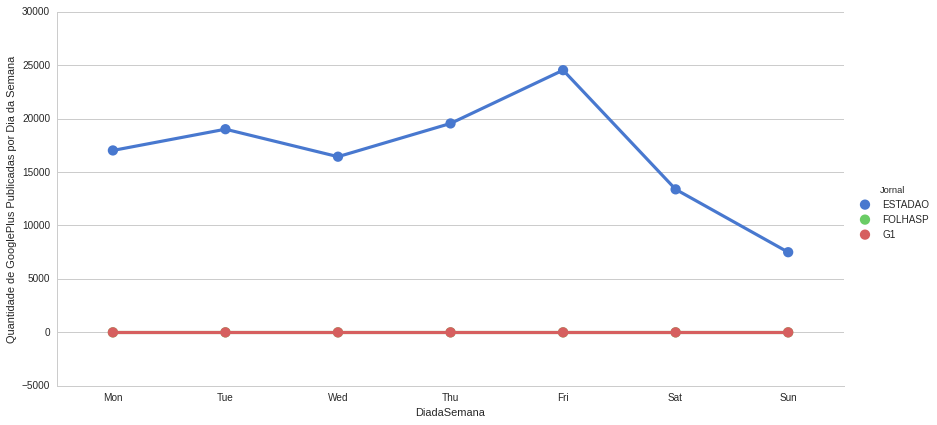

In [45]:
"""
Plota a manifestações de repercussões via LinkedIn por Jornal entre 2000 e 2015.

"""

grouped = volRepercussao.groupby(['DiadaSemana', 'Jornal'])
volRepQuantidGooglePlus = grouped['GooglePlus'].agg({'GooglePlus' : np.sum}).reset_index()
volRepQuantidGooglePlus['DiadaSemana'] = pd.Categorical(volRepQuantidGooglePlus['DiadaSemana'], 
                                                ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"])
sns.set(style="whitegrid")

g = sns.factorplot(x="DiadaSemana", y="GooglePlus", hue="Jornal", data=volRepQuantidGooglePlus,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantidade de GooglePlus Publicadas por Dia da Semana")

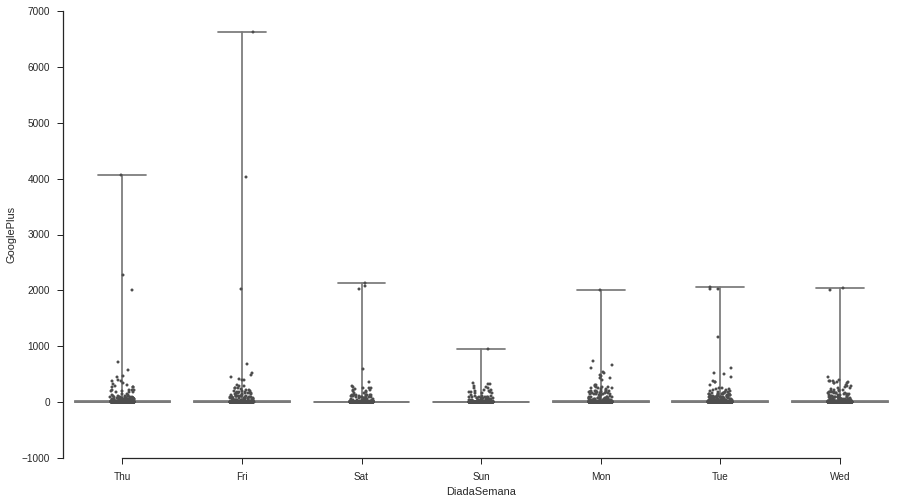

In [76]:
"""
Plota a distribuição de repercussões via GooglePlus entre os dias da semana
para o jornal ESTADAO.

"""
sns.set(rc={"figure.figsize": (15, 8)},style="ticks", palette="pastel", color_codes=True)
ax = sns.boxplot(x="DiadaSemana", y="GooglePlus", data=vol_2009_2015_ESTADAO,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="DiadaSemana", y="GooglePlus", data=vol_2009_2015_ESTADAO,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

In [ ]:
"""
Comentários:
............



"""

In [ ]:
"""
                                            #..............................
                                            #
                                            # 3 - REPERCUSSÃO X NOTICIAS
                                            #
                                            #..............................
"""

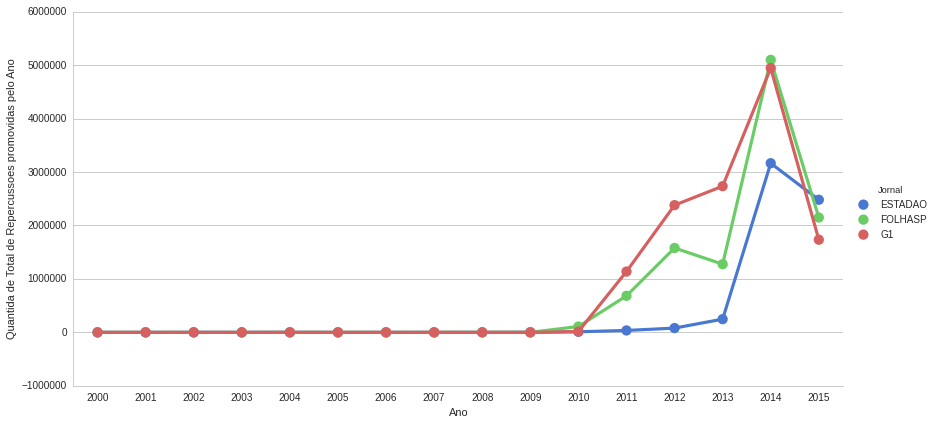

In [95]:
"""
Plota a manifestações de repercussões via TotalRepercussao por Jornal entre 2000 e 2015.

"""
volRepercussao = pd.read_csv(path+'/PhD/src/scriptPython/volumeRepercussoes.csv')

grouped = volRepercussao.groupby(['Ano', 'Jornal'])
volTotalRepercusaoAno = grouped['TotalRepercussao'].agg({'TotalRepercussao' : np.sum}).reset_index()

sns.set(style="whitegrid")

g = sns.factorplot(x="Ano", y="TotalRepercussao", hue="Jornal", data=volTotalRepercusaoAno,ci=None,
                    size=6, kind="point", palette="muted",  aspect=2)

# Informação que definirá o eixo Y.
g.set_ylabels("Quantida de Total de Repercussoes promovidas pelo Ano")

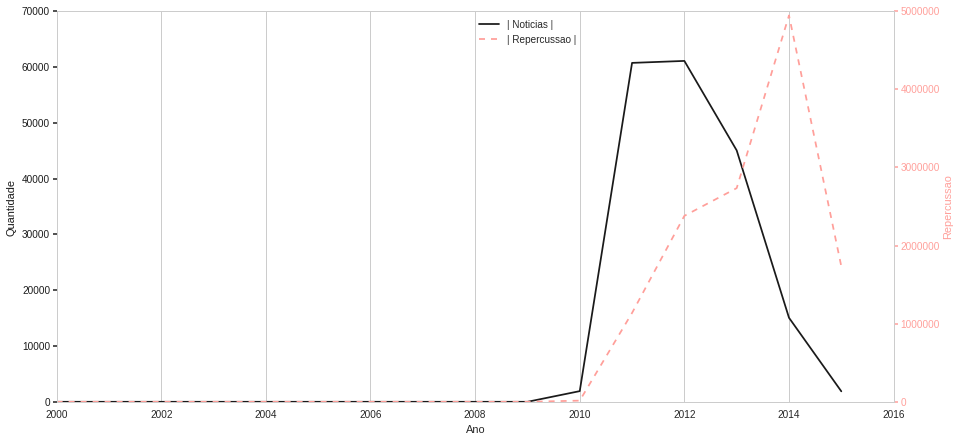

In [62]:
"""
Plota a quantidade de notícias pela quantidade de repercussões.

"""


volRepercussao = pd.read_csv(path+'/PhD/src/scriptPython/volumeNoticiasRepercussaoAno.csv', 
                             index_col="Ano")

volRepercussao_G1 = volRepercussao[volRepercussao.Jornal.isin(["G1"])]
volRepercussao_G1 = volRepercussao_G1[["Quantidade","TotalRepercussao"]]

#a = volRepercussao_G1.plot()
#Obtenho duas informações:
# - fig: a figura que será apresentada.
# - host: manipula os eixos é o x,y convencional.
fig,host = plt.subplots()

# Novo eixo Y do lado direito.
novoEiroY = host.twinx()

# Tamanho da Figura
fig.set_size_inches(15, 7, forward=True)

p1, = host.plot(volRepercussao_G1.index, volRepercussao_G1.Quantidade, "k-", label="| Noticias |")
p2, = novoEiroY.plot(volRepercussao_G1.index, volRepercussao_G1.TotalRepercussao, "r--", label="| Repercussao |")

# Estabelece os nomes dos eixos.
host.set_xlabel("Ano")
host.set_ylabel("Quantidade")
novoEiroY.set_ylabel("Repercussao")

# Elimina as linhas (grandes) horizontais.
host.yaxis.grid(False)
novoEiroY.yaxis.grid(False)

# Modofica as cores das legendas.
host.yaxis.label.set_color(p1.get_color())
novoEiroY.yaxis.label.set_color(p2.get_color())

# Modofica as cores e o estilo dos eixos.
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
novoEiroY.tick_params(axis='y', colors=p2.get_color(), **tkw)

# Insere as informacoes sobre legendas.
lines = [p1, p2]
novoEiroY.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(0.50, 0.99), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
"""
Comentários:
............

Para o G1.

1 - Entre 2010 e 2013 é possivel perceber que para um aumento exponencial na quantidade de notícias
há um aumento linear para o número repercussão.
2 - A partir de 2012 percebe-se uma diminuição do número de notícias econômicas publicadas.
3 - A diminuição da quantidade de notícias publicadas é seguida por uma explosão de repercussão para cada notícia.
O que reflete um conhecimento da mídia sobre temas potencialmente repercutíveis.

"""

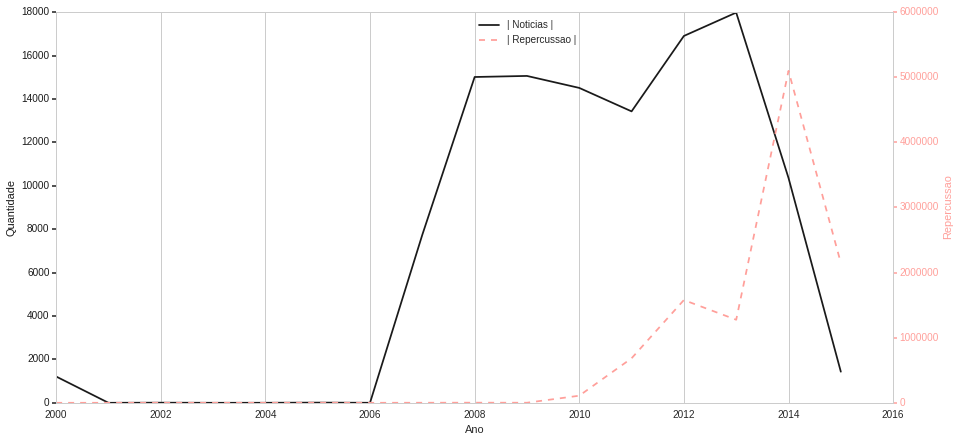

In [101]:
volRepercussao = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticiasRepercussaoAno.csv', 
                             index_col="Ano")

volRepercussao_FOLHASP = volRepercussao[volRepercussao.Jornal.isin(["FOLHASP"])]
volRepercussao_FOLHASP = volRepercussao_FOLHASP[["Quantidade","TotalRepercussao"]]

#a = volRepercussao_G1.plot()
#Obtenho duas informações:
# - fig: a figura que será apresentada.
# - host: manipula os eixos é o x,y convencional.
fig,host = plt.subplots()

# Novo eixo Y do lado direito.
novoEiroY = host.twinx()

# Tamanho da Figura
fig.set_size_inches(15, 7, forward=True)

p1, = host.plot(volRepercussao_FOLHASP.index, volRepercussao_FOLHASP.Quantidade, "k-", label="| Noticias |")
p2, = novoEiroY.plot(volRepercussao_FOLHASP.index, volRepercussao_FOLHASP.TotalRepercussao, "r--", label="| Repercussao |")

# Estabelece os nomes dos eixos.
host.set_xlabel("Ano")
host.set_ylabel("Quantidade")
novoEiroY.set_ylabel("Repercussao")

# Elimina as linhas (grandes) horizontais.
host.yaxis.grid(False)
novoEiroY.yaxis.grid(False)

# Modofica as cores das legendas.
host.yaxis.label.set_color(p1.get_color())
novoEiroY.yaxis.label.set_color(p2.get_color())

# Modofica as cores e o estilo dos eixos.
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
novoEiroY.tick_params(axis='y', colors=p2.get_color(), **tkw)

# Insere as informacoes sobre legendas.
lines = [p1, p2]
novoEiroY.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(0.50, 0.99), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
"""
Comentários:
............

Para a FOLHA DE SÃO PAULO.

1 - Entre 2009 e 2011 há uma diminuição na quantidade no número de publicações em contra partida
isso é refletida por um aumento da repercussão.

2 - Entre 2012 e 2013 o aumento da quantidade de publicações reflete em uma diminuição
da quantidade de repercussão.

3 - Entre 2013 e 2014 a diminuição da quantidade de publicações reflete novamente
no aumento da quantidade de repercussão.

"""

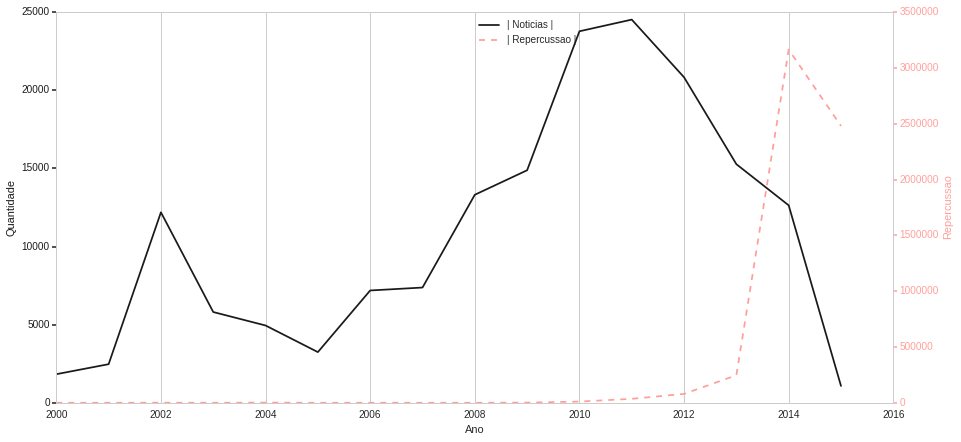

In [99]:
import seaborn as sns
volRepercussao = pd.read_csv(path+'PhD/src/scriptPython/volumeNoticiasRepercussaoAno.csv', 
                             index_col="Ano")

volRepercussao_ESTADAO = volRepercussao[volRepercussao.Jornal.isin(["ESTADAO"])]
volRepercussao_ESTADAO = volRepercussao_ESTADAO[["Quantidade","TotalRepercussao"]]

#a = volRepercussao_G1.plot()
#Obtenho duas informações:
# - fig: a figura que será apresentada.
# - host: manipula os eixos é o x,y convencional.
fig,host = plt.subplots()

# Novo eixo Y do lado direito.
novoEiroY = host.twinx()

# Tamanho da Figura
fig.set_size_inches(15, 7, forward=True)

p1, = host.plot(volRepercussao_ESTADAO.index, volRepercussao_ESTADAO.Quantidade, "k-", label="| Noticias |")
p2, = novoEiroY.plot(volRepercussao_ESTADAO.index, volRepercussao_ESTADAO.TotalRepercussao, "r--", label="| Repercussao |")

# Estabelece os nomes dos eixos.
host.set_xlabel("Ano")
host.set_ylabel("Quantidade")
novoEiroY.set_ylabel("Repercussao")

# Elimina as linhas (grandes) horizontais.
host.yaxis.grid(False)
novoEiroY.yaxis.grid(False)

# Modofica as cores das legendas.
host.yaxis.label.set_color(p1.get_color())
novoEiroY.yaxis.label.set_color(p2.get_color())

# Modofica as cores e o estilo dos eixos.
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
novoEiroY.tick_params(axis='y', colors=p2.get_color(), **tkw)

# Insere as informacoes sobre legendas.
lines = [p1, p2]
novoEiroY.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(0.50, 0.99), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
"""
Comentários:
............

Para o jornal ESTADÃO.

1 - Entre 2011 e 2013 a quantidade do número de notícias decresce enquanto a quantidade de repercussões aumenta.

2 - De maneira inversa, entre 2013 e 2014 a quantidade de notícias aumenta, a quantidade de repercussão diminui.

"""

In [ ]:
"""
                                            #..............................
                                            #
                                            # 4 - ANÁLISE DE POLARIDADE
                                            #
                                            #..............................
"""

In [ ]:
"""
3. Análise de Polaridade

Aplicamos o algoritmo vader para toda a base de dados
http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

Se saiu melhor acertando 73% da amostra de 170 itens classificados manualmente.
"""

In [4]:
"""
Quantifica a polaridade ao longo dos anos 

"""
import vincent
vincent.core.initialize_notebook()

volPolaridade = pd.read_csv(path+'PhD/src/scriptsPython/noticiasPolaridade.csv')

grouped = volPolaridade.groupby(['Ano'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

qtPolaridades = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(qtPolaridades)
stack.axis_titles(x='Ano', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [ ]:
"""
Comentários:
............

Para dos os jornais analisados, a quantidade de notícias positvas é ~3.5x a quantidade de notícias negativas.
"""

In [5]:
"""
Plota a quantidade notícias de mesma polaridade por mes.

"""

volPolaridade = pd.read_csv(path+'PhD/src/scriptsPython/noticiasPolaridade.csv')

grouped = volPolaridade.groupby(['Mes'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

qtPolaridades = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(qtPolaridades)
stack.axis_titles(x='Mes', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [6]:
"""
Plota a quantidade notícias de mesma polaridade por dia do mes.

"""
volPolaridade = pd.read_csv(path+'PhD/src/scriptsPython/noticiasPolaridade.csv')

grouped = volPolaridade.groupby(['Dia'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

qtPolaridades = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(qtPolaridades)
stack.axis_titles(x='Dia', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [7]:
"""
Plota a quantidade notícias de mesma polaridade por dia da semana.

"""
volPolaridade = pd.read_csv(path+'PhD/src/scriptsPython/noticiasPolaridade.csv')

grouped = volPolaridade.groupby(['DiadaSemana'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

qtPolaridades = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(qtPolaridades)
stack.axis_titles(x='DiadaSemana', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [8]:
"""
Plota a quantidade de noticias entre 2000 e 2015 para a FOLHA DE SAO PAULO.

"""
volPolaridade_FOLHA = volPolaridade[volPolaridade.Jornal.isin(['FOLHASP'])]

grouped = volPolaridade_FOLHA.groupby(['Ano'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

qtPolaridades_FOLHA = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(qtPolaridades_FOLHA)
stack.axis_titles(x='Ano', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [9]:
"""
Plota a quantidade de noticias negativoas entre 2000 e 2015 para o G1.

"""

volPolaridade_G1 = volPolaridade[volPolaridade.Jornal.isin(['G1'])]

grouped = volPolaridade_G1.groupby(['Ano'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

volPolaridade_G1 = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(volPolaridade_G1)
stack.axis_titles(x='Ano', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [10]:
"""
Plota a quantidade de notícias classificadas como neutras entre 2000 e 2015 para todos os jornais.

"""

volPolaridade_ESTADAO = volPolaridade[volPolaridade.Jornal.isin(['ESTADAO'])]

grouped = volPolaridade_ESTADAO.groupby(['Ano'])
volPolQuantidPos = grouped['pos'].agg({'pos' : np.sum})
volPolQuantidNeg = grouped['neg'].agg({'neg' : np.sum})
volPolQuantidNeu = grouped['neu'].agg({'neu' : np.sum})

volPolaridade_ESTADAO = pd.concat([volPolQuantidPos,volPolQuantidNeg,volPolQuantidNeu], axis=1, ignore_index=False)

stack = vincent.StackedBar(volPolaridade_ESTADAO)
stack.axis_titles(x='Ano', y='')
stack.legend(title='Polaridades')
stack.scales['x'].padding = 0.2
stack.colors(brew='Pastel1')

In [ ]:
"""
A grande quantidade de notícias é possível extrair polaridade. Em média apenas 10% das notícias são neutras. 
O que pode influenciar o leitor a tomar partido no mercado acionário.

"""

In [ ]:
"""
                                            #..............................
                                            #
                                            # 5 - ANÁLISE DE OUTLIERS
                                            #
                                            #..............................
"""

In [ ]:
"""

5.1 - Análise de Outliers para repercussão via Comentários.

"""

In [ ]:
"""

5.1.1 - Análise de Outliers para repercussão via Comentários FOLHA DE SAO PAULO.

"""

In [65]:
folhaTitulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/comentarios/termosComentariosOutliersFOLHASP-conteudo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
folhaConteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/comentarios/termosComentariosOutliersFOLHASP-titulo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título Folha"
print "----------"
print folhaTitulo.head(15)
print "----------"
print "Conteúdo Folha"
print "----------"
print folhaConteudo.head(15) 

Título Folha
----------
     palavra  frequencia
0    bovespa          53
1     brasil          39
2       alta          37
3      fecha          35
4     bolsas          31
5       mais          31
6      maior          31
7        pão          30
8       após          29
9    governo          28
10     queda          27
11     ações          27
12       vai          27
13       ipi          27
14  petróleo          25
----------
Conteúdo Folha
----------
    palavra  frequencia
0     dólar          53
1   bovespa          53
2    brasil          39
3      alta          37
4     fecha          35
5    bolsas          31
6      mais          31
7     maior          31
8       pão          30
9      após          29
10  governo          28
11    queda          27
12    ações          27
13      vai          27
14      ipi          27


In [ ]:
"""
Geracao de tag could. Nao parece ser uma boa apresentacao.
"""
#from os import path
#from wordcloud import WordCloud
#text = ""
#for row_index, row in folhaConteudo.iterrows():
#    if (row_index < 15):
#        text += row.frequencia * (row.palavra+" ")
#    else:
#       break

#wc = WordCloud(max_font_size=90)
#wc.generate(text)

# take relative word frequencies into account, lower max_font_size
#plt.figure()
#plt.imshow(wc)
#plt.axis("off")
#plt.show()

In [ ]:
"""

5.1.2 - Análise de Outliers para repercussão via Comentários ESTADAO.

"""

In [66]:
estadaoTitulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/comentarios/termosComentariosOutliersESTADAO-conteudo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
estadaoConteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/comentarios/termosComentariosOutliersESTADAO-titulo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título ESTADAO"
print "----------"
print estadaoTitulo.head(15)
print "----------"
print "Conteúdo ESTADAO"
print "----------"
print estadaoConteudo.head(15) 

Título ESTADAO
----------
     palavra  frequencia
0    agência          98
1       mais          27
2       alta          23
3     brasil          22
4        pib          17
5    governo          17
6      china          17
7        tem          16
8      dólar          16
9   inflação          15
10    bolsas          15
11       eua          14
12     queda          14
13  economia          14
14        ae          14
----------
Conteúdo ESTADAO
----------
     palavra  frequencia
0    agência          98
1        diz          41
2       mais          27
3      fabio          24
4       alta          23
5     brasil          22
6     graner          21
7        não          18
8        pib          17
9    governo          17
10     china          17
11     dólar          16
12  inflação          15
13    bolsas          15
14       eua          14


In [ ]:
"""

5.1.3 - Análise de Outliers para repercussão via Comentários G1. - NAO hÁ.

"""

In [ ]:
"""

5.2 - Análise de Outliers para repercussão via Twitter.

"""


In [ ]:
"""

5.2.1 - Análise de Outliers para repercussão via Twitter para Folha de Sao Paulo.

"""

In [70]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersFOLHASP-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersFOLHASP-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título FOLHA SAO PAULO"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo FOLHA SAO PAULO"
print "----------"
print conteudo.head(15) 

Título FOLHA SAO PAULO
----------
          palavra  frequencia
0         governo          43
1   caminhoneiros          37
2       petrobras          29
3          brasil          22
4             não          20
5            eike          20
6           dólar          20
7            sobe          20
8            mais          19
9          fiscal          17
10          bolsa          17
11           após          16
12            vai          15
13            cai          15
14           país          14
----------
Conteúdo FOLHA SAO PAULO
----------
          palavra  frequencia
0         governo          43
1   caminhoneiros          37
2       petrobras          29
3           sobre          25
4          brasil          22
5             não          20
6            eike          20
7           dólar          20
8            sobe          20
9            mais          19
10         fiscal          17
11          bolsa          17
12           após          16
13            vai  

In [ ]:
"""

5.2.2 - Análise de Outliers para repercussão via Twitter ESTADAO.

"""

In [72]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersESTADAO-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersESTADAO-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título ESTADAO"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo ESTADAO"
print "----------"
print conteudo.head(15) 

Título ESTADAO
----------
     palavra  frequencia
0   negócios          54
1        diz          45
2     brasil          34
3       mais          30
4        tem          29
5       após          29
6       alta          29
7      china          28
8        eua          28
9      dólar          27
10        r$          22
11        bc          22
12       pib          22
13  inflação          22
14     dilma          22
----------
Conteúdo ESTADAO
----------
     palavra  frequencia
0   negócios          54
1        diz          45
2     brasil          34
3       mais          30
4        tem          29
5       após          29
6       alta          29
7      china          28
8        eua          28
9      dólar          27
10        bc          22
11       pib          22
12  inflação          22
13     dilma          22
14       cai          21


In [ ]:
"""

5.2.3 - Análise de Outliers para repercussão via Twitter G1.

"""

In [74]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersG1-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/twitters/termosTwitterOutliersG1-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título G1"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo G1"
print "----------"
print conteudo.head(15) 

Título G1
----------
      palavra  frequencia
0        para          84
1       queda          50
2   petrobras          45
3         tem          42
4        alta          42
5      brasil          41
6         que          41
7        após          39
8         eua          34
9       dólar          29
10    bovespa          27
11      fecha          27
12      nesta          27
13       mais          25
14       sobe          23
----------
Conteúdo G1
----------
      palavra  frequencia
0   petrobras          45
1         tem          42
2        alta          42
3      brasil          41
4         que          41
5        após          39
6         eua          34
7        2014          31
8       dólar          29
9     bovespa          27
10      fecha          27
11      nesta          27
12       mais          25
13       sobe          23
14      maior          22


In [ ]:
"""

5.3 - Análise de Outliers para repercussão via Facebook.

"""

In [ ]:
"""

5.3.1 - Análise de Outliers para repercussão via Facebook para FOLHA SP.

"""

In [76]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersFOLHASP-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersFOLHASP-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título FOLHASP"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo FOLHASP"
print "----------"
print conteudo.head(15) 

Título FOLHASP
----------
          palavra  frequencia
0       petrobras          40
1         governo          32
2             por          32
3   caminhoneiros          28
4            mais          20
5            após          18
6           dólar          18
7          brasil          17
8           bolsa          16
9            sobe          16
10            tem          16
11           alta          15
12           veja          14
13           eike          14
14          sobre          13
----------
Conteúdo FOLHASP
----------
          palavra  frequencia
0       petrobras          40
1         governo          32
2   caminhoneiros          28
3            mais          20
4             não          19
5            após          18
6           dólar          18
7          brasil          17
8           bolsa          16
9            sobe          16
10            tem          16
11           alta          15
12           veja          14
13           eike          14
14   

In [ ]:
"""

5.3.2 - Análise de Outliers para repercussão via Facebook para ESTADAO.

"""

In [81]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersESTADAO-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersESTADAO-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título ESTADAO"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo ESTADAO"
print "----------"
print conteudo.head(15) 

Título ESTADAO
----------
       palavra  frequencia
0     negócios          14
1       brasil          12
2         joão          12
3       dantas          12
4          não          11
5   villaverde          11
6        dólar          10
7      governo          10
8    rodrigues           9
9      adriana           9
10   fernandes           9
11        2015           8
12        mais           8
13      murilo           7
14       alves           7
----------
Conteúdo ESTADAO
----------
       palavra  frequencia
0     fernando          16
1          diz          16
2     negócios          14
3          por          13
4       brasil          12
5         joão          12
6       dantas          12
7          não          11
8   villaverde          11
9        dólar          10
10     governo          10
11        mais           8
12          r$           7
13        como           7
14      murilo           7


In [ ]:
"""

5.3.3 - Análise de Outliers para repercussão via Facebook para G1.

"""

In [83]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersG1-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/facebook/termosFacebookOutliersG1-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título G1"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo G1"
print "----------"
print conteudo.head(15) 

Título G1
----------
      palavra  frequencia
0        alta          28
1      brasil          27
2         que          26
3        após          24
4         eua          21
5        sobe          20
6         dos          20
7     bovespa          19
8     milhões          19
9       fecha          18
10      dólar          18
11  petrobras          17
12       mais          15
13        ano          15
14      sobre          15
----------
Conteúdo G1
----------
      palavra  frequencia
0        alta          28
1      brasil          27
2         que          26
3        após          24
4         eua          21
5        sobe          20
6     bovespa          19
7     milhões          19
8       fecha          18
9       dólar          18
10  petrobras          17
11       mais          15
12        ano          15
13      sobre          15
14      dilma          15


In [ ]:
"""

5.4 - Análise de Outliers para repercussão via LinkedIn.

"""

In [ ]:
"""

5.4.1 - Análise de Outliers para repercussão via LinkedIn para G1.

"""

In [87]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersG1-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersG1-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título G1"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo G1"
print "----------"
print conteudo.head(15) 

Título G1
----------
      palavra  frequencia
0       lucro          88
1        alta          87
2         por          84
3         eua          78
4       dólar          75
5         dos          73
6      brasil          71
7         tem          69
8        mais          68
9           é          67
10        que          66
11  trimestre          61
12       sobe          60
13   inflação          56
14      fecha          52
----------
Conteúdo G1
----------
      palavra  frequencia
0       lucro          88
1        alta          87
2         eua          78
3       dólar          75
4         dos          73
5      brasil          71
6         tem          69
7        mais          68
8   trimestre          61
9        sobe          60
10   inflação          56
11      fecha          52
12      abril          52
13    milhões          51
14        não          48


In [ ]:
"""

5.4.2 - Análise de Outliers para repercussão via LinkedIn para ESTADAO.

"""

In [91]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersESTADAO-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersESTADAO-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título ESTADAO"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo ESTADAO"
print "----------"
print conteudo.head(15) 

Título ESTADAO
----------
           palavra  frequencia
0         economia          40
1              diz          30
2           estado          28
3         negócios          26
4           brasil          24
5          agência          22
6             mais          19
7             alta          17
8   correspondente          16
9              dos          16
10             tem          13
11             vai          13
12            levy          13
13            deve          13
14              r$          12
----------
Conteúdo ESTADAO
----------
           palavra  frequencia
0         economia          40
1           estado          28
2         negócios          26
3           brasil          24
4          agência          22
5             mais          19
6             alta          17
7   correspondente          16
8              tem          13
9             levy          13
10            deve          13
11              r$          12
12           dólar          12
13   

In [ ]:
"""

5.4.3 - Análise de Outliers para repercussão via LinkedIn para FOLHA DE SAO PAULO.

"""

In [90]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersFOLHASP-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/linkedIn/termosLinkedInOutliersFOLHASP-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título FOLHASP"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo FOLHASP"
print "----------"
print conteudo.head(15) 

Título FOLHASP
----------
      palavra  frequencia
0         diz          21
1   petrobras          15
2       maior          10
3     energia          10
4      brasil           9
5        mais           9
6        deve           7
7         tem           7
8         ano           7
9       bolsa           7
10   inflação           7
11      juros           7
12      china           6
13         ao           6
14       vale           6
----------
Conteúdo FOLHASP
----------
      palavra  frequencia
0         diz          21
1   petrobras          15
2       maior          10
3     energia          10
4      brasil           9
5        mais           9
6        deve           7
7         tem           7
8         ano           7
9       bolsa           7
10   inflação           7
11      juros           7
12      china           6
13         ao           6
14       vale           6


In [ ]:
"""

5.5 - Análise de Outliers para repercussão via GooglePlus.

"""

In [ ]:
"""

5.4.1 - Análise de Outliers para repercussão via GooglePlus para ESTADAO.

"""

In [94]:
titulo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/gplus/termoGooglePlusDiasOutliersESTADAO-titulo.txt', 
                          sep="\t", names=['palavra', 'frequencia'], header=0)
conteudo = pd.read_csv(path+'PhD/src/scriptsMongo/outliers/gplus/termosGooglePlusDiasOutliersESTADAO-conteudo.txt', 
                            sep="\t", names=['palavra', 'frequencia'], header=0)
print "Título ESTADAO"
print "----------"
print titulo.head(15)
print "----------"
print "Conteúdo ESTADAO"
print "----------"
print conteudo.head(15) 

Título ESTADAO
----------
     palavra  frequencia
0     estado          25
1    agência          21
2       alta          16
3        com          14
4   economia          13
5        diz          11
6       mais           9
7   inflação           9
8        tem           8
9      caixa           7
10     abril           7
11     dólar           7
12    bolsas           6
13       nos           6
14        r$           6
----------
Conteúdo ESTADAO
----------
      palavra  frequencia
0      estado          25
1     agência          21
2        alta          16
3    economia          13
4         diz          11
5        mais           9
6    inflação           9
7         dos           9
8       caixa           7
9       abril           7
10      dólar           7
11     bolsas           6
12         bi           6
13   negócios           6
14  trimestre           6


In [ ]:
"""
                                            #..............................
                                            #
                                            # 6 - ANÁLISE DE CORRELAÇÃO
                                            #
                                            #..............................
"""

In [ ]:
"""
6.1 - Análise de Correlação entre QUANTIDADE DE NOTíCIAS e o índice Ibovespa.

"""

In [80]:

ibovespa = pd.read_csv(path+'PhD/src/scriptsPython/correlacao/indices/IndiceIbovespa.csv', index_col='data', 
                       dayfirst=True, parse_dates=True)

ibovespa = ibovespa.reindex(index=ibovespa.index[::-1])

volRepercussao = pd.read_csv(path+'PhD/src/scriptsPython/correlacao/repercussao/noticiasRepercussaoGeralData.csv',
                             index_col='Data',
                             dayfirst=True, parse_dates=True)

volRepercussaoPorJornal = pd.read_csv(path+'PhD/src/scriptsPython/correlacao/repercussao/noticiasRepercussaoData.csv',
                             index_col='Data',
                             dayfirst=True, parse_dates=True)

In [81]:
qtNoticias = volRepercussao[volRepercussao.index.isin(ibovespa.index)]
qtNoticiasPorJornal = volRepercussaoPorJornal[volRepercussaoPorJornal.index.isin(ibovespa.index)]

print qtNoticias.index.values
print qtNoticiasPorJornal.index.values
print ibovespa.index.values

['2005-06-15T21:00:00.000000000-0300' '2005-06-16T21:00:00.000000000-0300'
 '2005-06-19T21:00:00.000000000-0300' ...,
 '2015-06-09T21:00:00.000000000-0300' '2015-06-10T21:00:00.000000000-0300'
 '2015-06-11T21:00:00.000000000-0300']
['2005-06-15T21:00:00.000000000-0300' '2005-06-15T21:00:00.000000000-0300'
 '2005-06-15T21:00:00.000000000-0300' ...,
 '2015-06-11T21:00:00.000000000-0300' '2015-06-11T21:00:00.000000000-0300'
 '2015-06-11T21:00:00.000000000-0300']
['2005-06-15T21:00:00.000000000-0300' '2005-06-16T21:00:00.000000000-0300'
 '2005-06-19T21:00:00.000000000-0300' ...,
 '2015-06-09T21:00:00.000000000-0300' '2015-06-10T21:00:00.000000000-0300'
 '2015-06-11T21:00:00.000000000-0300']


In [ ]:
"""
6.1.1 - Análise de Correlação entre QUANTIDADE DE NOTíCIAS e o índice Ibovespa com todos os dados.

"""

In [82]:
serieIbovespaPreco = Series(ibovespa.preco, index=ibovespa.index)
serieQtNoticias = Series(qtNoticias.Quantidade, index=qtNoticias.index)

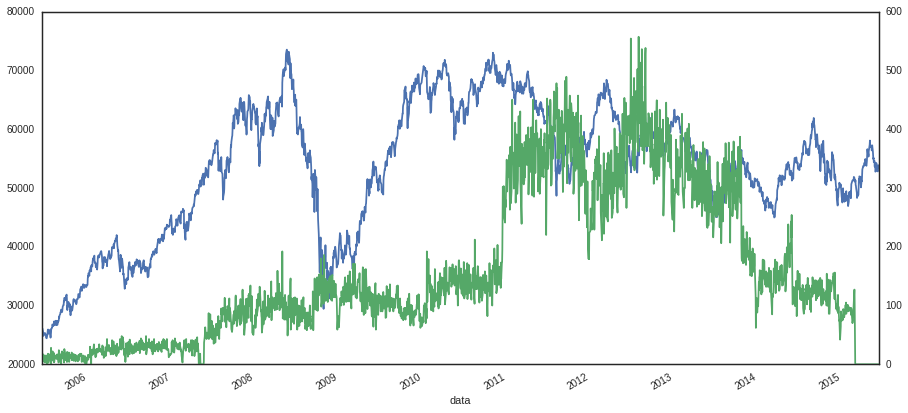

In [83]:
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtNoticias' : serieQtNoticias})
df.ibovespa.plot()
df.qtNoticias.plot(secondary_y=True, style='g', figsize=(15, 7))

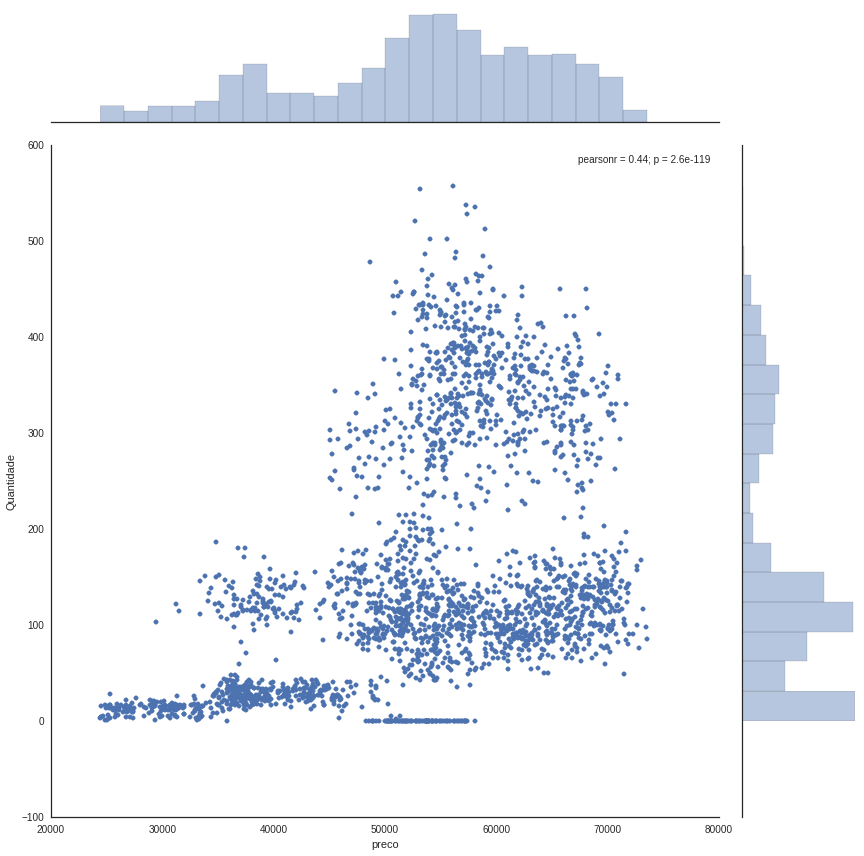

In [84]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Quantidade': qtNoticias.Quantidade})
g = sns.jointplot(x="preco", y="Quantidade", data=df, size=12)

In [60]:
z,pval = mstats.normaltest(ibovespa.preco)

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [185]:
z,pval = mstats.normaltest(qtNoticias.Quantidade)

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [186]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.Quantidade)

print tau
print p_value

0.324275888422
3.90396415761e-129


In [ ]:
"""
6.1.2 - Análise de Correlação entre QUANTIDADE DE NOTíCIAS DO G1  e o índice Ibovespa .

"""

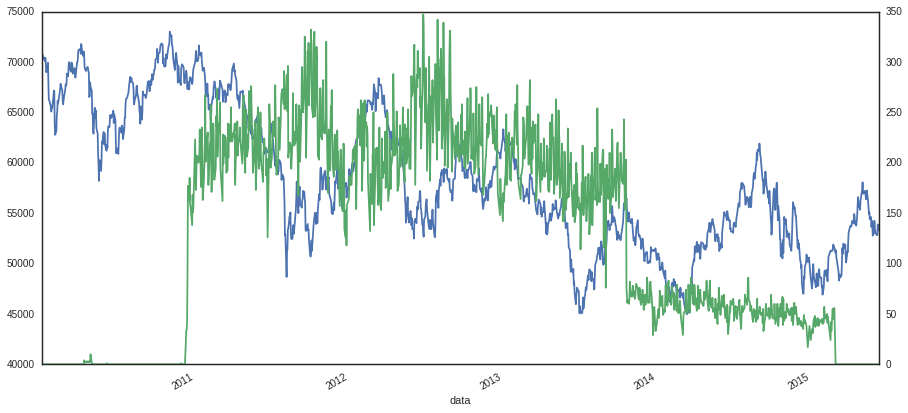

In [91]:
qtNoticiasPorJornal_G1 = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['G1'])]
serieQtNoticias = Series(qtNoticiasPorJornal_G1.Quantidade, index=qtNoticiasPorJornal_G1.index)

df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtNoticias' : serieQtNoticias['2010':'2015']})
df.ibovespa.plot()
df.qtNoticias.plot(secondary_y=True, style='g', figsize=(15, 7))

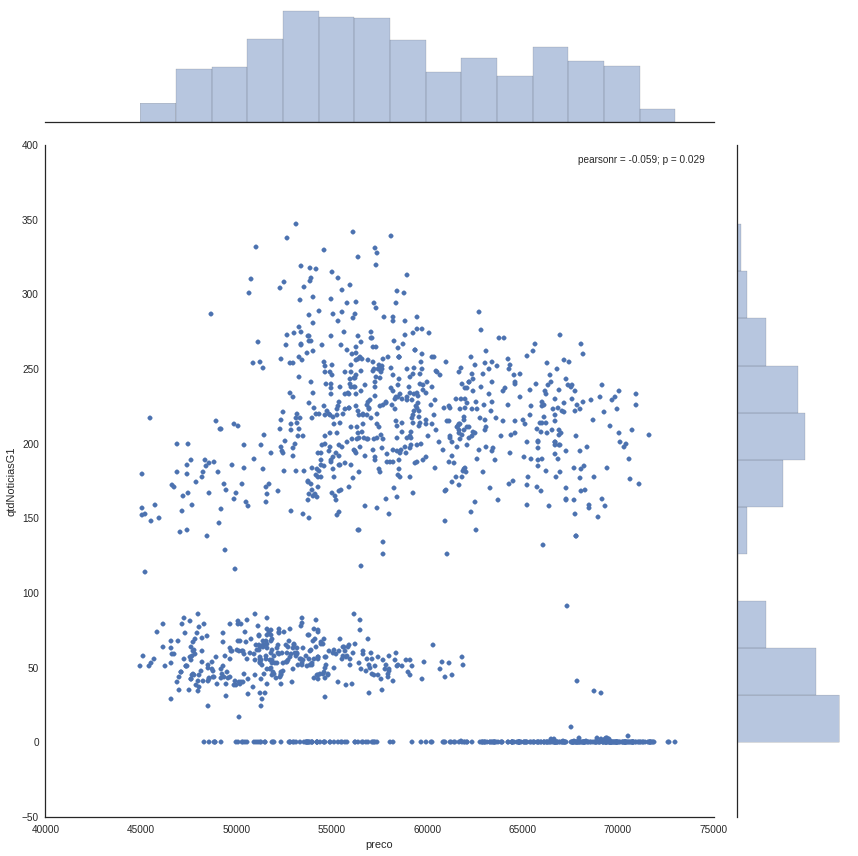

In [93]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'qtdNoticiasG1': qtNoticiasPorJornal_G1.Quantidade['2010':'2015']})
g = sns.jointplot(x="preco", y="qtdNoticiasG1", data=df, size=12)

In [98]:
z,pval = mstats.normaltest(ibovespa.preco['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [101]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_G1.Quantidade['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print pval
    print z

--
--


In [95]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_G1.Quantidade['2010':'2015'])

print tau
print p_value

-0.03084980649
0.0895002144893


In [ ]:
"""
6.1.3 - Análise de Correlação entre QUANTIDADE DE NOTíCIAS DA FOLHA e o índice Ibovespa .

"""

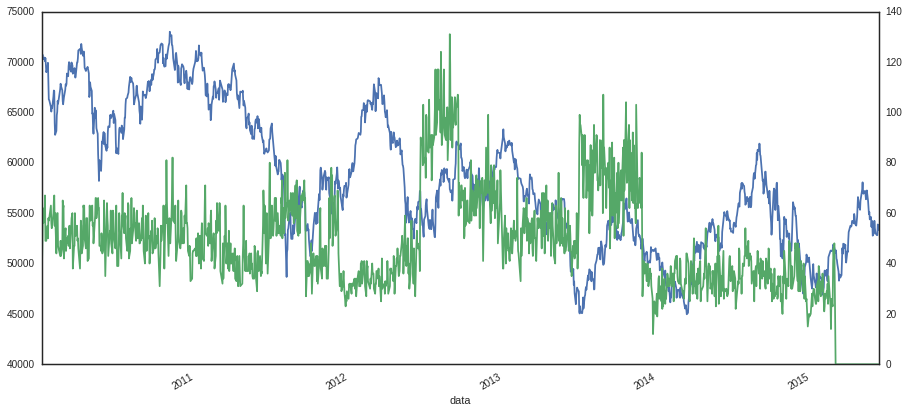

In [103]:
qtNoticiasPorJornal_FOLHA = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['FOLHASP'])]
serieQtNoticias = Series(qtNoticiasPorJornal_FOLHA.Quantidade, index=qtNoticiasPorJornal_FOLHA.index)

df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtNoticias' : serieQtNoticias['2010':'2015']})
df.ibovespa.plot()
df.qtNoticias.plot(secondary_y=True, style='g', figsize=(15, 7))

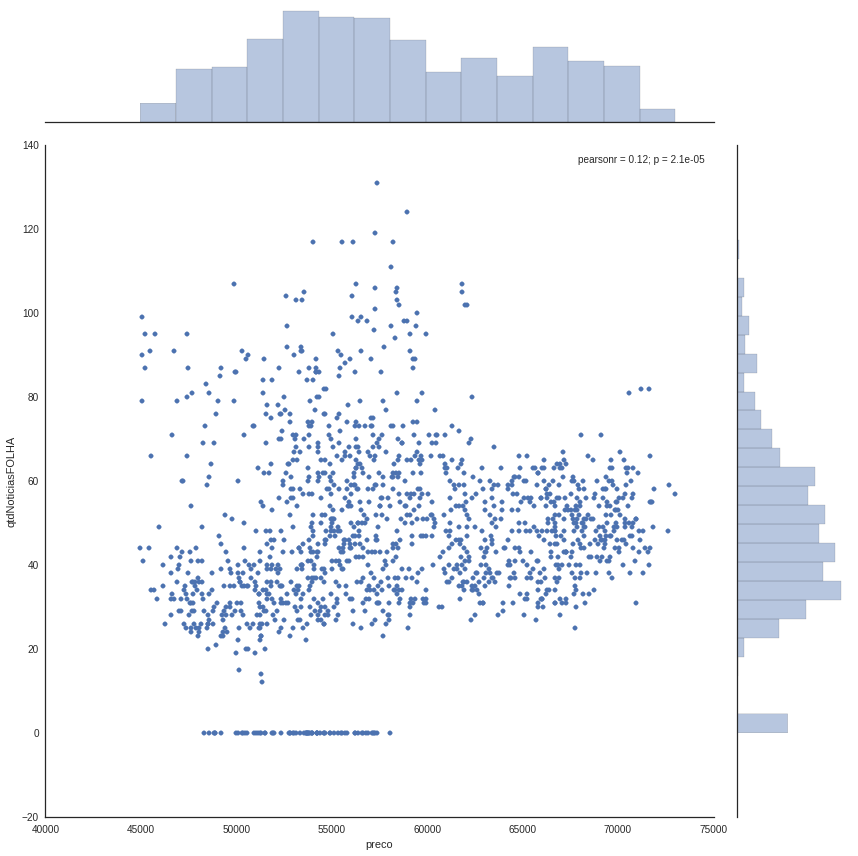

In [104]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'qtdNoticiasFOLHA': qtNoticiasPorJornal_FOLHA.Quantidade['2010':'2015']})
g = sns.jointplot(x="preco", y="qtdNoticiasFOLHA", data=df, size=12)

In [105]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_FOLHA.Quantidade['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print pval
    print z

Not normal distribution


In [108]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_FOLHA.Quantidade['2010':'2015'])

print tau
print p_value

0.121389607464
2.36434189039e-11


In [ ]:
"""
6.1.4 - Análise de Correlação entre QUANTIDADE DE NOTíCIAS DO ESTADAO e o índice Ibovespa .

"""

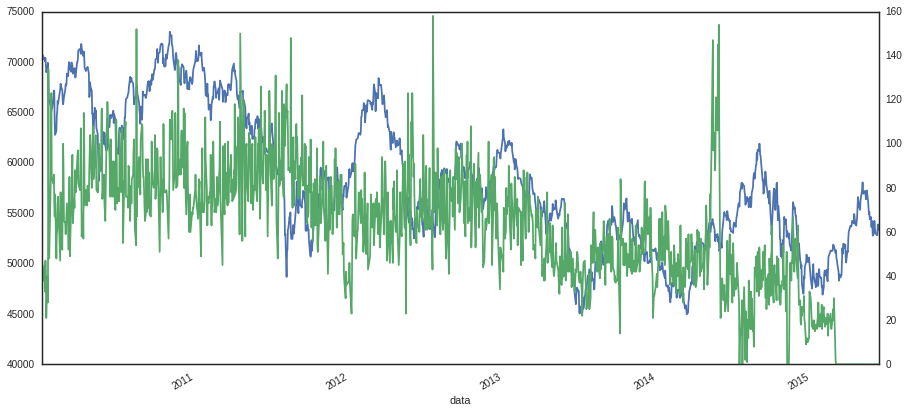

In [109]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]
serieQtNoticias = Series(qtNoticiasPorJornal_ESTADAO.Quantidade, index=qtNoticiasPorJornal_ESTADAO.index)

df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtNoticias' : serieQtNoticias['2010':'2015']})
df.ibovespa.plot()
df.qtNoticias.plot(secondary_y=True, style='g', figsize=(15, 7))

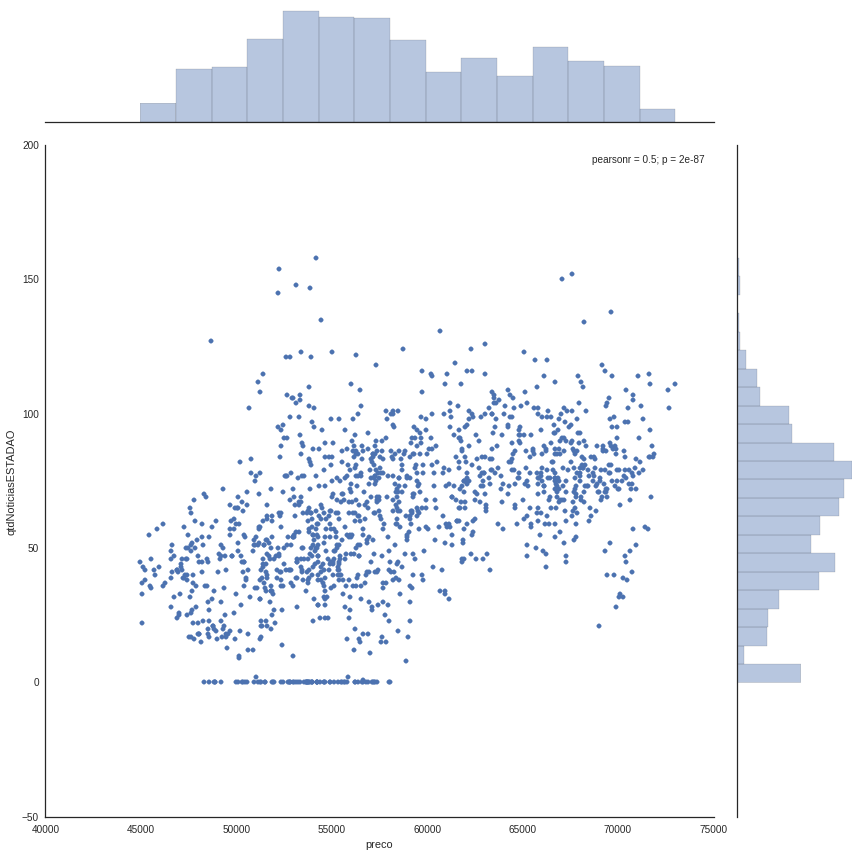

In [111]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'qtdNoticiasESTADAO': qtNoticiasPorJornal_ESTADAO.Quantidade['2010':'2015']})
g = sns.jointplot(x="preco", y="qtdNoticiasESTADAO", data=df, size=12)

In [112]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.Quantidade['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print pval
    print z

0.0640525757908
5.49610207227


In [113]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.Quantidade['2010':'2015'])

print tau
print p_value

0.37222038727
2.76532707123e-93


In [ ]:
"""
6.2 - Análise de Correlação entre QUANTIDADE DE COMENTARIOS e o índice Ibovespa.

"""

In [ ]:
"""
6.2.1  - Análise de Correlação entre QUANTIDADE DE COMENTARIOS e o índice Ibovespa para todos os pontos
em que ocorreram bolsa excetuando-se, por obvio, sabados e domingos.

"""

In [47]:
serieQtComentarios = Series(qtNoticias.Comentarios, index=qtNoticias.index)

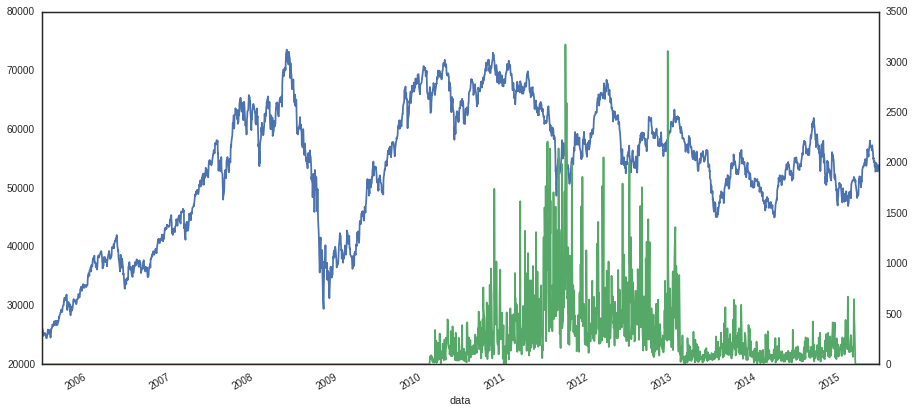

In [49]:
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtComentarios' : serieQtComentarios})
df.ibovespa.plot()
df.qtComentarios.plot(secondary_y=True, style='g', figsize=(15, 7))

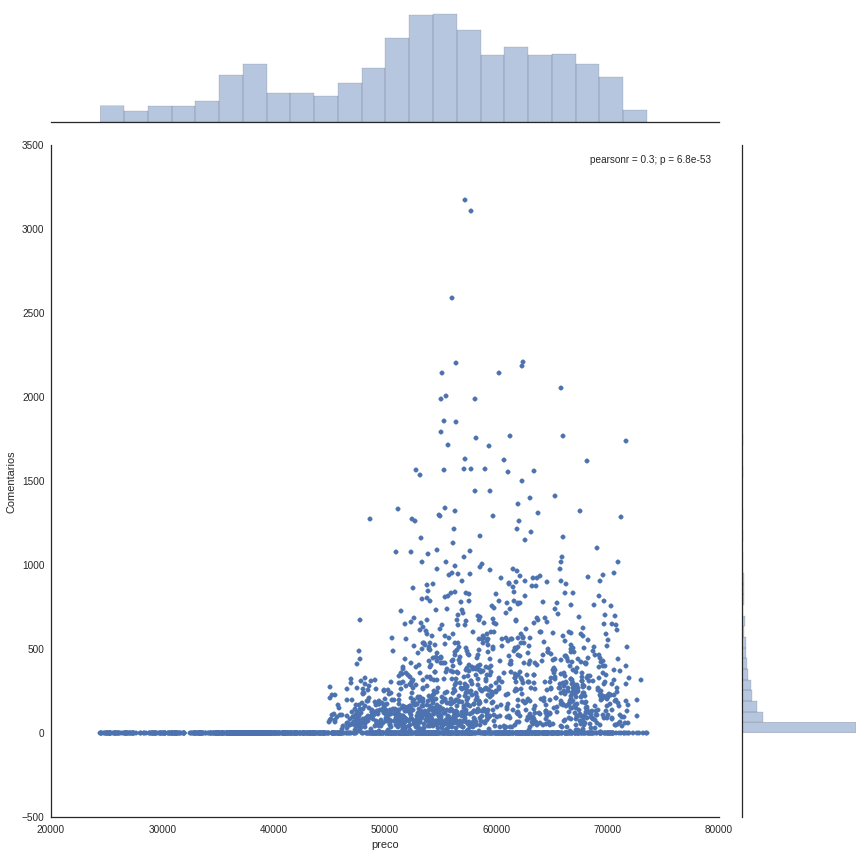

In [48]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Comentarios': qtNoticias.Comentarios})
g = sns.jointplot(x="preco", y="Comentarios", data=df, size=12)

In [189]:
z,pval = mstats.normaltest(qtNoticias.Comentarios)

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [190]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.Comentarios)

print tau
print p_value

0.332137783554
2.2491069579e-135


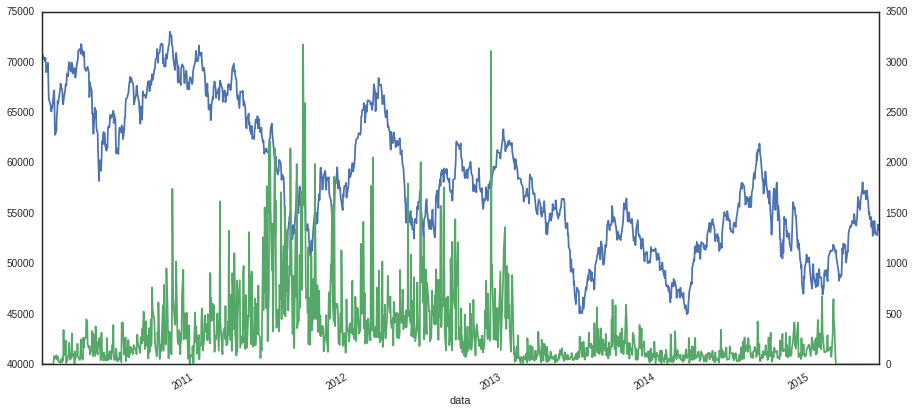

In [66]:
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtComentarios' : serieQtComentarios['2010':'2015']})
df.ibovespa.plot()
df.qtComentarios.plot(secondary_y=True, style='g', figsize=(15, 7))

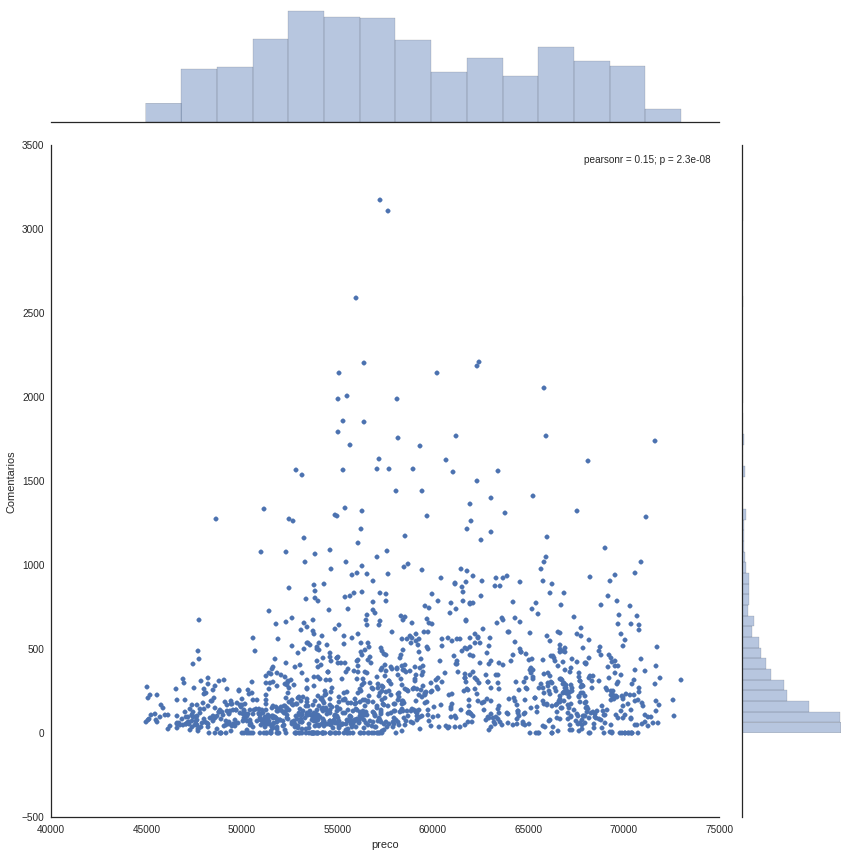

In [67]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Comentarios': qtNoticias.Comentarios['2010':'2015']})
g = sns.jointplot(x="preco", y="Comentarios", data=df, size=12)

In [68]:
z,pval = mstats.normaltest(qtNoticias.Comentarios['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [69]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticias.Comentarios['2010':'2015'])

print tau
print p_value

0.171454787703
3.82720755962e-21


In [ ]:
"""
6.2.2  - Análise de Correlação entre QUANTIDADE DE COMENTARIOS DO G1 e o índice Ibovespa para todos os pontos
em que ocorreram bolsa excetuando-se, por obvio, sabados e domingos.

"""

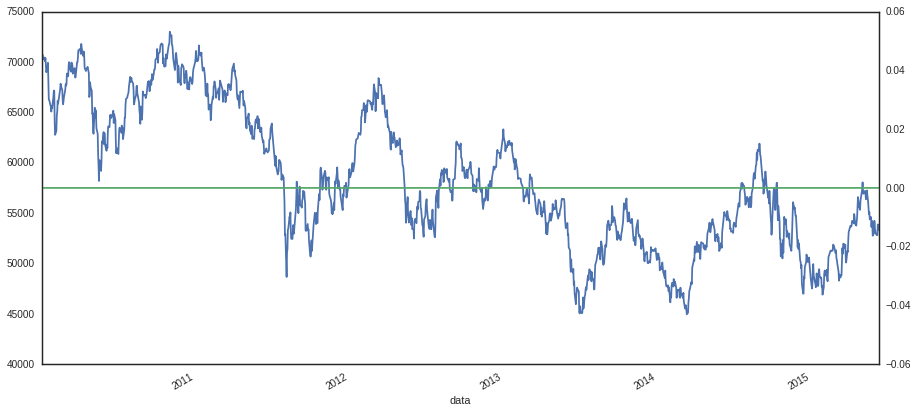

In [119]:
qtNoticiasPorJornal_G1 = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['G1'])]
serieQtNoticias = Series(qtNoticiasPorJornal_G1.Comentarios, index=qtNoticiasPorJornal_G1.Comentarios.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtComentariosG1' : serieQtNoticias['2010':'2015']})
df.ibovespa.plot()
df.qtComentariosG1.plot(secondary_y=True, style='g', figsize=(15, 7))

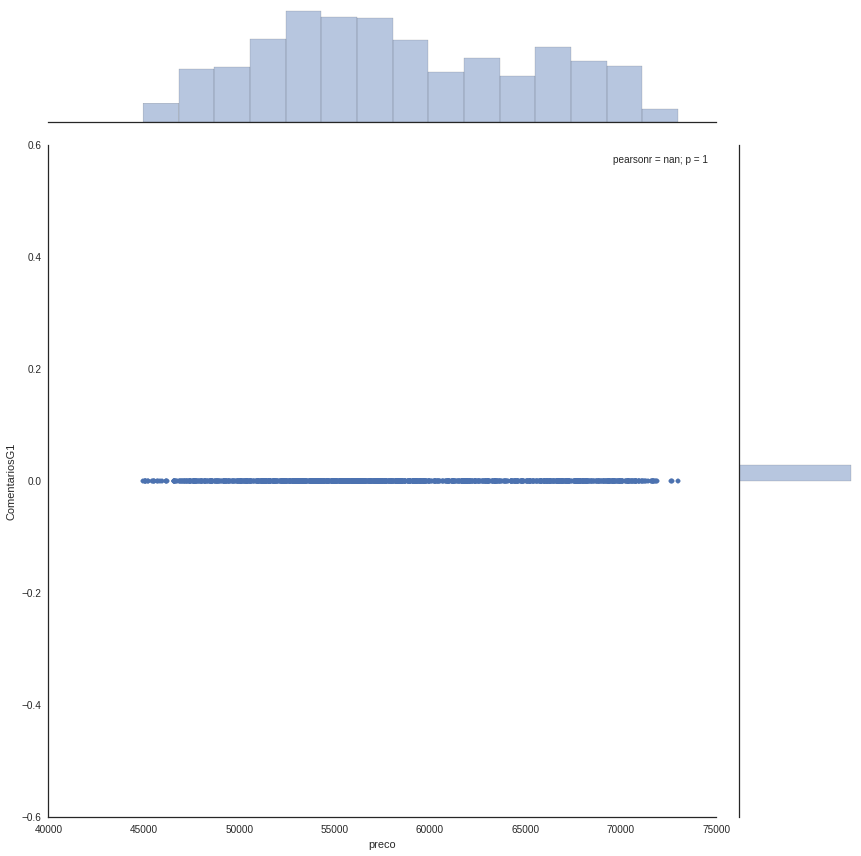

In [115]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'ComentariosG1': qtNoticiasPorJornal_G1.Comentarios['2010':'2015']})
g = sns.jointplot(x="preco", y="ComentariosG1", data=df, size=12)

In [117]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_G1.Comentarios['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print z,pval

-- --


In [118]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_G1.Comentarios['2010':'2015'])

print tau
print p_value

nan
nan


In [ ]:
"""
6.2.3  - Análise de Correlação entre QUANTIDADE DE COMENTARIOS DA FOLHA e o índice Ibovespa para todos os pontos
em que ocorreram bolsa excetuando-se, por obvio, sabados e domingos.

"""

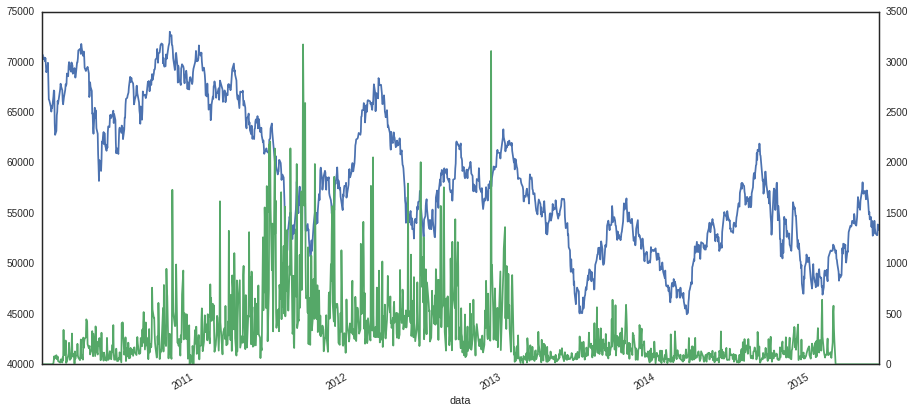

In [120]:
qtNoticiasPorJornal_FOLHA = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['FOLHASP'])]
serieQtComentariosFolha = Series(qtNoticiasPorJornal_FOLHA.Comentarios, index=qtNoticiasPorJornal_FOLHA.Comentarios.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtComentariosFOLHA' : serieQtComentariosFolha['2010':'2015']})
df.ibovespa.plot()
df.qtComentariosFOLHA.plot(secondary_y=True, style='g', figsize=(15, 7))

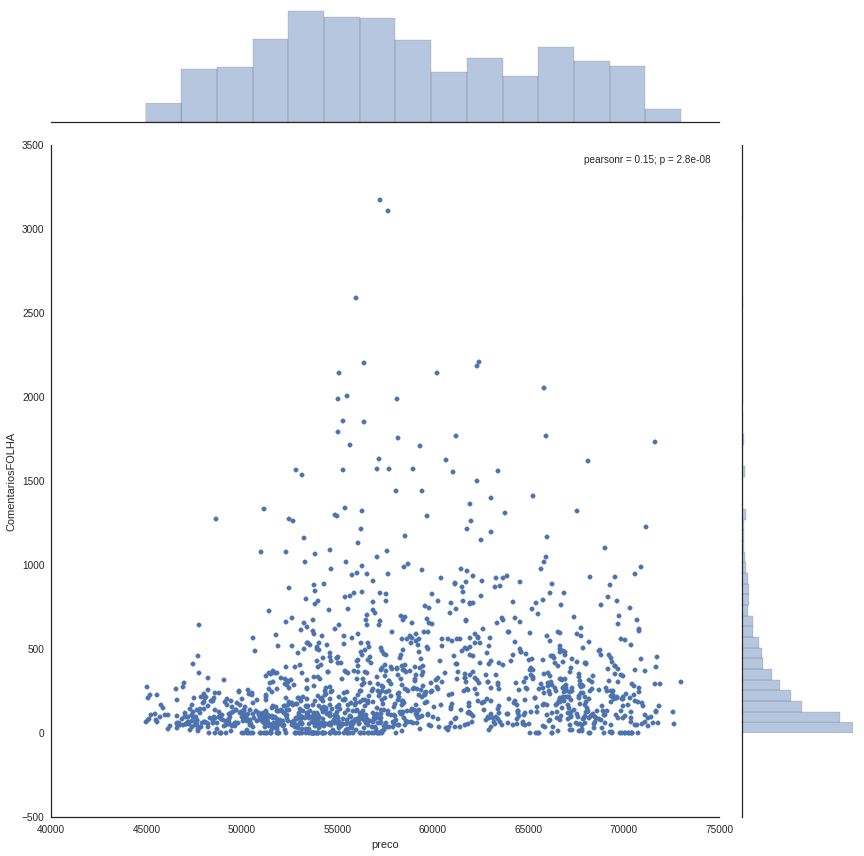

In [121]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'ComentariosFOLHA': qtNoticiasPorJornal_FOLHA.Comentarios['2010':'2015']})
g = sns.jointplot(x="preco", y="ComentariosFOLHA", data=df, size=12)

In [122]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_FOLHA.Comentarios['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print z,pval

Not normal distribution


In [123]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_FOLHA.Comentarios['2010':'2015'])

print tau
print p_value

0.17231236163
2.43677229128e-21


In [ ]:
"""
6.2.4  - Análise de Correlação entre QUANTIDADE DE COMENTARIOS DO ESTADAO e o índice Ibovespa para todos os pontos
em que ocorreram bolsa excetuando-se, por obvio, sabados e domingos.

"""

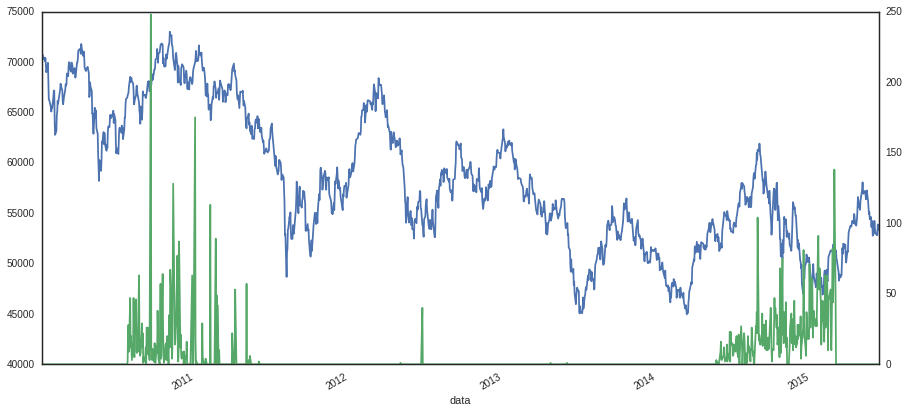

In [125]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]
serieQtComentariosESTADAO = Series(qtNoticiasPorJornal_ESTADAO.Comentarios, 
                                   index=qtNoticiasPorJornal_ESTADAO.Comentarios.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtComentariosESTADAO' : serieQtComentariosESTADAO['2010':'2015']})
df.ibovespa.plot()
df.qtComentariosESTADAO.plot(secondary_y=True, style='g', figsize=(15, 7))

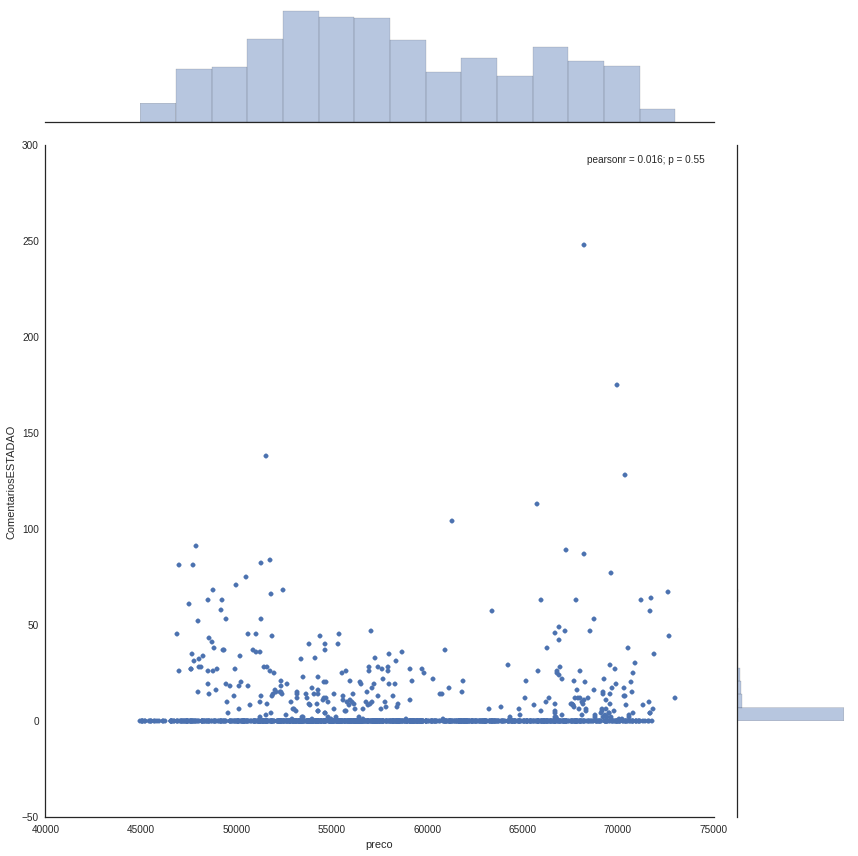

In [126]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'ComentariosESTADAO': qtNoticiasPorJornal_ESTADAO.Comentarios['2010':'2015']})
g = sns.jointplot(x="preco", y="ComentariosESTADAO", data=df, size=12)

In [127]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.Comentarios['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"
else:
    print z,pval

Not normal distribution


In [128]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.Comentarios['2010':'2015'])

print tau
print p_value

0.0243254253032
0.180595430136


In [ ]:
"""
6.3 - Análise de Correlação entre QUANTIDADE DE Twetter e o índice Ibovespa.

"""

In [ ]:
"""
6.3.1 - Análise de Correlação entre QUANTIDADE DE Twetter e o índice Ibovespa para todas as informacoes

"""

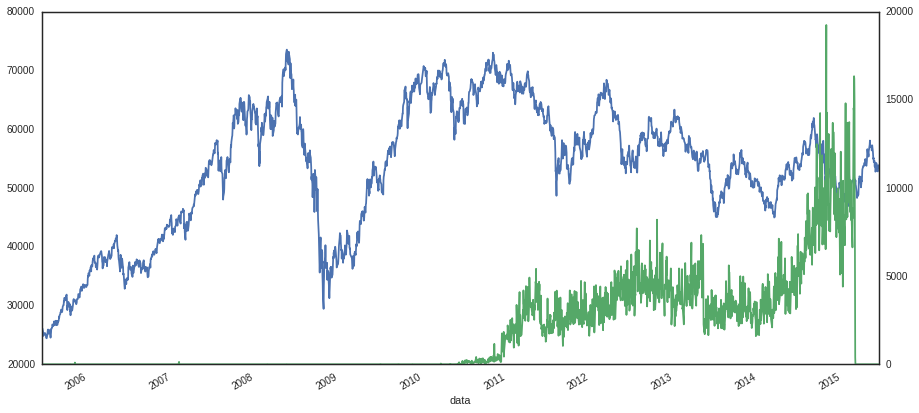

In [129]:
serieQtTweets = Series(qtNoticias.Tweets, index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qTweets' : serieQtTweets})
df.ibovespa.plot()
df.qTweets.plot(secondary_y=True, style='g', figsize=(15, 7))

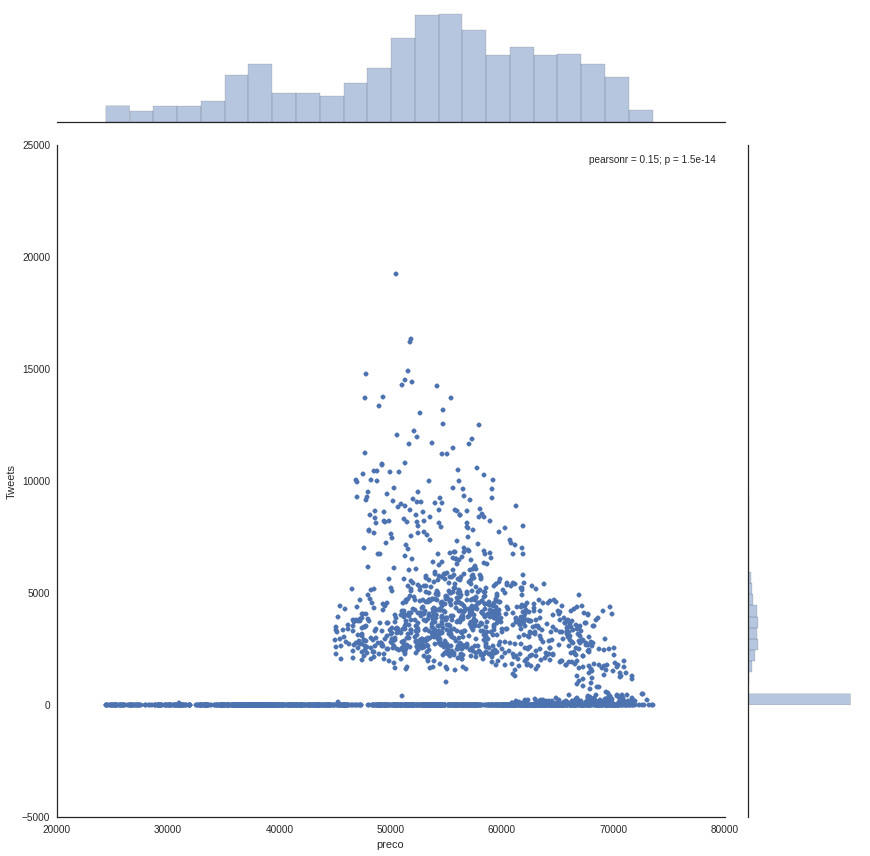

In [130]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Tweets': qtNoticias.Tweets})
g = sns.jointplot(x="preco", y="Tweets", data=df, size=12)

In [131]:
z,pval = mstats.normaltest(qtNoticias.Tweets)
if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [132]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.Tweets)

print tau
print p_value

0.166321262827
2.60387052644e-35


In [ ]:
"""
6.3.2 - Análise de Correlação entre QUANTIDADE DE Twitter G1 e o índice Ibovespa.

"""

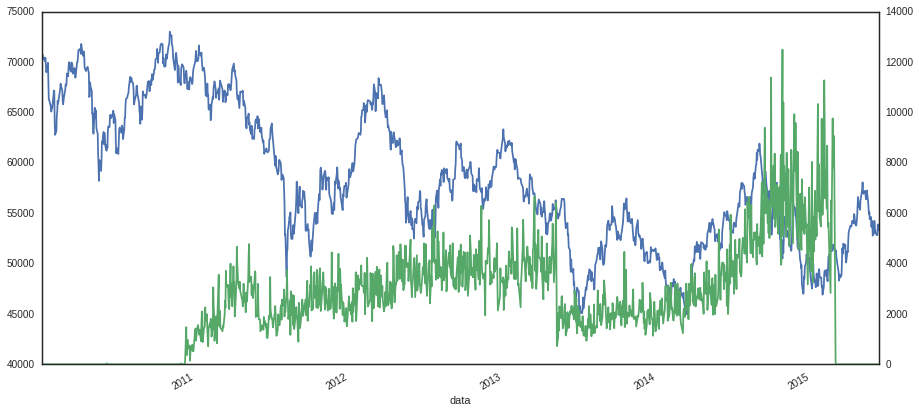

In [134]:
qtNoticiasPorJornal_G1 = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['G1'])]

serieQtTweets_G1 = Series(qtNoticiasPorJornal_G1.Tweets, index=qtNoticiasPorJornal_G1.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qTweets_G1' : serieQtTweets_G1['2010':'2015']})
df.ibovespa.plot()
df.qTweets_G1.plot(secondary_y=True, style='g', figsize=(15, 7))

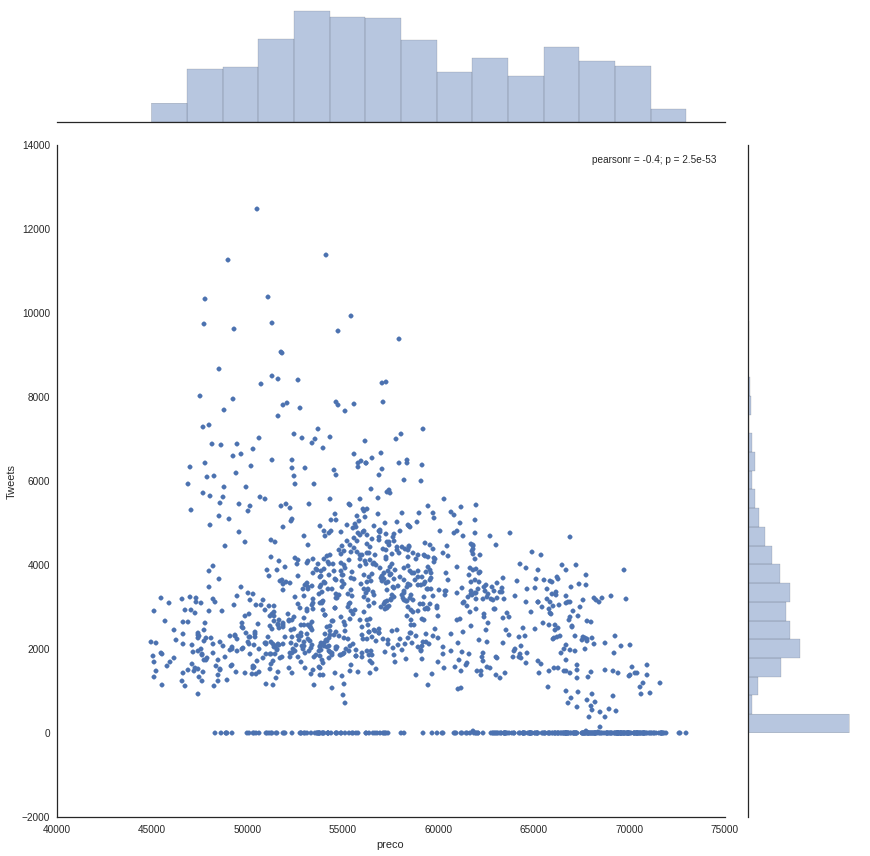

In [135]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Tweets': qtNoticiasPorJornal_G1.Tweets['2010':'2015']})
g = sns.jointplot(x="preco", y="Tweets", data=df, size=12)

In [136]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_G1.Tweets['2010':'2015'])
if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [137]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_G1.Tweets['2010':'2015'])

print tau
print p_value

-0.230164734293
8.8091277968e-37


In [ ]:
"""
6.3.3 - Análise de Correlação entre QUANTIDADE DE Twitter FOLHA e o índice Ibovespa.

"""

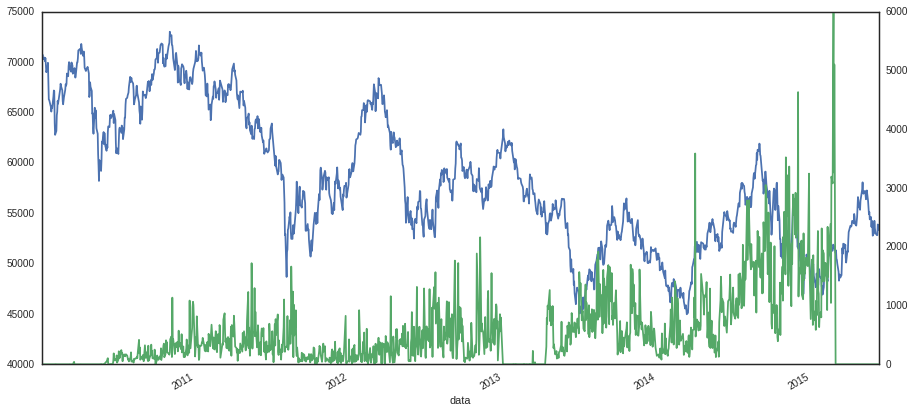

In [138]:
qtNoticiasPorJornal_FOLHA = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['FOLHASP'])]

serieQtTweets_FOLHA = Series(qtNoticiasPorJornal_FOLHA.Tweets, index=qtNoticiasPorJornal_FOLHA.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qTweets_FOLHA' : serieQtTweets_FOLHA['2010':'2015']})
df.ibovespa.plot()
df.qTweets_FOLHA.plot(secondary_y=True, style='g', figsize=(15, 7))

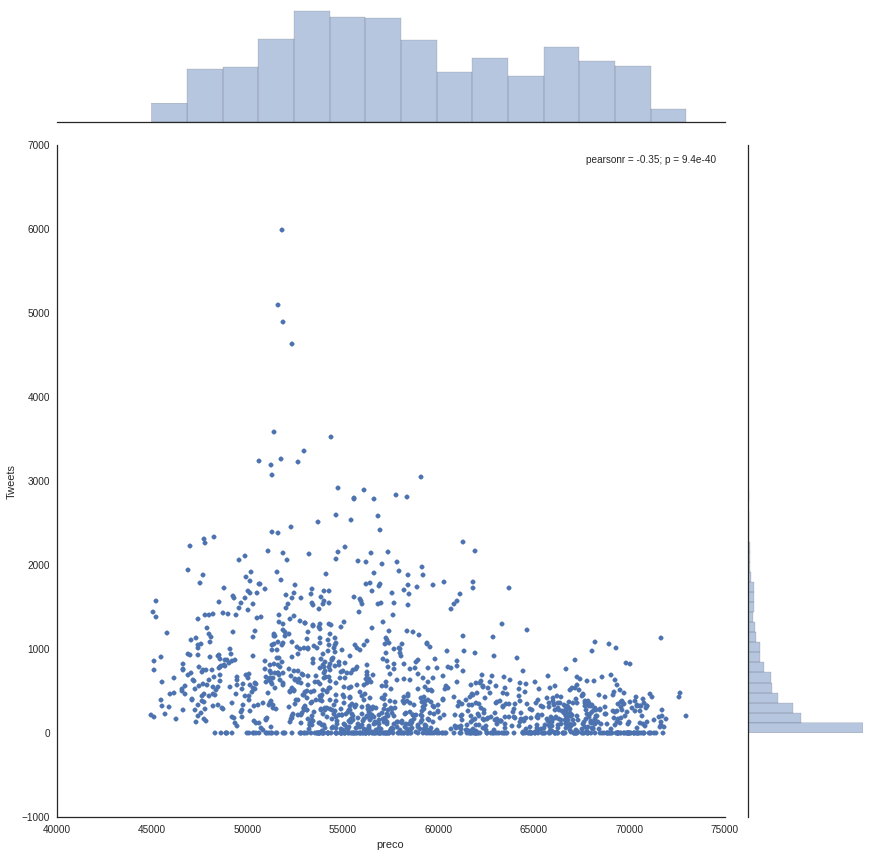

In [140]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Tweets': qtNoticiasPorJornal_FOLHA.Tweets['2010':'2015']})
g = sns.jointplot(x="preco", y="Tweets", data=df, size=12)

In [141]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_FOLHA.Tweets['2010':'2015'])
if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [142]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_FOLHA.Tweets['2010':'2015'])

print tau
print p_value

-0.258074438674
8.53336080733e-46


In [ ]:
"""
6.3.4 - Análise de Correlação entre QUANTIDADE DE Twitter ESTADAO e o índice Ibovespa.

"""

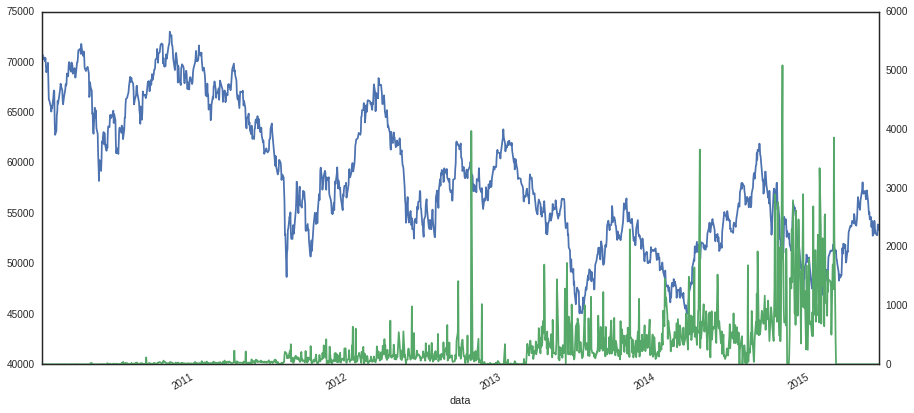

In [143]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]

serieQtTweets_ESTADAO = Series(qtNoticiasPorJornal_ESTADAO.Tweets, index=qtNoticiasPorJornal_ESTADAO.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qTweets_ESTADAO' : serieQtTweets_ESTADAO['2010':'2015']})
df.ibovespa.plot()
df.qTweets_ESTADAO.plot(secondary_y=True, style='g', figsize=(15, 7))

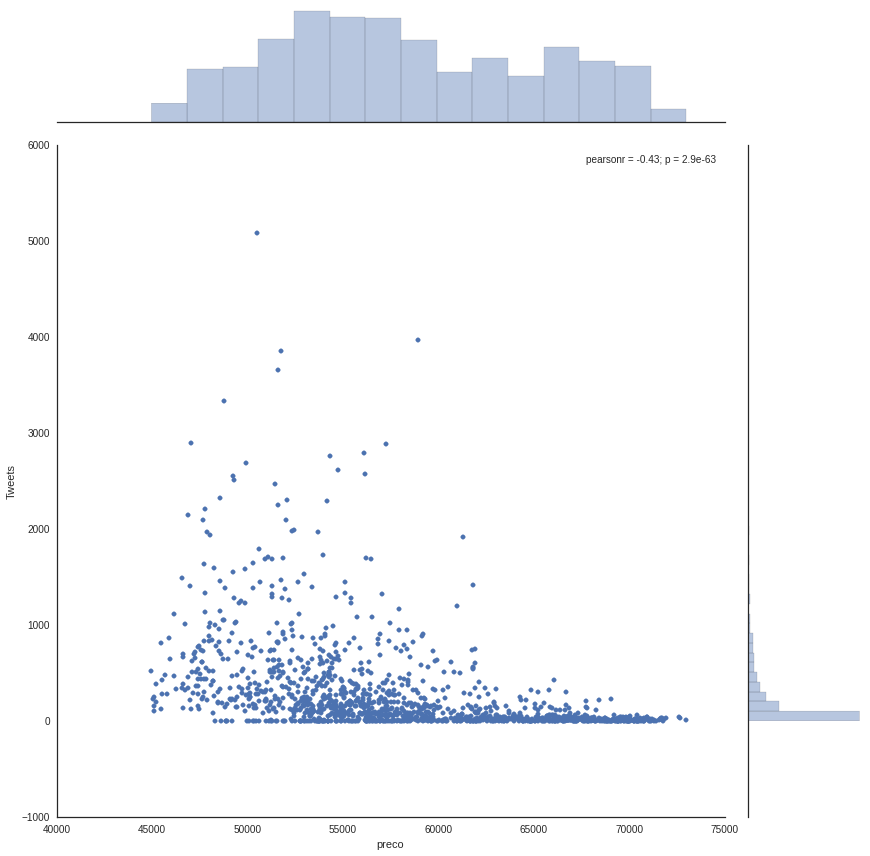

In [144]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Tweets': qtNoticiasPorJornal_ESTADAO.Tweets['2010':'2015']})
g = sns.jointplot(x="preco", y="Tweets", data=df, size=12)

In [145]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.Tweets['2010':'2015'])
if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [146]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.Tweets['2010':'2015'])

print tau
print p_value

-0.428637614984
4.53260591937e-123


In [ ]:
"""
6.4 - Análise de Correlação entre QUANTIDADE DE Facebook e o índice Ibovespa.

"""

In [ ]:
"""
6.4.1 - Análise de Correlação entre QUANTIDADE DE Facebook e o índice Ibovespa para todas as informacoes

"""

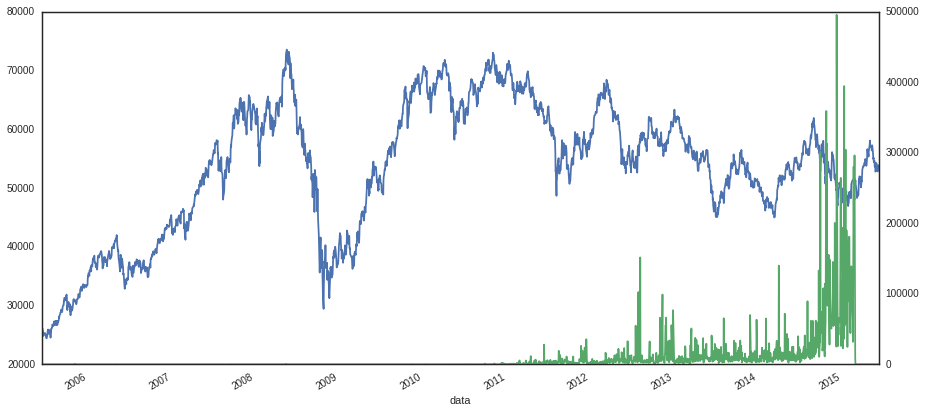

In [147]:
serieQtFacebook = Series(qtNoticias.Facebook, index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtFacebook' : serieQtFacebook})
df.ibovespa.plot()
df.qtFacebook.plot(secondary_y=True, style='g', figsize=(15, 7))

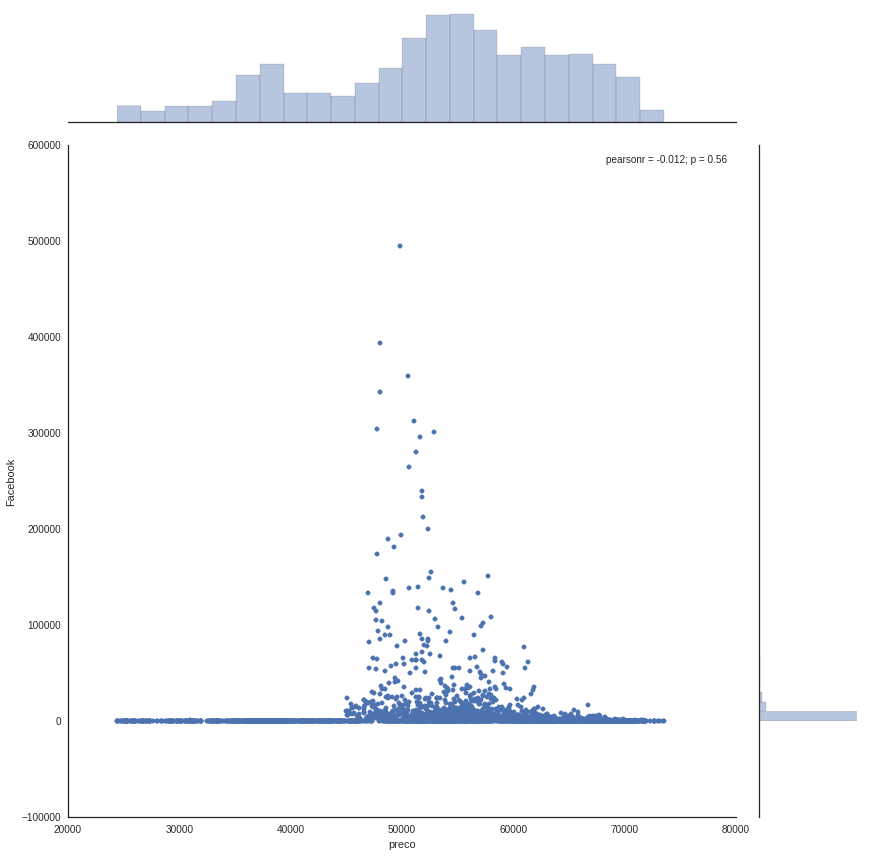

In [148]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Facebook': qtNoticias.Facebook})
g = sns.jointplot(x="preco", y="Facebook", data=df, size=12)

In [149]:
z,pval = mstats.normaltest(qtNoticias.Facebook)
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [150]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.Facebook)

print tau
print p_value

0.140476610468
1.1444743049e-25


In [ ]:
"""
6.4.2 - Análise de Correlação entre QUANTIDADE DE Facebook G1 e o índice Ibovespa.

"""

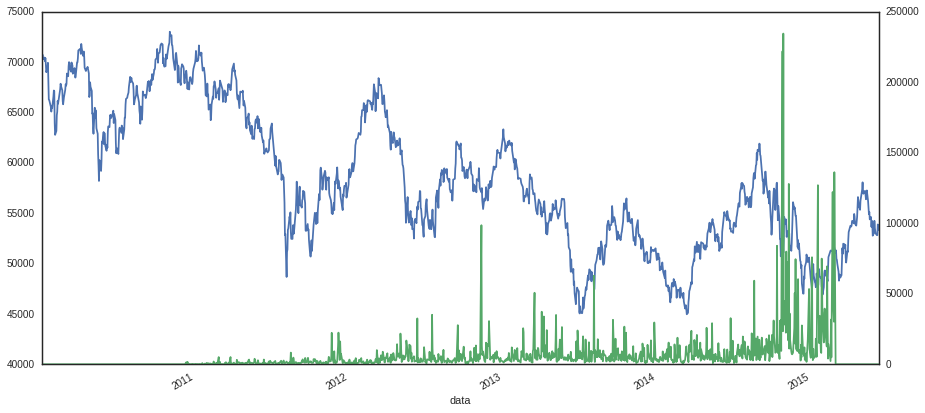

In [151]:
qtNoticiasPorJornal_G1 = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['G1'])]

serieQtFacebook_G1 = Series(qtNoticiasPorJornal_G1.Facebook, index=qtNoticiasPorJornal_G1.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qFacebook_G1' : serieQtFacebook_G1['2010':'2015']})
df.ibovespa.plot()
df.qFacebook_G1.plot(secondary_y=True, style='g', figsize=(15, 7))

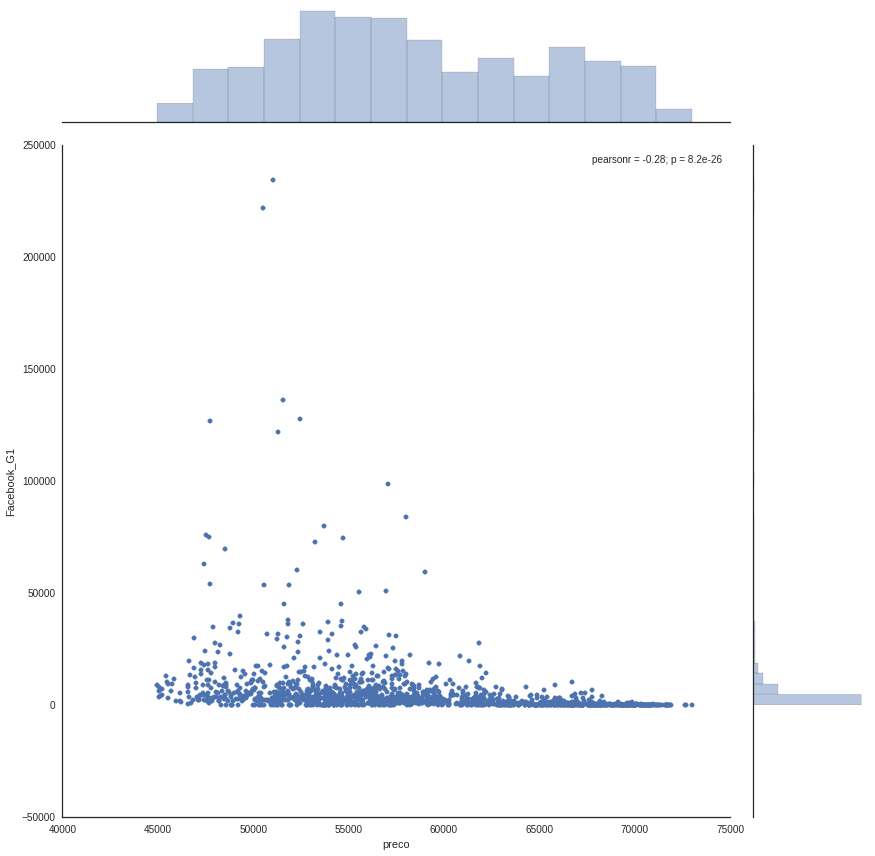

In [152]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Facebook_G1': qtNoticiasPorJornal_G1.Facebook['2010':'2015']})
g = sns.jointplot(x="preco", y="Facebook_G1", data=df, size=12)

In [153]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_G1.Facebook['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [155]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticias.Facebook['2010':'2015'])

print tau
print p_value

-0.423350183071
4.22031826164e-120


In [ ]:
"""
6.4.3 - Análise de Correlação entre QUANTIDADE DE Facebook FOLHA e o índice Ibovespa.

"""

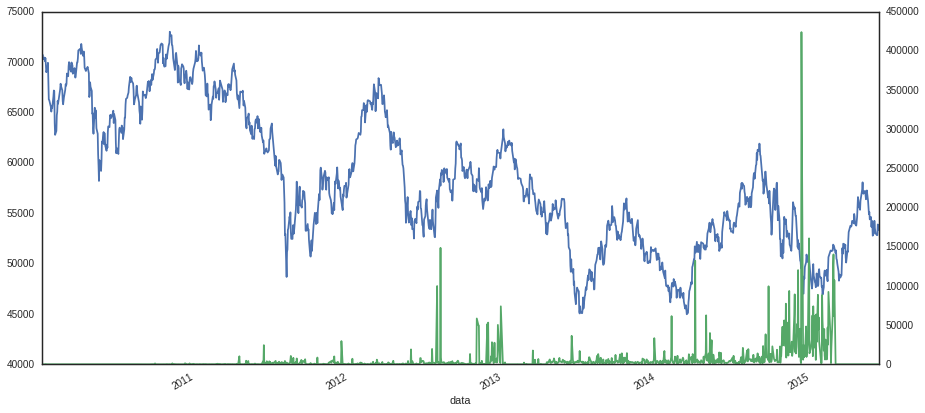

In [157]:
qtNoticiasPorJornal_FOLHA = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['FOLHASP'])]

serieQtFacebook_FOLHA = Series(qtNoticiasPorJornal_FOLHA.Facebook, index=qtNoticiasPorJornal_FOLHA.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qFacebook_FOLHA' : serieQtFacebook_FOLHA['2010':'2015']})
df.ibovespa.plot()
df.qFacebook_FOLHA.plot(secondary_y=True, style='g', figsize=(15, 7))

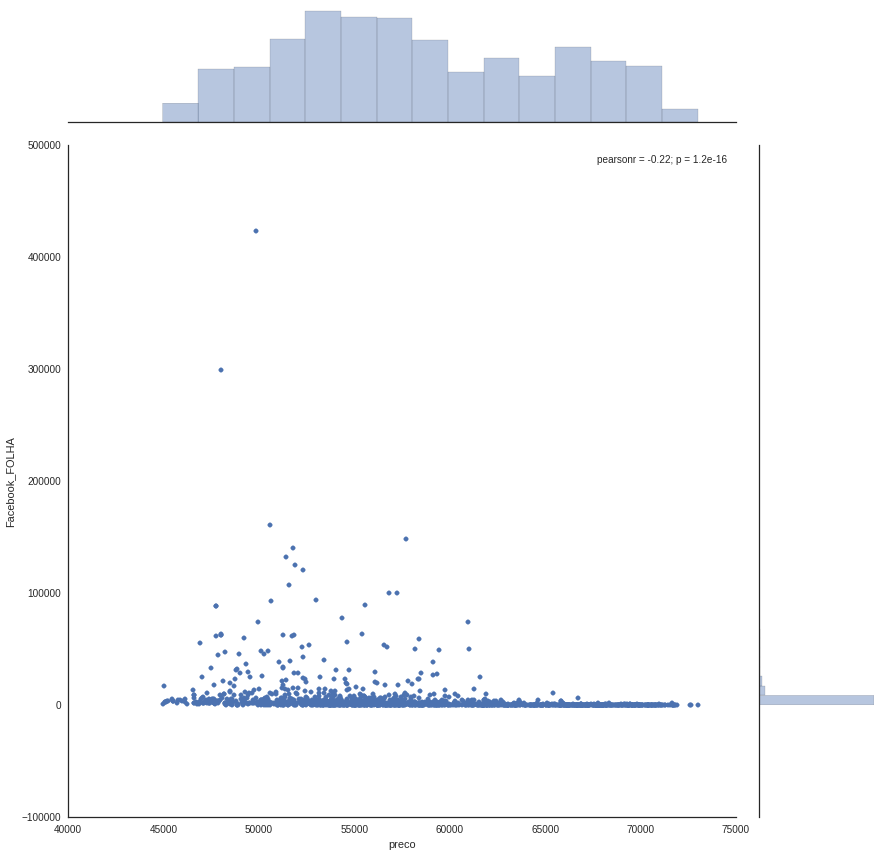

In [158]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'Facebook_FOLHA': qtNoticiasPorJornal_FOLHA.Facebook['2010':'2015']})
g = sns.jointplot(x="preco", y="Facebook_FOLHA", data=df, size=12)

In [159]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_FOLHA.Facebook['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [160]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_FOLHA.Facebook['2010':'2015'])

print tau
print p_value

-0.386174464534
2.90878547252e-100


In [ ]:
"""
6.4.4 - Análise de Correlação entre QUANTIDADE DE Facebook ESTADAO e o índice Ibovespa.

"""

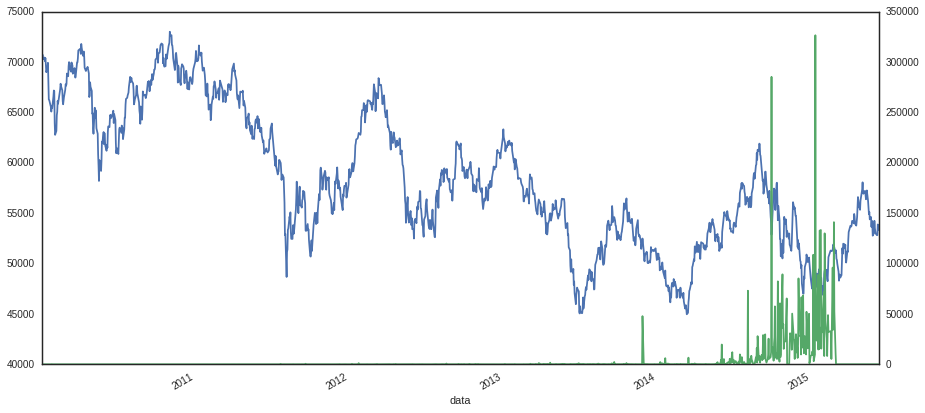

In [163]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]

serieQtFacebook_ESTADAO = Series(qtNoticiasPorJornal_ESTADAO.Facebook, index=qtNoticiasPorJornal_ESTADAO.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qFacebook_FOLHA' : serieQtFacebook_ESTADAO['2010':'2015']})
df.ibovespa.plot()
df.qFacebook_FOLHA.plot(secondary_y=True, style='g', figsize=(15, 7))

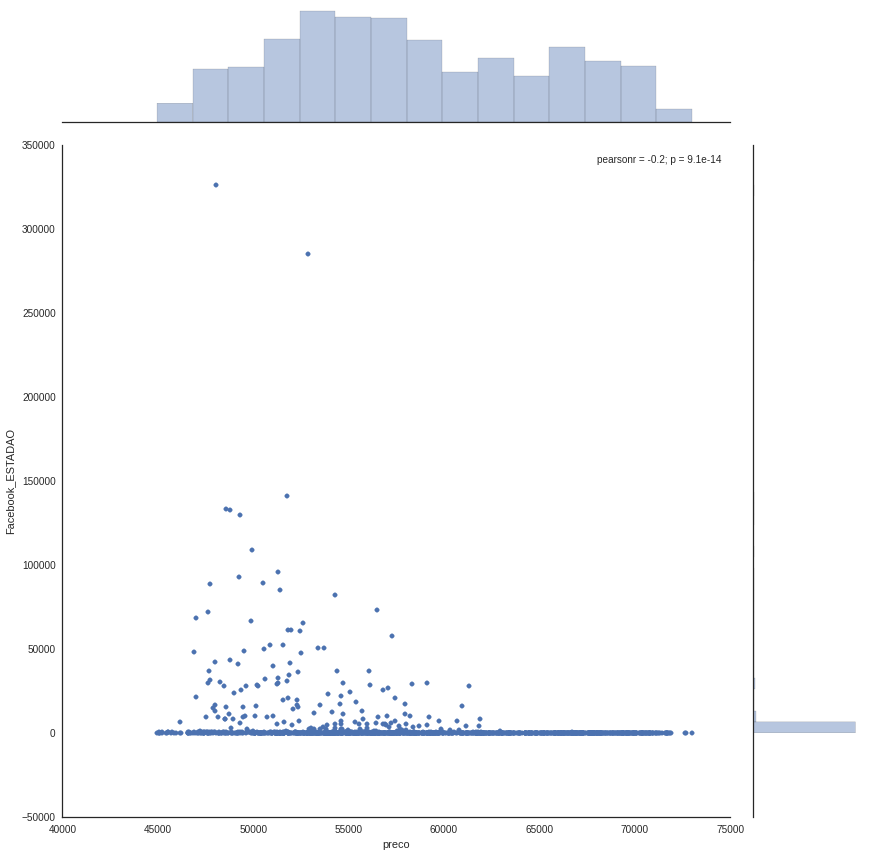

In [164]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'Facebook_ESTADAO': qtNoticiasPorJornal_ESTADAO.Facebook['2010':'2015']})
g = sns.jointplot(x="preco", y="Facebook_ESTADAO", data=df, size=12)

In [165]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.Facebook['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [166]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.Facebook['2010':'2015'])

print tau
print p_value

-0.41483067967
2.14768697735e-115


In [ ]:
"""
6.5 - Análise de Correlação entre QUANTIDADE DE LinkedIn e o índice Ibovespa.

"""

In [ ]:
"""
6.5.1 - Análise de Correlação entre QUANTIDADE DE LinkedIn e o índice Ibovespa para todas as informacoes

"""

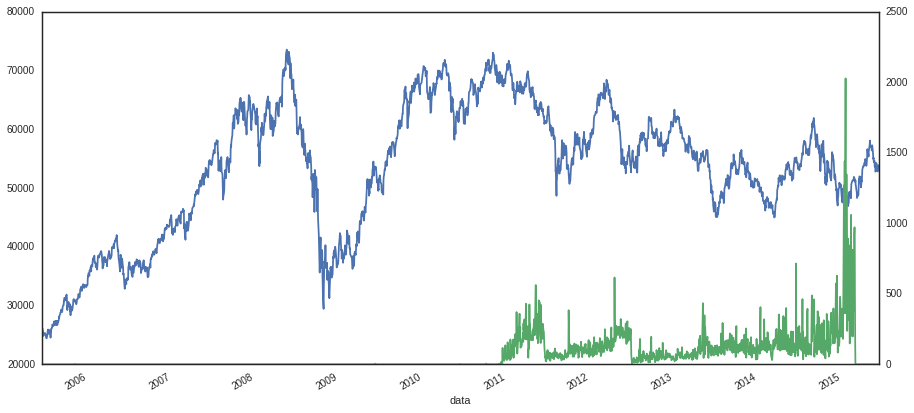

In [167]:
serieQtLinkedIn = Series(qtNoticias.LinkedIn, index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtLinkedIn' : serieQtLinkedIn})
df.ibovespa.plot()
df.qtLinkedIn.plot(secondary_y=True, style='g', figsize=(15, 7))

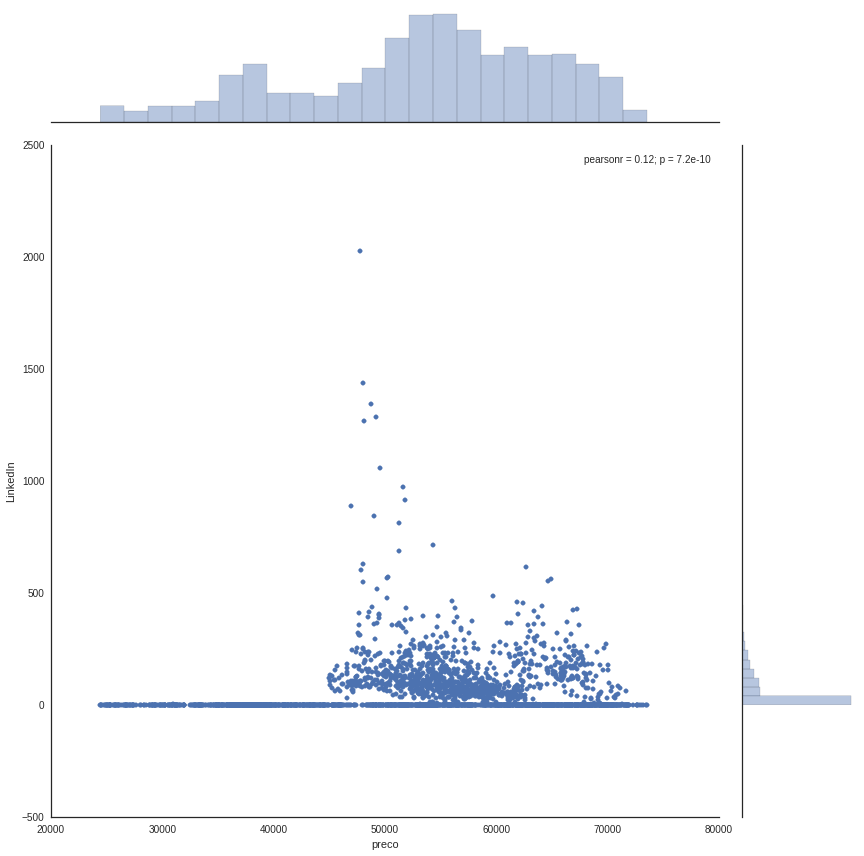

In [168]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'LinkedIn': qtNoticias.LinkedIn})
g = sns.jointplot(x="preco", y="LinkedIn", data=df, size=12)

In [169]:
z,pval = mstats.normaltest(qtNoticias.LinkedIn)
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [170]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.LinkedIn)

print tau
print p_value

0.120880606498
2.01589473137e-19


In [ ]:
"""
6.5.2 - Análise de Correlação entre QUANTIDADE DE LinkedIn G1 e o índice Ibovespa.

"""

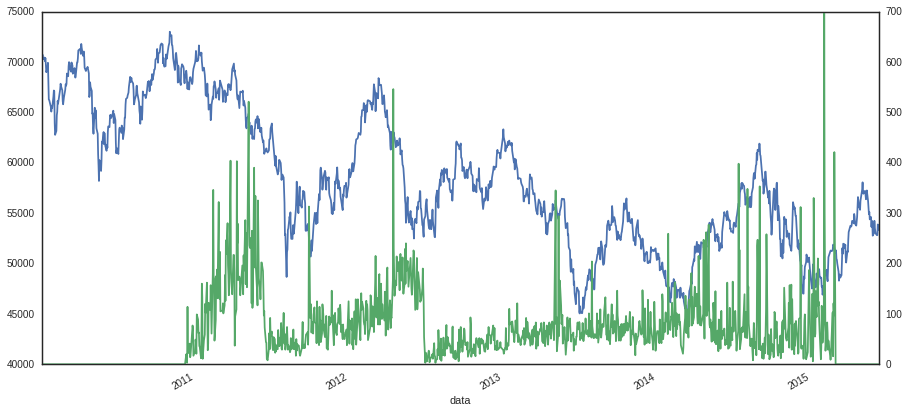

In [171]:
qtNoticiasPorJornal_G1 = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['G1'])]

serieQtLinkedIn_G1 = Series(qtNoticiasPorJornal_G1.LinkedIn, index=qtNoticiasPorJornal_G1.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qLinkedIn_G1' : serieQtLinkedIn_G1['2010':'2015']})
df.ibovespa.plot()
df.qLinkedIn_G1.plot(secondary_y=True, style='g', figsize=(15, 7))

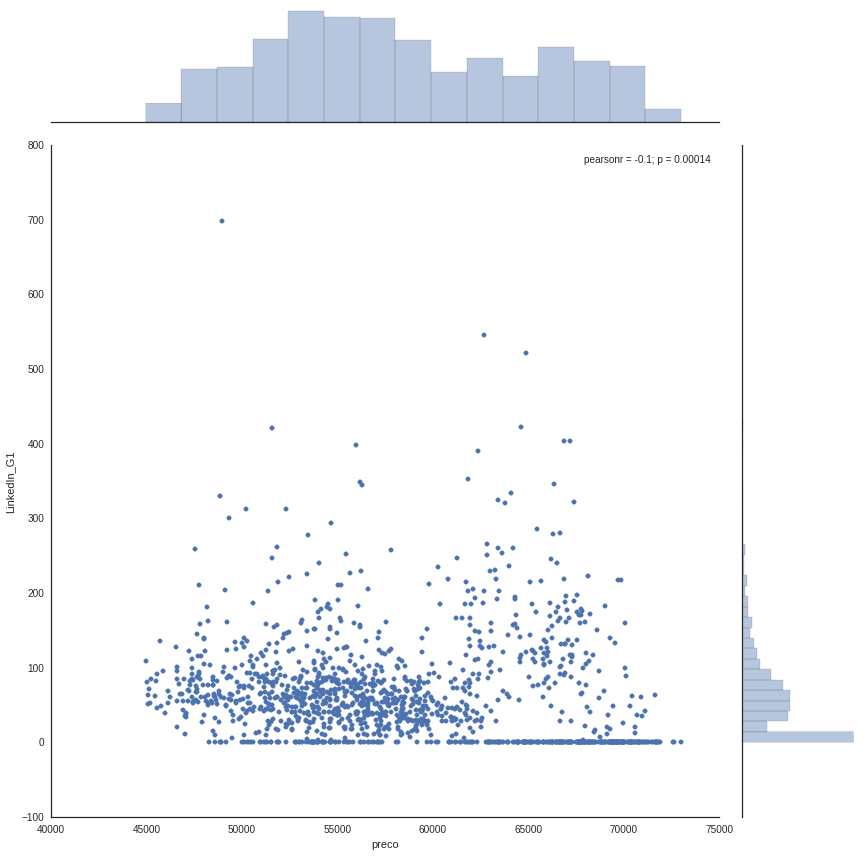

In [173]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'LinkedIn_G1': qtNoticiasPorJornal_G1.LinkedIn['2010':'2015']})
g = sns.jointplot(x="preco", y="LinkedIn_G1", data=df, size=12)

In [174]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_G1.LinkedIn['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [175]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_G1.LinkedIn['2010':'2015'])

print tau
print p_value

-0.169905589457
8.60296331863e-21


In [ ]:
"""
6.5.3 - Análise de Correlação entre QUANTIDADE DE LinkedIn FOLHA e o índice Ibovespa.

"""

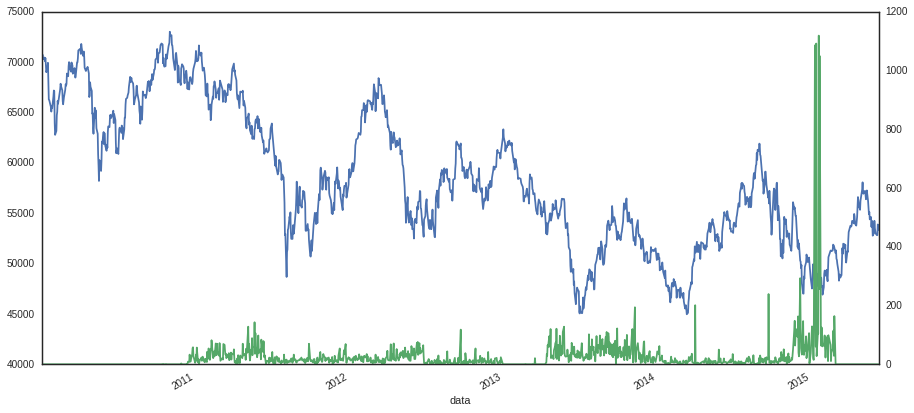

In [176]:
qtNoticiasPorJornal_FOLHA = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['FOLHASP'])]

serieQtLinkedIn_FOLHA = Series(qtNoticiasPorJornal_FOLHA.LinkedIn, index=qtNoticiasPorJornal_FOLHA.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qLinkedIn_FOLHA' : serieQtLinkedIn_FOLHA['2010':'2015']})
df.ibovespa.plot()
df.qLinkedIn_FOLHA.plot(secondary_y=True, style='g', figsize=(15, 7))

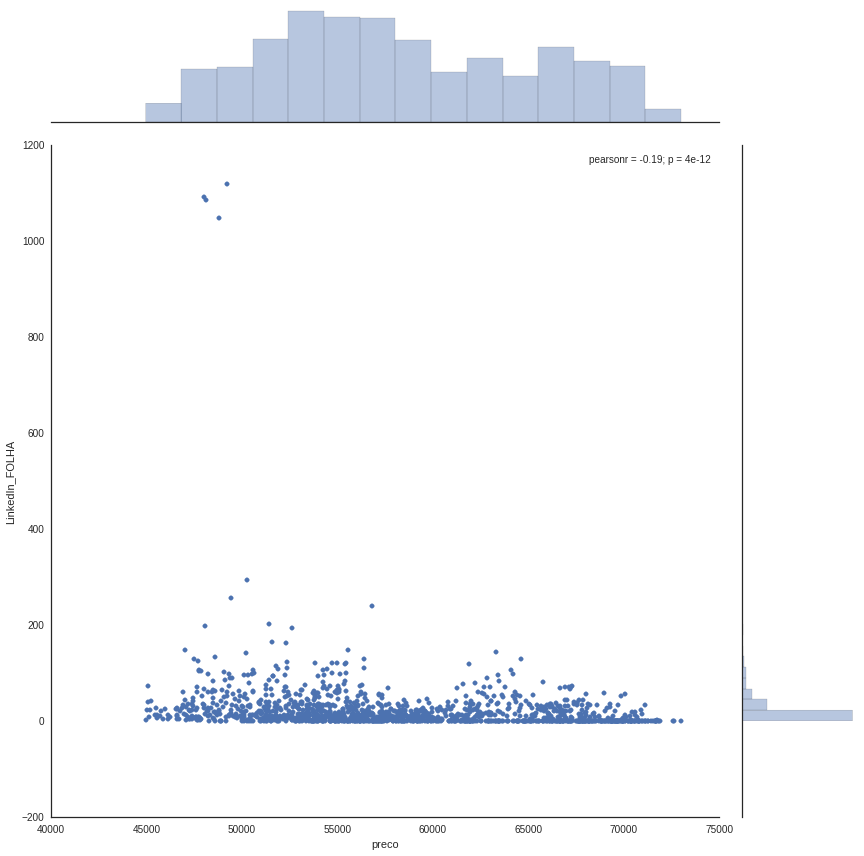

In [178]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'LinkedIn_FOLHA': qtNoticiasPorJornal_FOLHA.LinkedIn['2010':'2015']})
g = sns.jointplot(x="preco", y="LinkedIn_FOLHA", data=df, size=12)

In [179]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_FOLHA.LinkedIn['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [180]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_FOLHA.LinkedIn['2010':'2015'])

print tau
print p_value

-0.246985391501
4.31055317452e-42


In [ ]:
"""
6.5.4 - Análise de Correlação entre QUANTIDADE DE LinkedIn ESTADAO e o índice Ibovespa.

"""

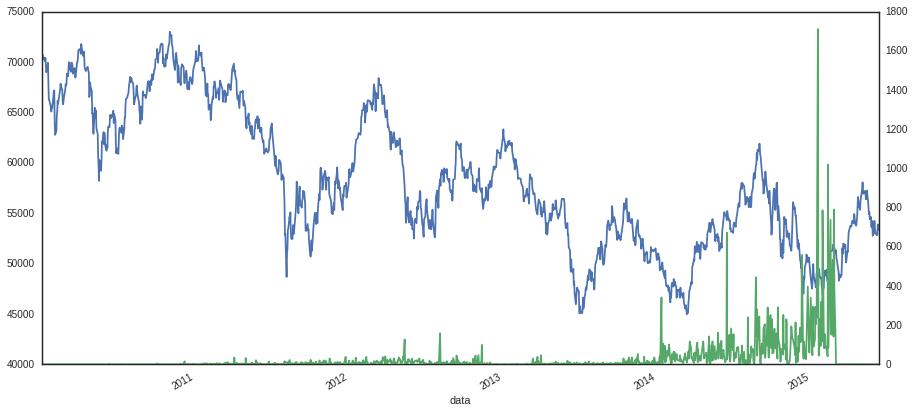

In [181]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]

serieQtLinkedIn_ESTADAO = Series(qtNoticiasPorJornal_ESTADAO.LinkedIn, index=qtNoticiasPorJornal_ESTADAO.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qLinkedIn_ESTADAO' : serieQtLinkedIn_ESTADAO['2010':'2015']})
df.ibovespa.plot()
df.qLinkedIn_ESTADAO.plot(secondary_y=True, style='g', figsize=(15, 7))

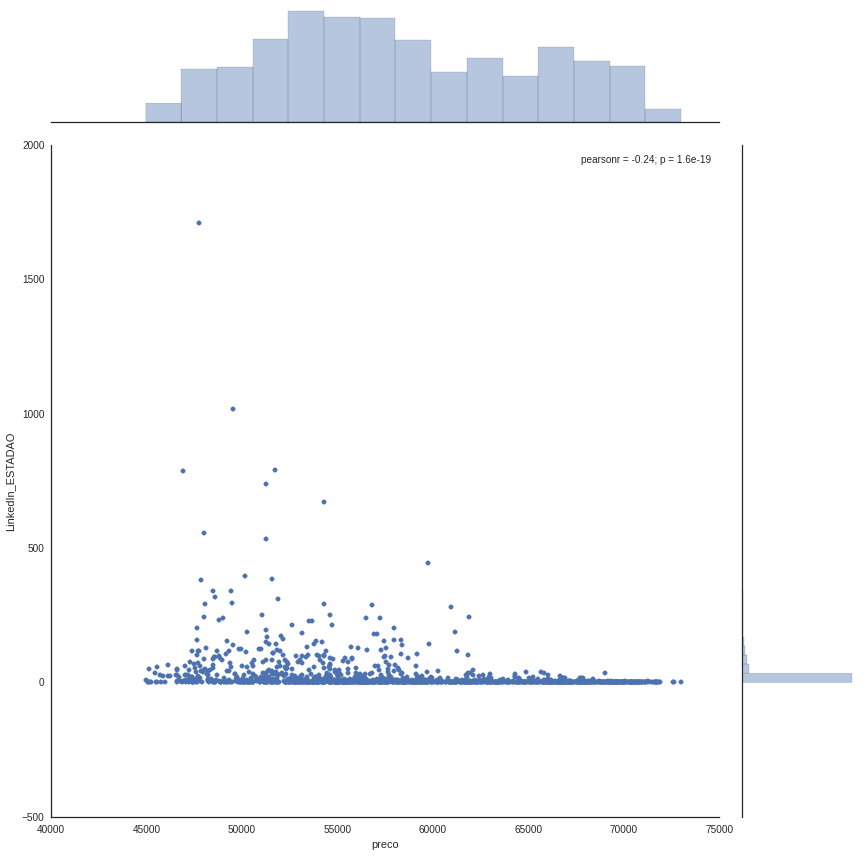

In [182]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'LinkedIn_ESTADAO': qtNoticiasPorJornal_ESTADAO.LinkedIn['2010':'2015']})
g = sns.jointplot(x="preco", y="LinkedIn_ESTADAO", data=df, size=12)

In [183]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.LinkedIn['2010':'2015'])

if(pval < 0.055):
    print "Not normal distribution"

Not normal distribution


In [184]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.LinkedIn['2010':'2015'])

print tau
print p_value

-0.342272604225
3.58852940182e-79


In [ ]:
"""
6.6 - Análise de Correlação entre QUANTIDADE DE GooglePlus e o índice Ibovespa.

"""

In [ ]:
"""
6.6.1 - Análise de Correlação entre QUANTIDADE DE GooglePlus e o índice Ibovespa para todas as informacoes.

"""

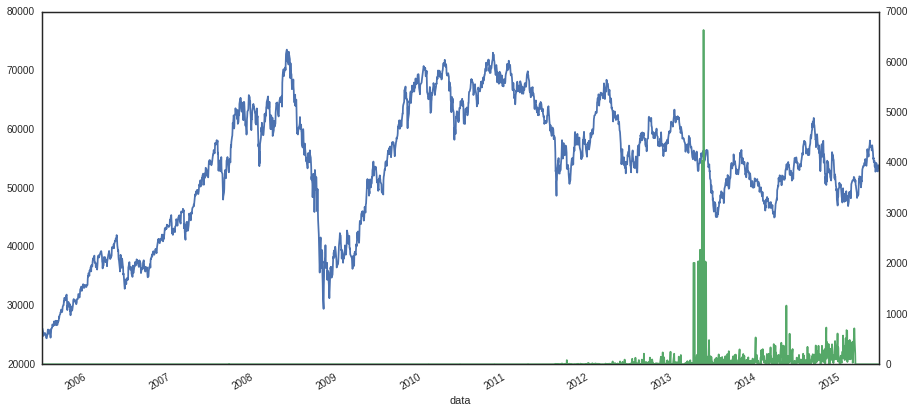

In [189]:
serieQtGooglePlus = Series(qtNoticias.GooglePlus, index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtGooglePlus' : serieQtGooglePlus})
df.ibovespa.plot()
df.qtGooglePlus.plot(secondary_y=True, style='g', figsize=(15, 7))

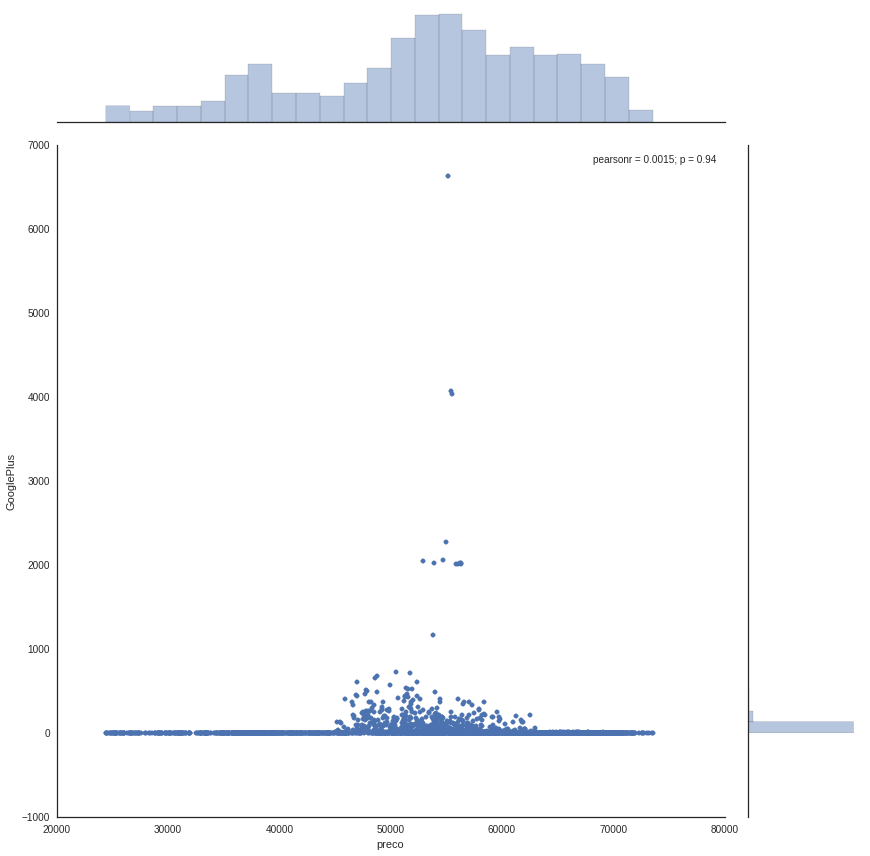

In [190]:
import seaborn as sns; 
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'GooglePlus': qtNoticias.GooglePlus})
g = sns.jointplot(x="preco", y="GooglePlus", data=df, size=12)

In [191]:
z,pval = mstats.normaltest(qtNoticias.GooglePlus)
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [192]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.GooglePlus)

print tau
print p_value

-0.00888870080372
0.507517524689


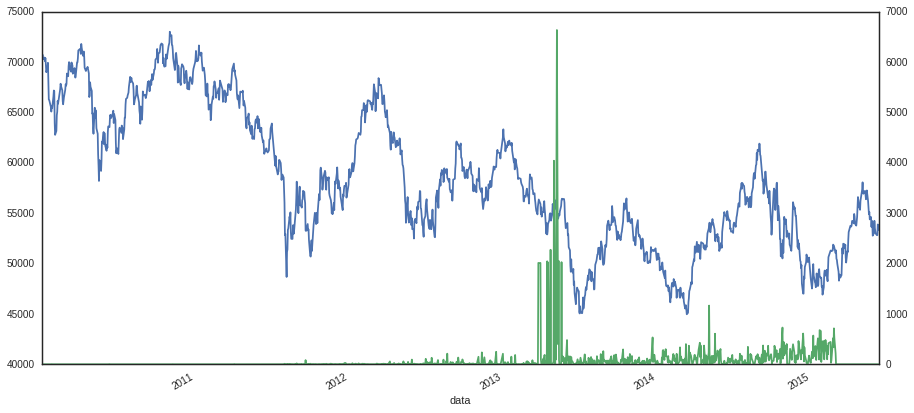

In [193]:
serieQtGooglePlus = Series(qtNoticias.GooglePlus['2010':'2015'], index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 'qtGooglePlus' : serieQtGooglePlus['2010':'2015']})
df.ibovespa.plot()
df.qtGooglePlus.plot(secondary_y=True, style='g', figsize=(15, 7))

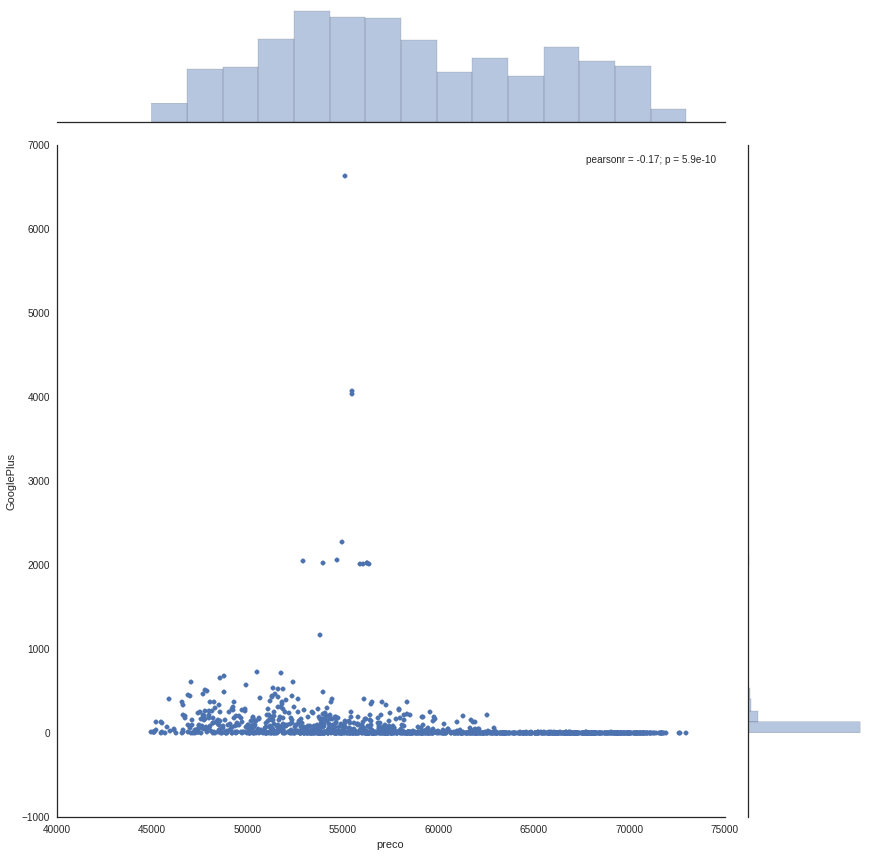

In [194]:
import seaborn as sns; 
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'GooglePlus': qtNoticias.GooglePlus['2010':'2015']})
g = sns.jointplot(x="preco", y="GooglePlus", data=df, size=12)

In [195]:
z,pval = mstats.normaltest(qtNoticias.GooglePlus['2010':'2015'])
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [196]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticias.GooglePlus['2010':'2015'])

print tau
print p_value

-0.468263256279
1.72550503791e-146


In [ ]:
"""
6.6.2 - Análise de Correlação entre QUANTIDADE DE GooglePlus ESTADAO e o índice Ibovespa.

"""

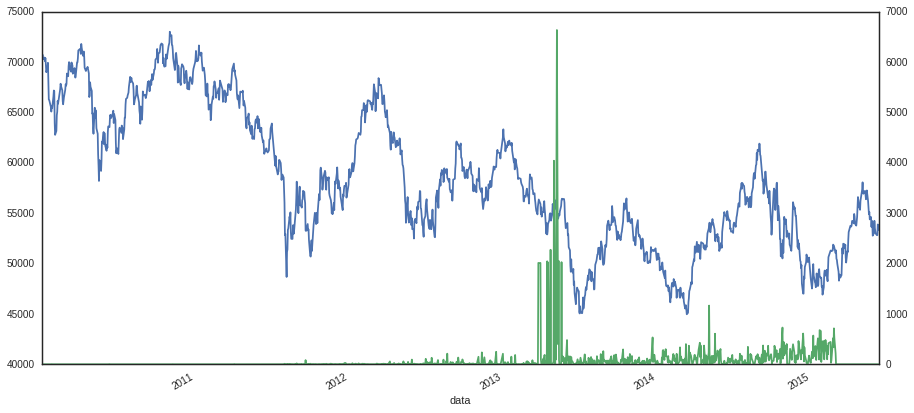

In [200]:
qtNoticiasPorJornal_ESTADAO = qtNoticiasPorJornal[qtNoticiasPorJornal.Jornal.isin(['ESTADAO'])]

serieQtGooglePlus_ESTADAO = Series(qtNoticiasPorJornal_ESTADAO.GooglePlus, index=qtNoticiasPorJornal_ESTADAO.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtGooglePlus_ESTADAO' : serieQtGooglePlus_ESTADAO['2010':'2015']})
df.ibovespa.plot()
df.qtGooglePlus_ESTADAO.plot(secondary_y=True, style='g', figsize=(15, 7))

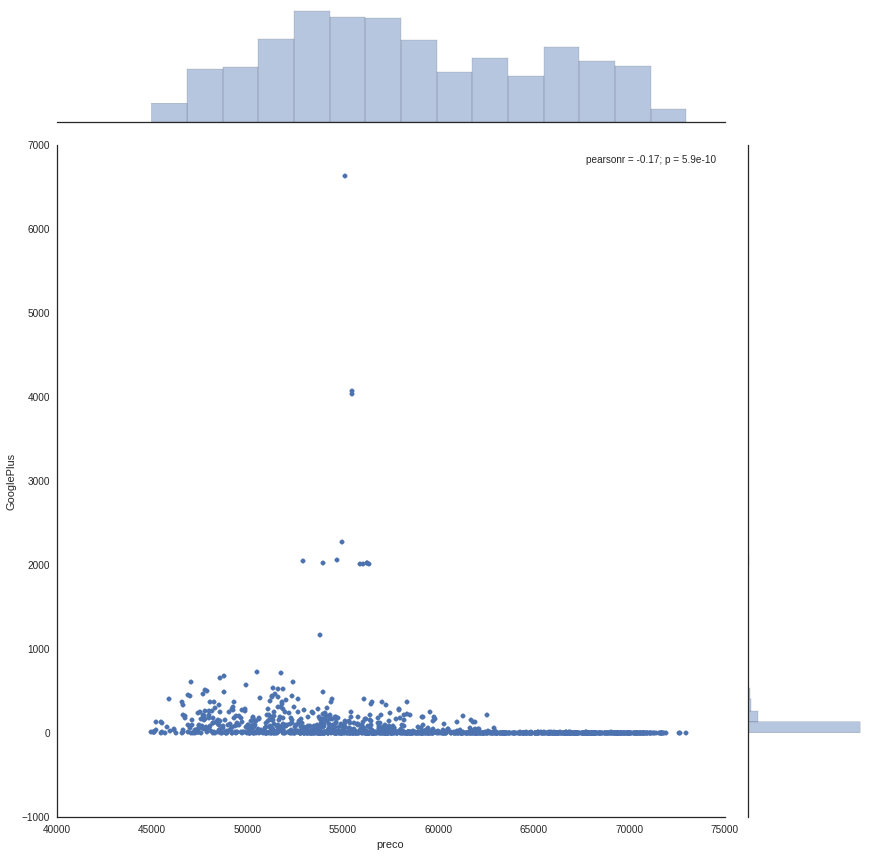

In [199]:
import seaborn as sns; 
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'GooglePlus': qtNoticias.GooglePlus['2010':'2015']})
g = sns.jointplot(x="preco", y="GooglePlus", data=df, size=12)

In [198]:
z,pval = mstats.normaltest(qtNoticiasPorJornal_ESTADAO.GooglePlus['2010':'2015'])
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [197]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtNoticiasPorJornal_ESTADAO.GooglePlus['2010':'2015'])

print tau
print p_value

-0.468263256279
1.72550503791e-146


In [ ]:
"""
6.7 - Análise de Correlação entre QUANTIDADE DE TotalRepercussao e o índice Ibovespa.

"""

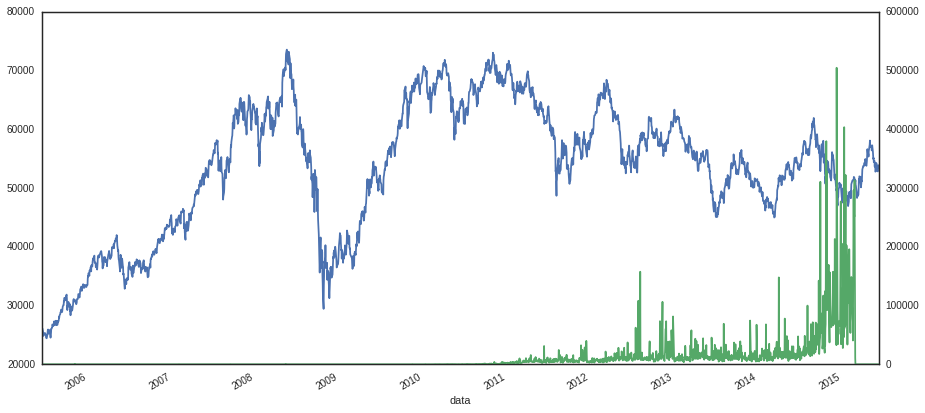

In [185]:
serieQtTotalRepercussao = Series(qtNoticias.TotalRepercussao, index=qtNoticias.index)
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtTotalRepercussao' : serieQtTotalRepercussao})
df.ibovespa.plot()
df.qtTotalRepercussao.plot(secondary_y=True, style='g', figsize=(15, 7))

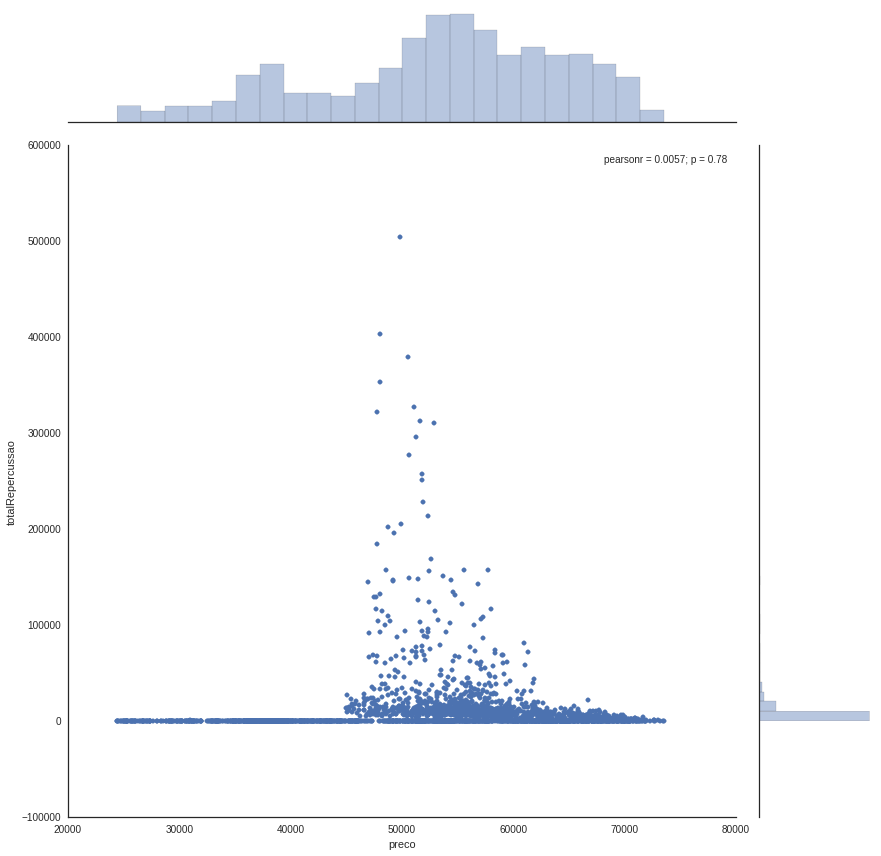

In [186]:
sns.set(style="white", color_codes=True)
df = DataFrame({'preco': ibovespa.preco, 'totalRepercussao': qtNoticias.TotalRepercussao})
g = sns.jointplot(x="preco", y="totalRepercussao", data=df, size=12)


In [187]:
z,pval = mstats.normaltest(qtNoticias.TotalRepercussao)
print pval
if(pval < 0.055):
    print "Not normal distribution"

0.0
Not normal distribution


In [188]:
tau, p_value = kendalltau(ibovespa.preco, qtNoticias.TotalRepercussao)

print tau
print p_value

0.17244182861
7.89603230844e-38


In [ ]:
"""
6.8 - Análise entre Correlação e Polaridade

"""

In [ ]:
"""
6.8.1 - Análise de Correlação entre QUANTIDADE de noticias positivas e o índice Ibovespa.

"""

In [3]:
ibovespa = pd.read_csv(path+'PhD/src/scriptsPython/correlacao/indices/IndiceIbovespa.csv', index_col='data', 
                       dayfirst=True, parse_dates=True)

ibovespa = ibovespa.reindex(index=ibovespa.index[::-1])

polaridade = pd.read_csv(path+'PhD/src/scriptsPython/correlacao/polaridade/noticiasPolaridadeGeral.csv',
                             index_col='Data',
                             dayfirst=True, parse_dates=True)

In [4]:
qtPolaridade = polaridade[polaridade.index.isin(ibovespa.index)]

print qtPolaridade.index.values
print ibovespa.index.values

['2005-06-15T21:00:00.000000000-0300' '2005-06-16T21:00:00.000000000-0300'
 '2005-06-19T21:00:00.000000000-0300' ...,
 '2015-06-09T21:00:00.000000000-0300' '2015-06-10T21:00:00.000000000-0300'
 '2015-06-11T21:00:00.000000000-0300']
['2005-06-15T21:00:00.000000000-0300' '2005-06-16T21:00:00.000000000-0300'
 '2005-06-19T21:00:00.000000000-0300' ...,
 '2015-06-09T21:00:00.000000000-0300' '2015-06-10T21:00:00.000000000-0300'
 '2015-06-11T21:00:00.000000000-0300']


In [7]:
serieIbovespaPreco = Series(ibovespa.preco, index=ibovespa.index)
serieQtNoticiasPositivas = Series(qtPolaridade.Positivas, index=qtPolaridade.index)

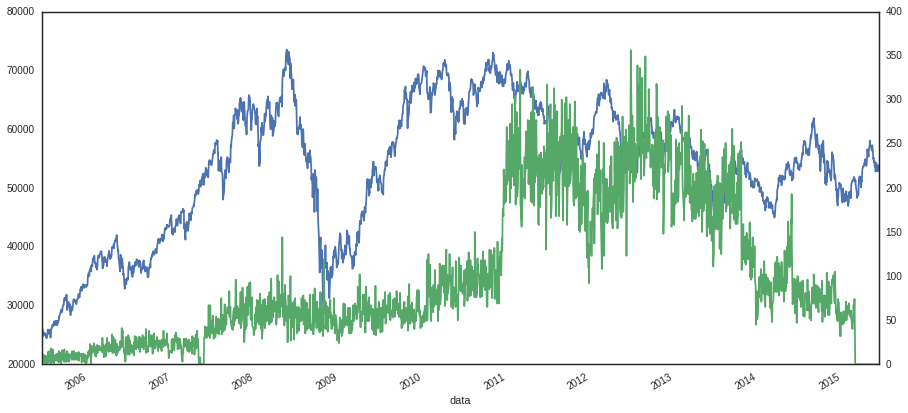

In [12]:
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtNoticiasPositivas' : serieQtNoticiasPositivas})
df.ibovespa.plot()
df.qtNoticiasPositivas.plot(secondary_y=True, style='g', figsize=(15, 7))

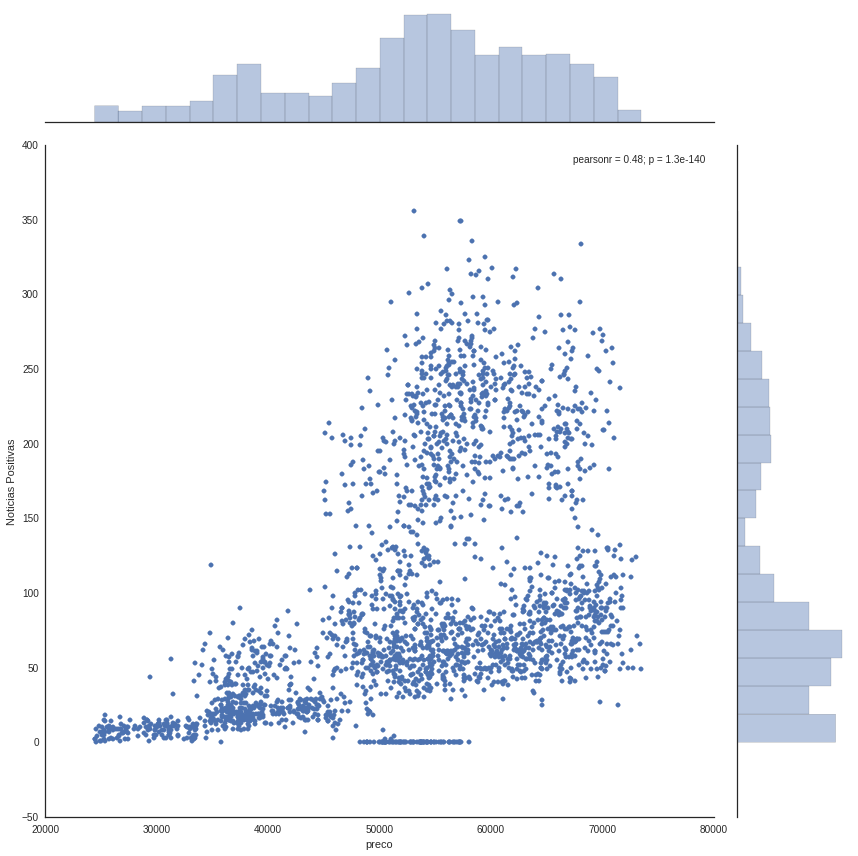

In [11]:
import seaborn as sns; 
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Noticias Positivas': qtPolaridade.Positivas})
g = sns.jointplot(x="preco", y="Noticias Positivas", data=df, size=12)

In [15]:
z,pval = mstats.normaltest(qtPolaridade.Positivas)
print pval
if(pval < 0.055):
    print "Not normal distribution"

8.58646149644e-59
Not normal distribution


In [16]:
tau, p_value = kendalltau(ibovespa.preco, qtPolaridade.Positivas)

print tau
print p_value

0.384552464872
8.82914197521e-181


In [ ]:
"""
6.8.2 - Análise de Correlação entre QUANTIDADE de noticias positivas e o índice Ibovespa apenas entre 2010 e 2015.

"""

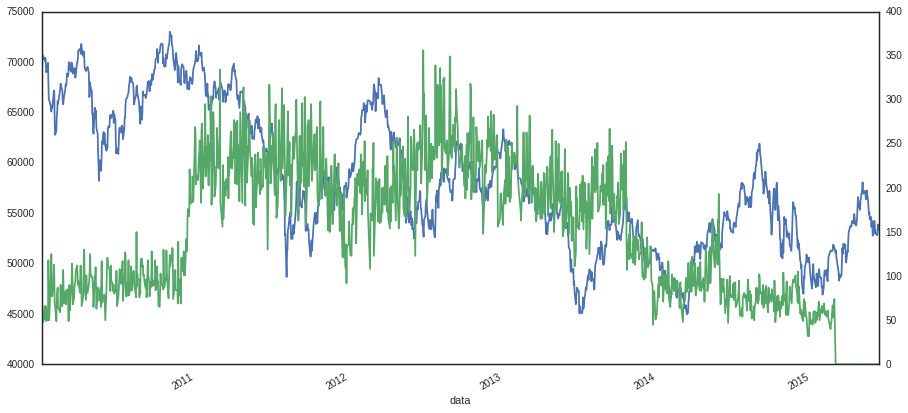

In [17]:
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtNoticiasPositivas' : serieQtNoticiasPositivas['2010':'2015']})
df.ibovespa.plot()
df.qtNoticiasPositivas.plot(secondary_y=True, style='g', figsize=(15, 7))

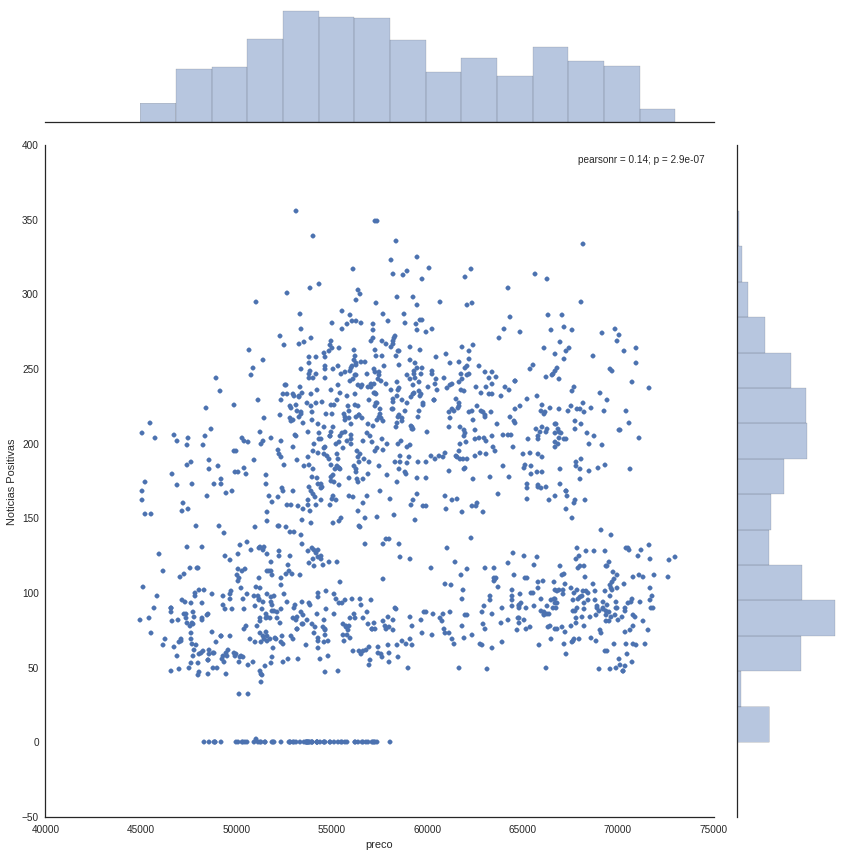

In [18]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Noticias Positivas': qtPolaridade.Positivas['2010':'2015']})
g = sns.jointplot(x="preco", y="Noticias Positivas", data=df, size=12)

In [19]:
z,pval = mstats.normaltest(qtPolaridade.Positivas['2010':'2015'])
print pval
if(pval < 0.055):
    print "Not normal distribution"

1.04156817512e-56
Not normal distribution


In [20]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtPolaridade.Positivas['2010':'2015'])

print tau
print p_value

0.115862680055
1.80199321379e-10


In [ ]:
"""
6.8.3 - Análise de Correlação entre QUANTIDADE de noticias negativas e o índice Ibovespa.

"""

In [21]:
serieQtNoticiasNegativas = Series(qtPolaridade.Negativas, index=qtPolaridade.index)

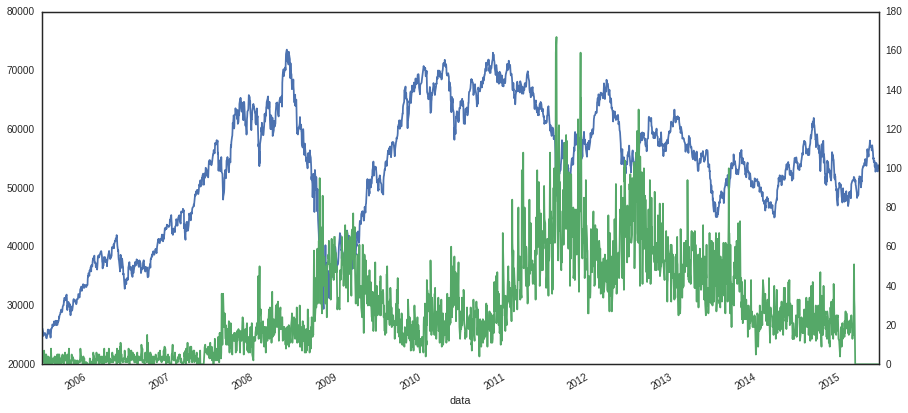

In [23]:
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtNoticiasNegativas' : serieQtNoticiasNegativas})
df.ibovespa.plot()
df.qtNoticiasNegativas.plot(secondary_y=True, style='g', figsize=(15, 7))

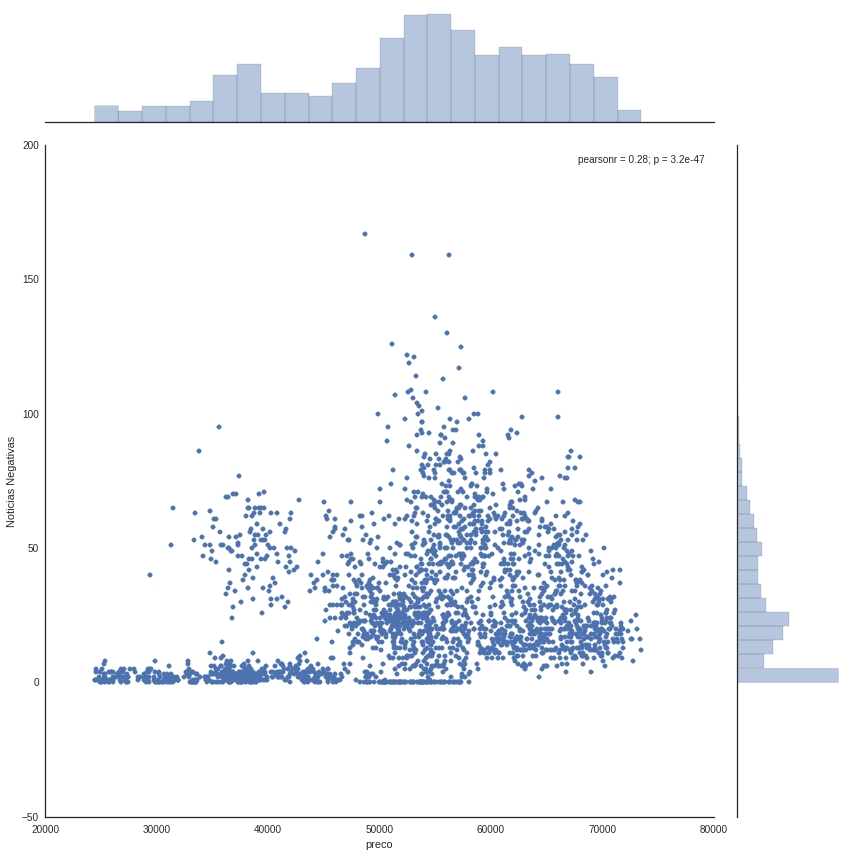

In [24]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco, 'Noticias Negativas': qtPolaridade.Negativas})
g = sns.jointplot(x="preco", y="Noticias Negativas", data=df, size=12)

In [25]:
z,pval = mstats.normaltest(qtPolaridade.Negativas)
print pval
if(pval < 0.055):
    print "Not normal distribution"

6.79585731544e-84
Not normal distribution


In [26]:
tau, p_value = kendalltau(ibovespa.preco, qtPolaridade.Negativas)

print tau
print p_value

0.211386559226
5.84600684775e-56


In [ ]:
"""
6.8.4 - Análise de Correlação entre QUANTIDADE de noticias negativas e o índice Ibovespa entre 2010 e 2015.

"""

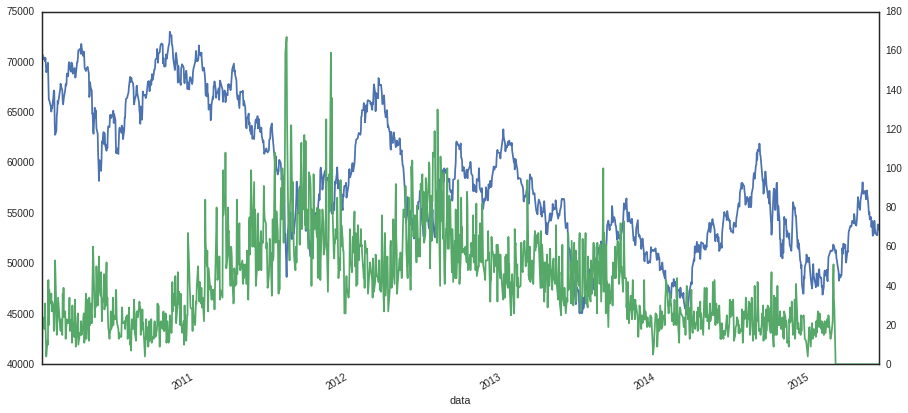

In [27]:
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtNoticiasNegativas' : serieQtNoticiasNegativas['2010':'2015']})
df.ibovespa.plot()
df.qtNoticiasNegativas.plot(secondary_y=True, style='g', figsize=(15, 7))

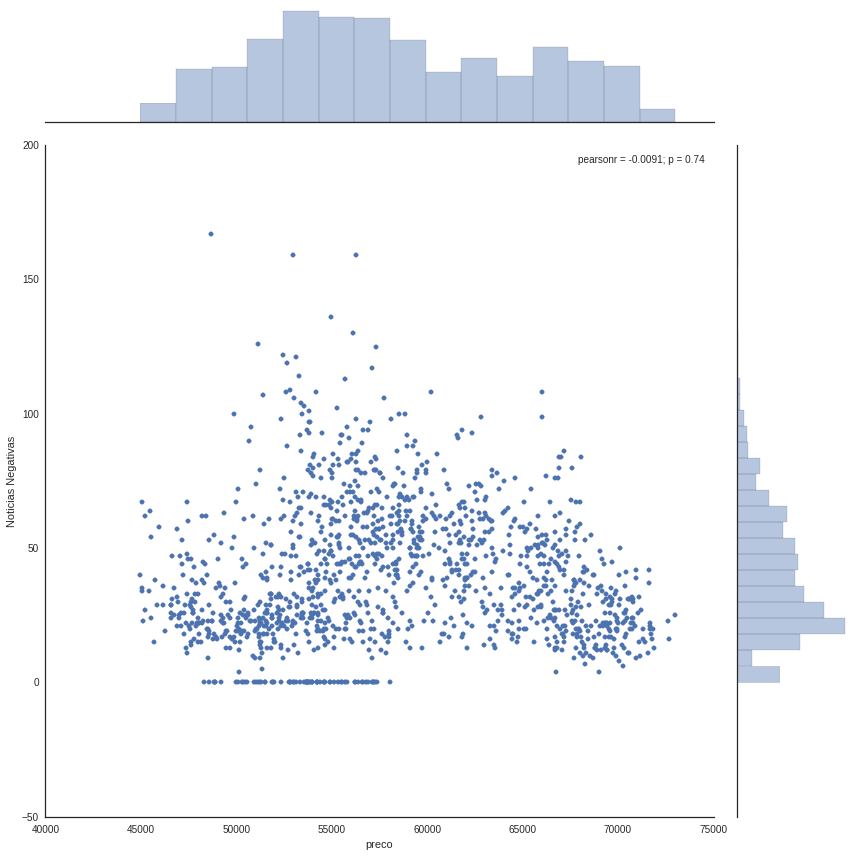

In [28]:
sns.set(style="white", color_codes=True)

df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 'Noticias Negativas': qtPolaridade.Negativas['2010':'2015']})
g = sns.jointplot(x="preco", y="Noticias Negativas", data=df, size=12)

In [29]:
z,pval = mstats.normaltest(qtPolaridade.Negativas['2010':'2015'])
print pval
if(pval < 0.055):
    print "Not normal distribution"

2.5033143811e-36
Not normal distribution


In [30]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], qtPolaridade.Negativas['2010':'2015'])

print tau
print p_value

0.0217389297213
0.231479015043


In [ ]:
"""
6.8.5 - Análise de Correlação entre a diferença entre notícias positivas e negativas

"""

In [31]:
serieQtNoticiasPos_Neg = Series((qtPolaridade.Positivas - qtPolaridade.Negativas), index=qtPolaridade.index)

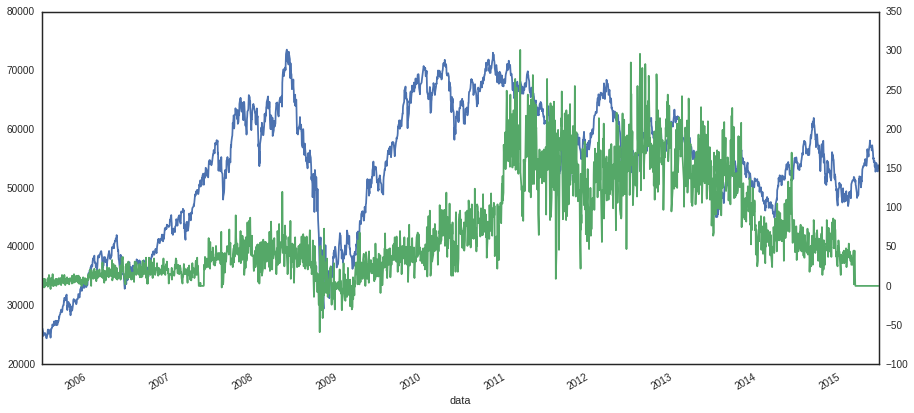

In [33]:
df = DataFrame({'ibovespa' : serieIbovespaPreco, 'qtNoticiasPos_Neg' : serieQtNoticiasPos_Neg})
df.ibovespa.plot()
df.qtNoticiasPos_Neg.plot(secondary_y=True, style='g', figsize=(15, 7))

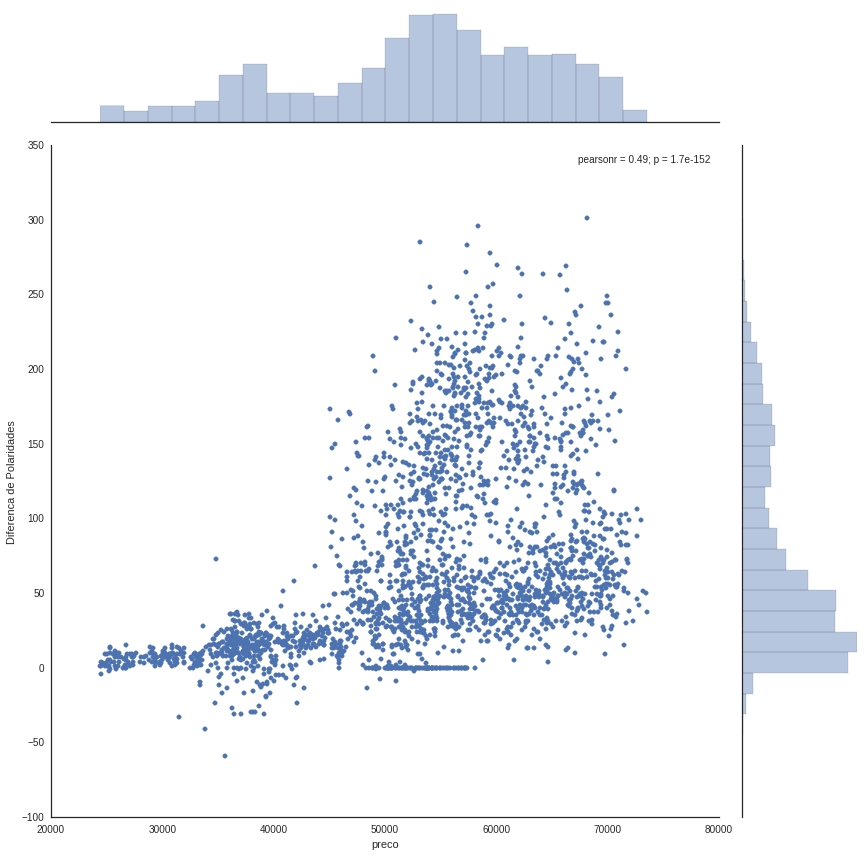

In [39]:
df = DataFrame({'preco': ibovespa.preco, 'Diferenca de Polaridades': (qtPolaridade.Positivas - qtPolaridade.Negativas)})
g = sns.jointplot(x="preco", y="Diferenca de Polaridades", data=df, size=12)

In [40]:
z,pval = mstats.normaltest((qtPolaridade.Positivas - qtPolaridade.Negativas))
print pval
if(pval < 0.055):
    print "Not normal distribution"

4.72357055999e-57
Not normal distribution


In [41]:
tau, p_value = kendalltau(ibovespa.preco, (qtPolaridade.Positivas - qtPolaridade.Negativas))

print tau
print p_value

0.40440051859
1.05396771602e-199


In [ ]:
"""
6.8.6 - Análise de Correlação entre a diferença entre notícias positivas e negativas

"""

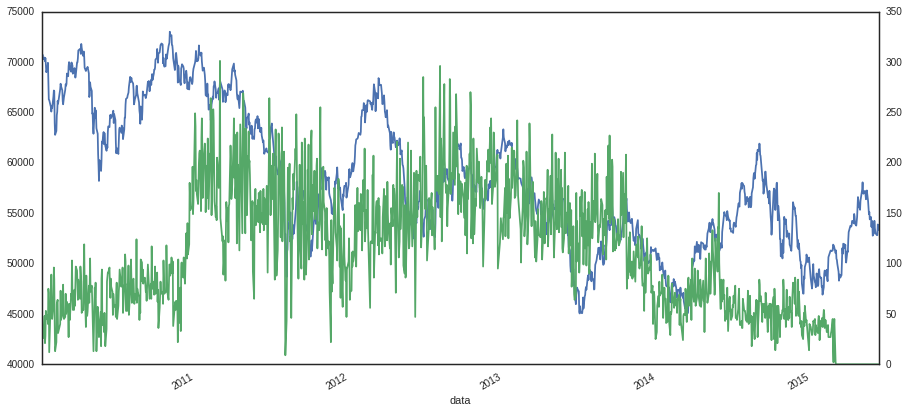

In [42]:
df = DataFrame({'ibovespa' : serieIbovespaPreco['2010':'2015'], 
                'qtNoticiasPos_Neg' : serieQtNoticiasPos_Neg['2010':'2015']})
df.ibovespa.plot()
df.qtNoticiasPos_Neg.plot(secondary_y=True, style='g', figsize=(15, 7))

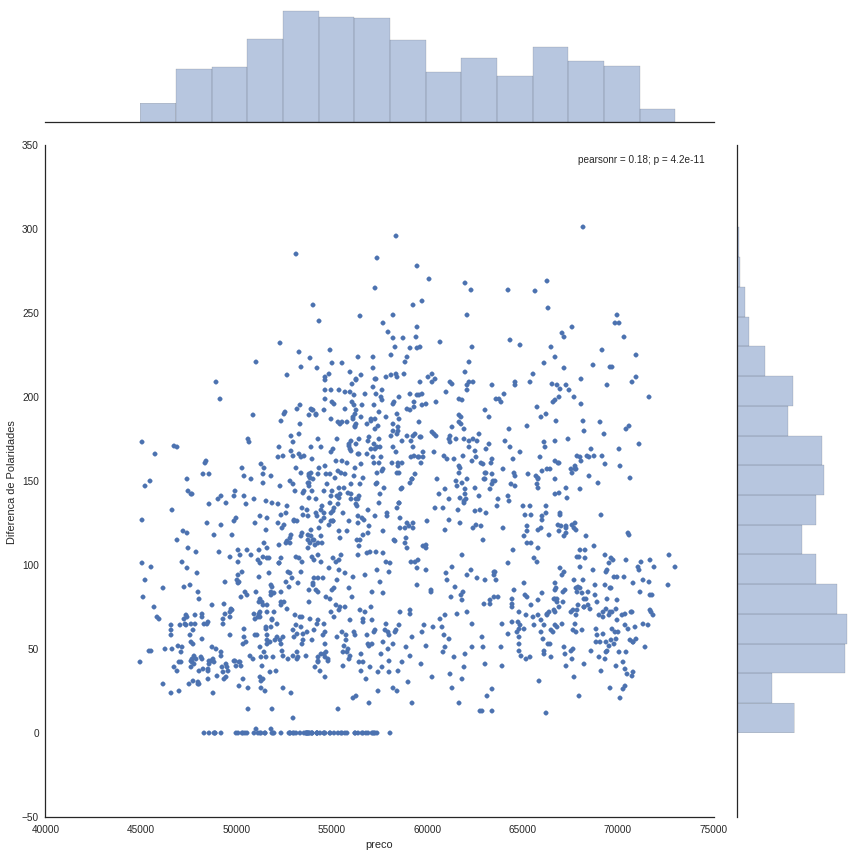

In [43]:
df = DataFrame({'preco': ibovespa.preco['2010':'2015'], 
                'Diferenca de Polaridades': (qtPolaridade.Positivas - qtPolaridade.Negativas)['2010':'2015']})
g = sns.jointplot(x="preco", y="Diferenca de Polaridades", data=df, size=12)

In [44]:
z,pval = mstats.normaltest((qtPolaridade.Positivas - qtPolaridade.Negativas)['2010':'2015'])
print pval
if(pval < 0.055):
    print "Not normal distribution"

6.15232365152e-19
Not normal distribution


In [45]:
tau, p_value = kendalltau(ibovespa.preco['2010':'2015'], 
                          (qtPolaridade.Positivas - qtPolaridade.Negativas)['2010':'2015'])

print tau
print p_value

0.136099387297
6.82445049142e-14


In [ ]:
"""

CONSTRUCAO DE UMA FLORESTA ALEATORIA

"""

In [83]:
todosAtributos = pd.read_csv(path+'PhD/src/scriptsPython/models/noticiaPorNoticia/todosAtributosPorNoticia.csv', 
                             index_col='Data', dayfirst=True, parse_dates=True)

#ibovespa = ibovespa.reindex(index=ibovespa.index[::-1])

ibovespaClasses = pd.read_csv(path+'PhD/src/scriptsPython/indices/ibovespa3Classes.csv',
                             index_col='data',
                             dayfirst=True, parse_dates=True
                             )

In [84]:
#filtramos as classes de noticias para a partir do primeiro dia que temos o registro do ibove
todosAtributos = todosAtributos.sort_index(ascending=False)
ibovespaClasses = ibovespaClasses.sort_index(ascending=False)
todosAtributos = todosAtributos['2015-03-02':'2005-06-15']
ibovespaClasses = ibovespaClasses['2015-03-02':'2005-06-15']
print ibovespaClasses.head(1)
print todosAtributos.head(1)
print ibovespaClasses.tail(1)
print todosAtributos.tail(1)

               preco variacao  quantidade classes
data                                             
2015-03-02  51020.81    -1,09     2793671       -
            DiadaSemana  Mes  Dia   Ano   Jornal  qtComentarios  qtTweets  \
Data                                                                        
2015-03-02            2    2    3  2015  ESTADAO             11       219   

            qtFacebook  qtLinkedIn  qtGooglePlus  polaridade  
Data                                                          
2015-03-02        7853          55            53           1  
               preco variacao  quantidade classes
data                                             
2005-06-16  25750.53     1,06   112945797       +
            DiadaSemana  Mes  Dia   Ano   Jornal  qtComentarios  qtTweets  \
Data                                                                        
2005-06-16            5   16    6  2005  ESTADAO              0         0   

            qtFacebook  qtLinkedIn  qtGooglePlu

In [85]:
#Transformamos a classe jornal em valor para o arquivo ficar menor.
todosAtributos.ix[todosAtributos.Jornal == 'G1', 'Jornal'] = 0
todosAtributos.ix[todosAtributos.Jornal == 'FOLHASP', 'Jornal'] = 1
todosAtributos.ix[todosAtributos.Jornal == 'ESTADAO', 'Jornal'] = 2
todosAtributos.head(10)

DiadaSemana  Mes  Dia   Ano Jornal  qtComentarios  qtTweets  \
Data                                                                      
2015-03-02            2    2    3  2015      2             11       219   
2015-03-02            2    2    3  2015      2             34       186   
2015-03-01            1    1    3  2015      2              0         8   
2015-03-01            1    1    3  2015      2              0        13   
2015-03-01            1    1    3  2015      2              1         8   
2015-03-01            1    1    3  2015      2              0         0   
2015-03-01            1    1    3  2015      2              0        39   
2015-03-01            1    1    3  2015      0              0       222   
2015-03-01            1    1    3  2015      0              0       277   
2015-03-01            1    1    3  2015      2              0         3   

            qtFacebook  qtLinkedIn  qtGooglePlus  polaridade  
Data                                                          
2015-03-02        7853          55            53           1  
2015-03-02        2436          70           164           1  
2015-03-01           0           0             0           1  
2015-03-01           0           0             0           1  
2015-03-01          38           0             2           0  
2015-03-01           0           0             0           0  
2015-03-01        1211           6             1           1  
2015-03-01        3985          19             0           1  
2015-03-01        2961           2             0          -1  
2015-03-01          26           0             0           1

In [86]:
#para cada grupo de noticias que ocorreram no mesmo dia do bovespa, recebem o valor da classe do dia.
ibovespaClasses = ibovespaClasses.reset_index()
todosAtributos = todosAtributos.reset_index()
todosAtributos['classes'] = ""
for index, row in ibovespaClasses.iterrows():
        todosAtributos.ix[todosAtributos.Data == str(row.data), 'classes'] = row.classes

In [87]:
todosAtributos

Data  DiadaSemana  Mes  Dia   Ano Jornal  qtComentarios  \
0      2015-03-02            2    2    3  2015      2             11   
1      2015-03-02            2    2    3  2015      2             34   
2      2015-03-01            1    1    3  2015      2              0   
3      2015-03-01            1    1    3  2015      2              0   
4      2015-03-01            1    1    3  2015      2              1   
5      2015-03-01            1    1    3  2015      2              0   
6      2015-03-01            1    1    3  2015      2              0   
7      2015-03-01            1    1    3  2015      0              0   
8      2015-03-01            1    1    3  2015      0              0   
9      2015-03-01            1    1    3  2015      2              0   
10     2015-03-01            1    1    3  2015      2              0   
11     2015-03-01            1    1    3  2015      2              0   
12     2015-03-01            1    1    3  2015      2              0   
13     2015-03-01            1    1    3  2015      0              0   
14     2015-03-01            1    1    3  2015      2              0   
15     2015-03-01            1    1    3  2015      2              2   
16     2015-03-01            1    1    3  2015      2              0   
17     2015-03-01            1    1    3  2015      2              0   
18     2015-03-01            1    1    3  2015      1              6   
19     2015-03-01            1    1    3  2015      2              0   
20     2015-03-01            1    1    3  2015      0              0   
21     2015-03-01            1    1    3  2015      0              0   
22     2015-03-01            1    1    3  2015      0              0   
23     2015-03-01            1    1    3  2015      0              0   
24     2015-03-01            1    1    3  2015      0              0   
25     2015-03-01            1    1    3  2015      0              0   
26     2015-03-01            1    1    3  2015      0              0   
27     2015-03-01            1    1    3  2015      0              0   
28     2015-03-01            1    1    3  2015      2              1   
29     2015-03-01            1    1    3  2015      0              0   
...           ...          ...  ...  ...   ...    ...            ...   
439694 2005-06-19            1   19    6  2005      2              0   
439695 2005-06-19            1   19    6  2005      2              0   
439696 2005-06-19            1   19    6  2005      2              0   
439697 2005-06-19            1   19    6  2005      2              0   
439698 2005-06-19            1   19    6  2005      2              0   
439699 2005-06-18            7   18    6  2005      2              0   
439700 2005-06-18            7   18    6  2005      2              0   
439701 2005-06-18            7   18    6  2005      2              0   
439702 2005-06-17            6   17    6  2005      2              0   
439703 2005-06-17            6   17    6  2005      2              0   
439704 2005-06-17            6   17    6  2005      2              0   
439705 2005-06-17            6   17    6  2005      2              0   
439706 2005-06-17            6   17    6  2005      2              0   
439707 2005-06-17            6   17    6  2005      2              0   
439708 2005-06-17            6   17    6  2005      2              0   
439709 2005-06-17            6   17    6  2005      2              0   
439710 2005-06-17            6   17    6  2005      2              0   
439711 2005-06-17            6   17    6  2005      2              0   
439712 2005-06-17            6   17    6  2005      2              0   
439713 2005-06-16            5   16    6  2005      2              0   
439714 2005-06-16            5   16    6  2005      2              0   
439715 2005-06-16            5   16    6  2005      2              0   
439716 2005-06-16            5   16    6  2005      2              0   
439717 2005-06-16            5   16    6  2005      2

In [88]:
#Ordenamos do maior para o menor e dizemos que a classe vazia recebe o valor da ultima classe preenchida antes dela
todosAtributos = todosAtributos.sort_values(['Data'], ascending=[0])
classeAtual = ""
for index, row in todosAtributos.iterrows():
    if(todosAtributos.ix[index]['classes'] == ""):
        todosAtributos.set_value(index,'classes',classeAtual)
    else:
        classeAtual = todosAtributos.ix[index]['classes']

In [89]:
#para que todos fiquem ordenados do menor para o maior para começar o treinamento
todosAtributos = todosAtributos.set_index(['Data'])
ibovespaClasses = ibovespaClasses.set_index(['data'])
todosAtributos = todosAtributos.sort_index(ascending=True)
ibovespaClasses = ibovespaClasses.sort_index(ascending=True)

In [90]:
todosAtributos['2007-02-18':'2007-02-21']

DiadaSemana  Mes  Dia   Ano Jornal  qtComentarios  qtTweets  \
Data                                                                      
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-18            1   18    2  2007      2              0         0   
2007-02-19            2   19    2  2007      2              0         0   
2007-02-19            2   19    2  2007      2              0         0   
2007-02-19            2   19    2  2007      2              0         0   
2007-02-20            3   20    2  2007      2              0         0   
2007-02-20            3   20    2  2007      2              0         0   
2007-02-20            3   20    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   
2007-02-21            4   21    2  2007      2              0         0   

            qtFacebook  qtLinkedIn  qtGooglePlus  polaridade classes  
Data                                                                  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0          -1       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           0       =  
2007-02-18           0           0             0           1       =  
2007-02-18           0           0             0           1       =  
2007-02-19           0           0             0          -1       =  
2007-02-19           0           0             0           1       =  
2007-02-19           0           0             0           1       =  
2007-02-20           0           0             0           1       =  
2007-02-20           0           0             0           1       =  
2007-02-20           0           0             0           1       =  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           0       +  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           0       +  
2007-02-21           0           0             0           1       +  
2007-02-21           0           0             0           1     

In [91]:
todosAtributos

DiadaSemana  Mes  Dia   Ano Jornal  qtComentarios  qtTweets  \
Data                                                                      
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-16            5   16    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-17            6   17    6  2005      2              0         0   
2005-06-18            7   18    6  2005      2              0         0   
2005-06-18            7   18    6  2005      2              0         0   
2005-06-18            7   18    6  2005      2              0         0   
2005-06-19            1   19    6  2005      2              0         0   
2005-06-19            1   19    6  2005      2              0         0   
2005-06-19            1   19    6  2005      2              0         0   
2005-06-19            1   19    6  2005      2              0         0   
2005-06-19            1   19    6  2005      2              0         0   
...                 ...  ...  ...   ...    ...            ...       ...   
2015-03-01            1    1    3  2015      0              0       221   
2015-03-01            1    1    3  2015      2              0        12   
2015-03-01            1    1    3  2015      1              0       143   
2015-03-01            1    1    3  2015      2              1        44   
2015-03-01            1    1    3  2015      0              0       272   
2015-03-01            1    1    3  2015      2              0         6   
2015-03-01            1    1    3  2015      0              0       184   
2015-03-01            1    1    3  2015      0              0       675   
2015-03-01            1    1    3  2015      0              0       433   
2015-03-01            1    1    3  2015      2              0         3   
2015-03-01            1    1    3  2015      1              6        71   
2015-03-01            1    1    3  2015      2              0         4   
2015-03-01            1    1    3  2015      2              0         9   
2015-03-01            1    1    3  2015      2              2       140   
2015-03-01            1    1    3  2015      2              0        62   
2015-03-01            1    1    3  2015      0              0       106   
2015-03-01            1    1    3  2015      0              0       824   
2015-03-01            1    1    3  2015      2              0        39   
2015-03-01            1    1    3  2015      2              0         3   
2015-03-01            1    1    3  2015      0              0       277   
2015-03-01            1    1    3  20

In [92]:
ibovespaClasses

preco variacao  quantidade classes
data                                             
2005-06-16  25750.53     1,06   112945797       +
2005-06-17  26092.88     1,33   151340728       +
2005-06-20  26045.50    -0,18    74115476       =
2005-06-21  25721.68    -1,24   113727344       -
2005-06-22  25678.25    -0,17    82464035       =
2005-06-23  24815.58    -3,36   150375178       -
2005-06-24  24916.91     0,41    57685867       =
2005-06-27  25225.77     1,24    60288286       +
2005-06-28  25261.04     0,14    71917916       =
2005-06-29  25126.36    -0,53    53117276       -
2005-06-30  25051.21     -0,3    70919480       =
2005-07-01  25311.44     1,04    51030958       +
2005-07-04  25044.53    -1,05    28090739       -
2005-07-05  24674.77    -1,48   154505164       -
2005-07-06  24516.86    -0,64   135926558       -
2005-07-07  24449.51    -0,27   103321221       =
2005-07-08  24422.91    -0,11   142731315       =
2005-07-11  25015.58     2,43   100419164       +
2005-07-12  25536.25     2,08    94906429       +
2005-07-13  25855.91     1,25   107276482       +
2005-07-14  25919.95     0,25   113349703       =
2005-07-15  25221.53    -2,69    72880506       -
2005-07-18  25321.08     0,39    52167004       =
2005-07-19  25270.60     -0,2   119273000       =
2005-07-20  25704.76     1,72   130630492       +
2005-07-21  25842.37     0,54   109495808       +
2005-07-22  25391.23    -1,75   166885888       -
2005-07-25  24530.79    -3,39   218222714       -
2005-07-26  24868.47     1,38   158977792       +
2005-07-27  25337.82     1,89   150584770       +
...              ...      ...         ...     ...
2015-01-16  49016.52     2,06     3344912       +
2015-01-19  47758.01    -2,57     2096017       -
2015-01-20  47876.66     0,25     2899144       =
2015-01-21  49224.08     2,81     3561430       +
2015-01-22  49442.62     0,44     4952273       =
2015-01-23  48775.30    -1,35     3081606       -
2015-01-26  48576.55    -0,41     2774186       =
2015-01-27  48591.23     0,03     3890909       =
2015-01-28  47694.54    -1,85     4241414       -
2015-01-29  47762.24     0,14     4405476       =
2015-01-30  46907.68    -1,79     4846621       -
2015-02-02  47650.73     1,58     3247780       +
2015-02-03  48963.66     2,76     4819816       +
2015-02-04  49301.05     0,69     4811275       +
2015-02-05  49233.85    -0,14     4003968       =
2015-02-06  48792.27     -0,9     4591440       -
2015-02-09  49382.58     1,21     3658907       +
2015-02-10  48510.28    -1,77     3796049       -
2015-02-11  48239.67    -0,56     4307622       -
2015-02-12  49532.72     2,68     3828520       +
2015-02-13  50635.92     2,23     3888107       +
2015-02-18  51280.36     1,27     2940688       +
2015-02-19  51294.03     0,03     2485146       =
2015-02-20  51237.70    -0,11     2208689       =
2015-02-23  51280.64     0,08     2824504       =
2015-02-24  51874.17     1,16     3004176       +
2015-02-25  51811.02    -0,12     3477249       =
2015-02-26  51760.54     -0,1     3238977       =
2015-02-27  51583.09    -0,34     4177311       =
2015-03-02  51020.81    -1,09     2793671       -

[2404 rows x 4 columns]

In [ ]:
"""
#
# Criando arvore de decisao.
#
"""

In [104]:
"""

"""
from sklearn import tree
from scipy import stats
from sklearn.metrics import confusion_matrix

#Janela é 7, entretando, id começa de 0.
JANELA = 6
datasCompletas = todosAtributos.index.unique().tolist()
datasIboves = ibovespaClasses.index.unique()
alvos = []
predicoes = []
for i in xrange(3):
#for i in xrange(len(datasIboves)-JANELA-2):
    
    inicio,fim,teste,alvo = datasIboves[i],datasIboves[i+JANELA],datasIboves[i+JANELA+1],datasIboves[i+JANELA+2]
    treino=todosAtributos[inicio:fim]
    
    #Quando coloco o .as_matrix garanto que o indece nao participara do treino
    t=treino[treino.columns[0:11]].as_matrix()
    a=treino[['classes']].as_matrix()
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(t,a)
    
    #teste contem noticias publicadas posteriormente a hora de fechamento do ibovespa
    # e anteior a data do proximo dia de ibove
    teste = todosAtributos[datasCompletas[datasCompletas.index(fim)+1]:datasCompletas[datasCompletas.index(alvo)-1]]
    teste = teste[teste.columns[0:11]].as_matrix()

    # prever as cada linha de noticia baseado no aprendizado
    classes = clf.predict(teste)
    print classes

    # obtem a moda das classificações das noticias
    predicoes.append(stats.mode(classes)[0][0])
    # obtem a classificação do dia que quero prever
    alvo = todosAtributos[alvo:alvo]
    alvo = alvo['classes'][0]
    alvos.append(alvo)
print predicoes  
print alvos
    
result = confusion_matrix(alvos, predicoes)   
print result
somaTodosTernos = sum(sum(result))
diagonalPrincipal = sum([result[i][i]for i in xrange(len(result))])
acuracia = float(diagonalPrincipal)/somaTodosTernos
print acuracia

['=' '=' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
['+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+']
['=' '=' '=' '=' '=' '=']
['-', '+', '=']
['=', '-', '=']
[[0 0 0]
 [1 0 0]
 [0 1 1]]
0.333333333333


In [100]:
df_confusion[-1]

Alvos
-1    0
 0    2
 1    2
Name: -1, dtype: int64

In [116]:
print alvos
print predicoes

[0, -1]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)]


In [102]:
todosAtributos['2005-06-29':'2005-06-29']

DiadaSemana  Mes  Dia   Ano Jornal  qtComentarios  qtTweets  \
Data                                                                      
2005-06-29            4   29    6  2005      2              0         0   
2005-06-29            4   29    6  2005      2              0         0   
2005-06-29            4   29    6  2005      2              0         0   
2005-06-29            4   29    6  2005      2              0         0   
2005-06-29            4   29    6  2005      2              0         0   
2005-06-29            4   29    6  2005      2              0         0   

            qtFacebook  qtLinkedIn  qtGooglePlus  polaridade classes  
Data                                                                  
2005-06-29           0           0             0           1      -1  
2005-06-29           0           0             0           1      -1  
2005-06-29           0           0             0           1      -1  
2005-06-29           0           0             0           1      -1  
2005-06-29           0           0             0           1      -1  
2005-06-29           0           0             0           0      -1

In [ ]:
#janela é 7, entretando, id começa de 0.
janela = 6
datasCompletas = todosAtributos.index.unique()
datasIboves = ibovespaClasses.index.unique()
for i in xrange(len(datasIboves)-janela-2):
    inicio,fim,teste,alvo = datasIboves[i],datasIboves[i+janela],datasIboves[i+janela+1],datasIboves[i+janela+2]
    print todosAtributos[inicio:fim]
    


In [ ]:
"""
Treina com j dias, obtem o dia j+1 e tenta prever o valor do ibove no dia j+2
"""
#janela é 7, entretando, id começa de 0.
janela = 6
datas = todosAtributos.index.unique()
#for i in xrange(len(datas)-janela-2):
for i in xrange(1):
    inicio,fim,teste,alvo = datas[i],datas[i+janela],datas[i+janela+1],datas[i+janela+2]
    print "treino"
    frame=todosAtributos[inicio:fim]
    t=frame[frame.columns[0:11]]
    a=frame[['classes']]
    print t
    print a
    print "teste"
    print todosAtributos.ix[teste,0:11]
    print "alvo"
    #devemos guardar o alvo para verificar na matriz de confusao:
    print todosAtributos.ix[alvo]['classes'][0]
    


In [116]:
todosAtributos = todosAtributos.drop(['Data'], 1)
#todosAtributos.head()
todosAtributos.to_csv(path+'PhD/src/scriptsPython/models/noticiaPorNoticia/arquivoTreino-Ibove3Classes.csv', 
                      sep=',', index=False)


In [117]:
target = todosAtributos.classes.values
train = todosAtributos.values
print todosAtributos.shape


(439740, 12)


In [118]:
print target,train

[-1 -1 -1 ..., 1 1 1] [[2 2 3 ..., 164 1 -1]
 [2 2 3 ..., 53 1 -1]
 [1 1 3 ..., 0 1 -1]
 ..., 
 [4 15 6 ..., 0 1 1]
 [4 15 6 ..., 0 1 1]
 [4 15 6 ..., 0 1 1]]


In [119]:
import pickle
    
dataset = {"train":train, 
           "target": target,
           "diasDaSemana":["Sun", "Mon","Tue", "Wed", "Thu","Fri", "Sat"],
           "meses":["JAN","FEV","MAR","ABR","MAI","JUN","JUL","AGO","SET","OUT","NOV","DEZ"],
           "jornais":["G1", "FOLHASP", "ESTADAO"],
           "classes":["+1","-1","0"]
          }
pickle.dump(dataset, open(path+'PhD/src/scriptsPython/models/noticiaPorNoticia/arquivoTreino-Ibove3Classes.p', "wb" ))

In [120]:
dataset['train']

array([[2, 2, 3, ..., 164, 1, -1],
       [2, 2, 3, ..., 53, 1, -1],
       [1, 1, 3, ..., 0, 1, -1],
       ..., 
       [4, 15, 6, ..., 0, 1, 1],
       [4, 15, 6, ..., 0, 1, 1],
       [4, 15, 6, ..., 0, 1, 1]], dtype=object)